## Inputs

In [1]:
data_dir = r"..\..\..\Applications\DSLazy\NDS_UNPACK_DQMJ1\data"

## Code

In [2]:
import pathlib
from typing import Any

import numpy as np
import plotnine as plt9
import pandas as pd

import dqmj1_randomizer.data
from dqmj1_randomizer.randomize.btl_enmy_prm import BtlEnmyPrm

In [3]:
def calculate_encounter_type(encounter: dict[str, Any]) -> str:
    if encounter["is_boss"] == "y":
        return "Boss"
    elif encounter["is_scout_monster"] == "y":
        return "Scout Monster"
    elif encounter["is_gift_monster"] == "y":
        return "Gift"
    elif encounter["is_starter"] == "y" or encounter["is_unused_starter"] == "y":
        return "Starter"
    else:
        return "Normal"

def calculate_highest_stat(encounter: dict[str, Any]) -> str:
    stats = [
        ("Attack", encounter["attack"]),
        ("Defense", encounter["defense"]),
        ("Agility", encounter["agility"]),
        ("Wisdom", encounter["wisdom"]),
    ]

    return sorted(stats, key=lambda s: -s[1])[0][0]

def calculate_stat_balance(encounter: dict[str, Any]) -> str:
    stats = [
        encounter["attack"],
        encounter["defense"],
        encounter["agility"],
        encounter["wisdom"],
    ]

    stat_total = sum(stats)
    stat_mean = stat_total / 4.0
    stat_min = min(stats)
    stat_max = max(stats)
    std_dev = np.std(stats)

    return std_dev / stat_mean

    #if num_stats_significantly_above_mean == 0 and num_stats_significantly_below_mean == 0:
    #    return "Balanced"
    #elif num_stats_significantly_above_mean == 1:
    #    return "Spiked"
    #else:
    #    return "Other"

In [4]:
def to_case(before: str) -> str:
    return " ".join(
        part[0].upper() + part[1:]
        for part in before.split(" ")
    )

def get_species_name(species_id: int) -> str:
    return to_case({
        1:	"slime",
        2:	"bubble slime",
        3:	"shell slime",
        4:	"healslime",
        5:	"drake slime",
        6:	"metal slime",
        7:	"slime knight",
        8:	"wild slime",
        9:	"liquid metal slime",
        10:	"angel slime",
        11:	"king slime",
        12:	"king bubble slime",
        13:	"metal king slime",
        14:	"grandpa slime",
        15:	"gem slime",
        16:	"trode",
        17:	"she-slime",
        18:	"snail slime",
        19:	"cureslime",
        20:	"behemoth slime",
        21:	"beshemoth slime",
        22:	"dragon slime",
        23:	"metal slime knight",
        24:	"metal kaiser slime",
        25:	"dark slime knight",
        26:	"dark slime",
        27:	"king cureslime",
        28:	"darkonium slime",
        48:	"DUMMY M30",
        49:	"komodo",
        50:	"DUMMY M32",
        51:	"argon lizard",
        52:	"DUMMY M34",
        53:	"green dragon",
        54:	"DUMMY M36",
        55:	"jargon",
        56:	"metal dragon",
        57:	"DUMMY M39",
        58:	"hacksaurus",
        59:	"red dragon",
        60:	"dragurn",
        61:	"great argon lizard",
        62:	"DUMMY M3E",
        63:	"mechan-o’-wyrm",
        64:	"great dragon",
        65:	"drakulard",
        66:	"dragonlord",
        67:	"DUMMY M43",
        68:	"Dragovian lord",
        69:	"DUMMY M45",
        70:	"skelegon",
        71:	"dragonthorn",
        72:	"nardragon",
        73:	"frou-fry",
        74:	"sea dragon",
        75:	"seasaur",
        76:	"snapdragon",
        77:	"drakularge",
        78:	"tyrantosaurus",
        79:	"black dragon",
        80:	"frou-frou",
        81:	"abyss diver",
        82:	"megalodon",
        83:	"alabast dragon",
        84:	"great dragon",
        96:	"platypunk",
        97:	"great sabrecub",
        98:	"scissor beatle",
        99:	"stark raven",
        100:	"jailcat",
        101:	"khalamari kid",
        102:	"capsichum",
        103:	"hell hornet",
        104:	"chimaera",
        105:	"Hades condor",
        106:	"frogface",
        107:	"crabid",
        108:	"bullfinch",
        109:	"DUMMY M6D",
        110:	"giant moth",
        111:	"treeface",
        112:	"yabby",
        113:	"gorerilla",
        114:	"scorpion",
        115:	"heligator",
        116:	"great sabrecat",
        117:	"garuda",
        118:	"DUMMY M76",
        119:	"firebird",
        120:	"DUMMY M78",
        121:	"king squid",
        122:	"khalamari",
        123:	"leopold",
        124:	"empyrea",
        125:	"spiked hare",
        126:	"powie yowie",
        127:	"wild boarfish",
        128:	"eveel",
        129:	"riptide",
        130:	"beetlebully",
        144:	"mischievous mole",
        145:	"bodkin archer",
        146:	"hammerhood",
        147:	"satyr",
        148:	"jumping jackal",
        149:	"DUMMY M95",
        150:	"chainine",
        151:	"puppeteer",
        152:	"beetleboy",
        153:	"orc",
        154:	"headhunter",
        155:	"fallen priest",
        156:	"fencing fox",
        157:	"pan piper",
        158:	"DUMMY M9E",
        159:	"gargoyle",
        160:	"weartiger",
        161:	"mandrake major",
        162:	"gigantes",
        163:	"cockateer",
        164:	"stone guardian",
        165:	"notso macho",
        166:	"DUMMY MA6",
        167:	"boss troll",
        168:	"atlas",
        169:	"don mole",
        170:	"robbin’ hood",
        171:	"dhoulmagus",
        172:	"rhapthorne",
        173:	"rhapthorne",
        174:	"Ace of Spades",
        175:	"brownie",
        176:	"orc",
        177:	"Ace of Spades",
        192:	"bag o’ laughs",
        193:	"wax murderer",
        194:	"firespirit",
        195:	"mecha-mynah",
        196:	"mud mannequin",
        197:	"dingaling",
        198:	"goodybag",
        199:	"shadow",
        200:	"cannibox",
        201:	"spitnik",
        202:	"hunter mech",
        203:	"rockbomb",
        204:	"mum",
        205:	"golem",
        206:	"boh",
        207:	"dancing flame",
        208:	"jum",
        209:	"frostburn",
        210:	"boe",
        211:	"king kelp",
        212:	"mimic",
        213:	"diemon",
        214:	"DUMMY MD6",
        215:	"gold golem",
        216:	"living statue",
        217:	"trap box",
        218:	"killing machine",
        219:	"mumboh-jumboe",
        220:	"ruin",
        221:	"psaro",
        222:	"estark",
        223:	"anchorman",
        224:	"golem",
        225:	"estark",
        240:	"dracky",
        241:	"lips",
        242:	"winky",
        243:	"imp",
        244:	"lump wizard",
        245:	"night emperor",
        246:	"dancing devil",
        247:	"DUMMY MF7",
        248:	"merman",
        249:	"lesser demon",
        250:	"gryphon",
        251:	"DUMMY MFB",
        252:	"octavian sentry",
        253:	"silvapithecus",
        254:	"DUMMY MFE",
        255:	"archdemon",
        256:	"moosifer",
        257:	"buffalogre",
        258:	"jamirus",
        259:	"mohawker",
        260:	"pazuzu",
        261:	"gracos",
        262:	"belial",
        263:	"night clubber",
        264:	"malroth",
        265:	"zoma",
        266:	"nimzo",
        267:	"mortamor",
        268:	"orgodemir",
        269:	"see urchin",
        270:	"dessert demon",
        271:	"lethal armour",
        272:	"great dracky",
        273:	"wrecktor",
        274:	"demon-at-arms",
        275:	"moosifer",
        276:	"buffalogre",
        277:	"mohawker",
        278:	"gracos",
        279:	"belial",
        280:	"demon-at-arms",
        288:	"DUMMY M120",
        289:	"ghost",
        290:	"stump chump",
        291:	"drooling ghoul",
        292:	"muddy hand",
        293:	"DUMMY M125",
        294:	"funghoul",
        295:	"DUMMY M127",
        296:	"walking corpse",
        297:	"demonrider",
        298:	"skeleton",
        299:	"restless armour",
        300:	"grim rider",
        301:	"mummy boy",
        302:	"soulspawn",
        303:	"wailin’ weed",
        304:	"phantom fencer",
        305:	"roseguardin",
        306:	"bone baron",
        307:	"dullahan",
        308:	"tortured soul",
        309:	"Captain Crow",
        310:	"Dr Snapped",
        311:	"skipper",
        312:	"flyguy",
        313:	"hellhound",
        314:	"skeleton soldier",
        315:	"phantom swordsman",
        316:	"wight king",
        317:	"Captain Crow",
        318:	"Dr Snapped",
        336:	"wulfspade",
        337:	"hawkhart",
        338:	"cluboon",
        339:	"diamagon",
        340:	"wulfspade ace",
        341:	"hawkhart ace",
        342:	"cluboon ace",
        343:	"diamagon ace",
        344:	"Wildcard"
        }[species_id])

In [5]:
data_dir = pathlib.Path(data_dir)

btl_enmy_prm_filepath = data_dir / "BtlEnmyPrm.bin"
with btl_enmy_prm_filepath.open("rb") as input_stream:
    encounters = BtlEnmyPrm.from_bin(input_stream).to_pd()

encounters_info = pd.read_csv(dqmj1_randomizer.data.data_path / "btl_enmy_prm_info.csv").fillna("n")
encounters = encounters.join(encounters_info)

encounters = encounters[encounters["exclude"] != "y"]

encounters["stat_total"] = encounters["attack"] + encounters["defense"] + encounters["agility"] + encounters["wisdom"]
encounters["encounter_type"] = [calculate_encounter_type(row) for _, row in encounters.iterrows()]
encounters["highest_stat"] = [calculate_highest_stat(row) for _, row in encounters.iterrows()]
encounters["stat_balance"] = [calculate_stat_balance(row) for _, row in encounters.iterrows()]
encounters["species"] = [get_species_name(species_id) for species_id in encounters["species_id"]]

encounters

,species_id,item_drops,gold,exp,level,max_hp,max_mp,attack,defense,agility,...,is_gift_monster,is_scout_monster,is_gift_incarnus,exclude,swap_drop,stat_total,encounter_type,highest_stat,stat_balance,species
1,318,"[{'item_id': 0, 'chance_denominator_2_power': ...",0,0,40,4065,255,336,154,92,...,n,n,n,n,n,838,Boss,Attack,0.446824,Dr Snapped
2,176,"[{'item_id': 0, 'chance_denominator_2_power': ...",300,225,12,235,9,55,40,26,...,n,n,n,n,y,155,Boss,Attack,0.273947,Orc
3,224,"[{'item_id': 0, 'chance_denominator_2_power': ...",650,1860,18,450,0,85,36,10,...,n,n,n,n,y,164,Boss,Attack,0.666394,Golem
4,275,"[{'item_id': 0, 'chance_denominator_2_power': ...",478,3016,35,812,100,145,56,82,...,n,n,n,n,y,318,Boss,Attack,0.519734,Moosifer
5,84,"[{'item_id': 0, 'chance_denominator_2_power': ...",1050,4620,28,1156,64,187,84,110,...,n,n,n,n,y,439,Boss,Attack,0.439553,Great Dragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,168,"[{'item_id': 0, 'chance_denominator_2_power': ...",0,5264,36,1768,255,348,166,126,...,n,n,n,n,n,723,Boss,Attack,0.558363,Atlas
854,200,"[{'item_id': 0, 'chance_denominator_2_power': ...",30,185,13,132,12,105,90,73,...,n,n,n,n,n,287,Normal,Attack,0.452841,Cannibox
855,308,"[{'item_id': 0, 'chance_denominator_2_power': ...",0,0,32,486,238,184,138,204,...,n,n,n,n,n,722,Boss,Agility,0.141546,Tortured Soul
856,274,"[{'item_id': 0, 'chance_denominator_2_power': ...",0,0,32,532,100,256,174,160,...,n,n,n,n,n,810,Boss,Attack,0.187833,Demon-at-arms


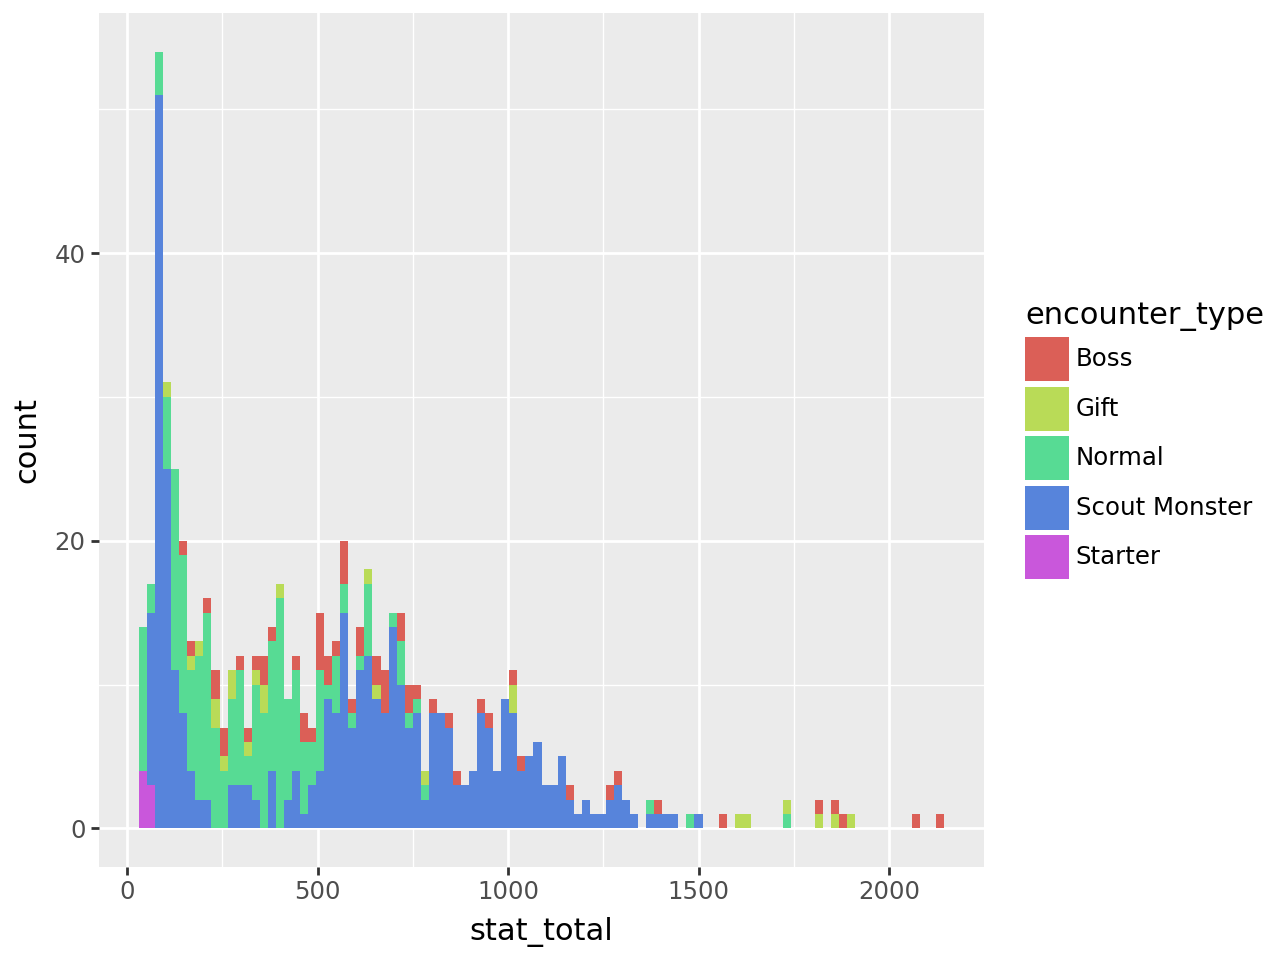

In [6]:
plt9.ggplot(encounters, plt9.aes("stat_total", fill="encounter_type")) +\
    plt9.geom_histogram(bins=100)

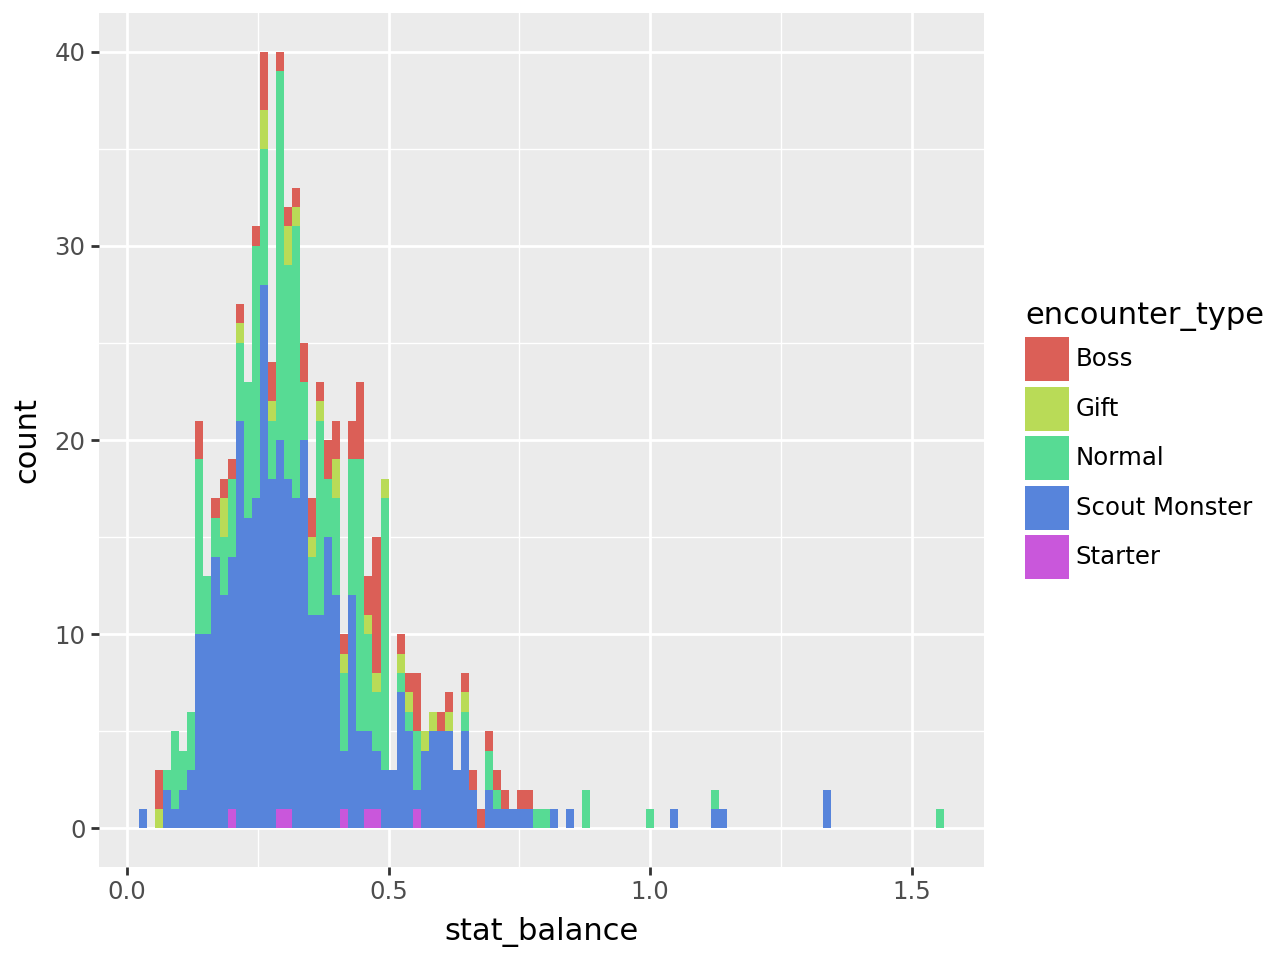

In [7]:
plt9.ggplot(encounters, plt9.aes("stat_balance", fill="encounter_type")) +\
    plt9.geom_histogram(bins=100)

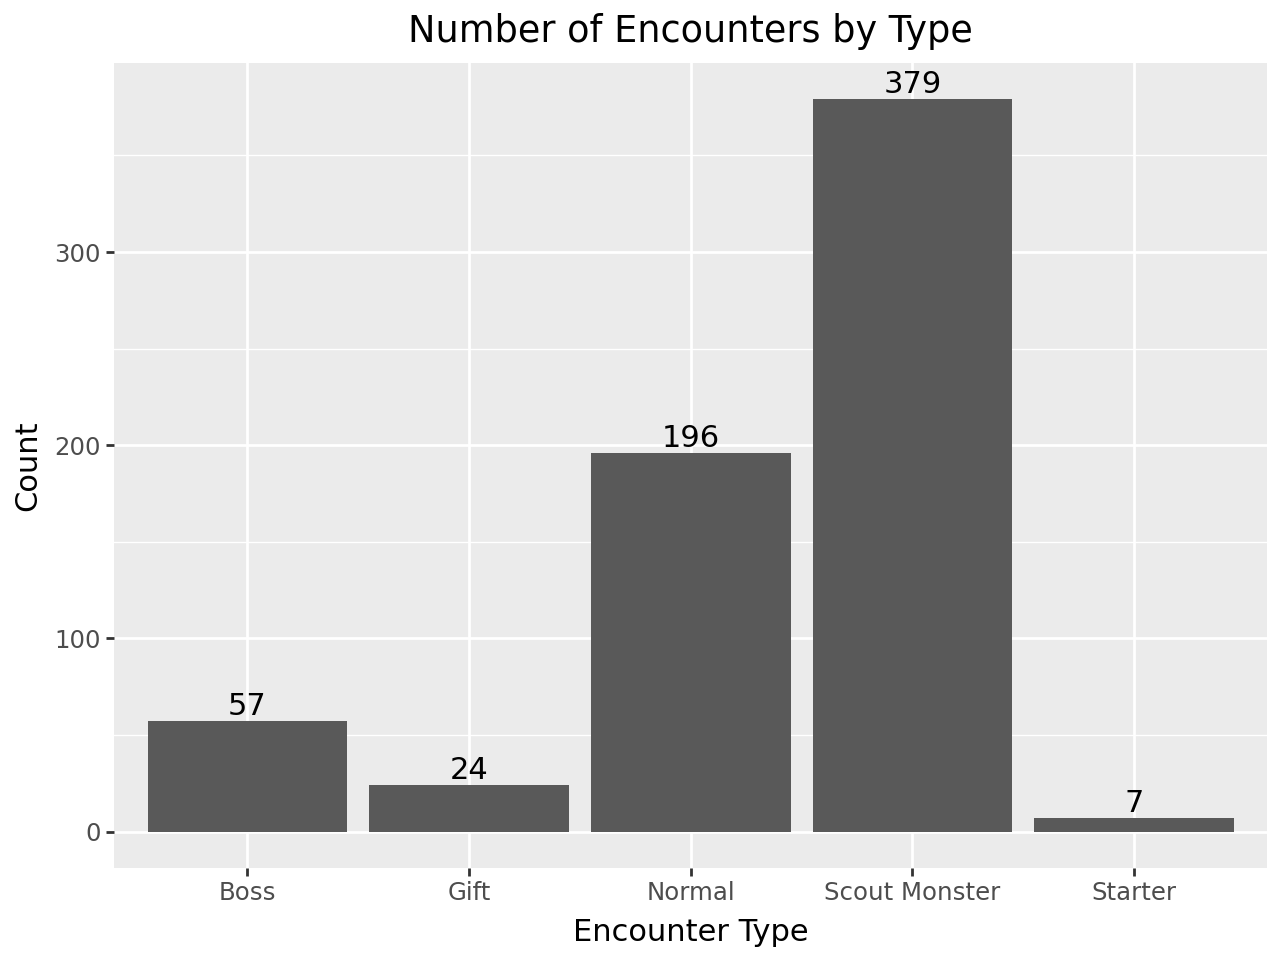

In [8]:
plt9.ggplot(encounters, plt9.aes("encounter_type")) +\
    plt9.geom_bar() +\
    plt9.geom_text(plt9.aes(label=plt9.after_stat("count")), stat="count", nudge_y=0.125, va="bottom") +\
    plt9.ggtitle("Number of Encounters by Type") +\
    plt9.xlab("Encounter Type") +\
    plt9.ylab("Count")

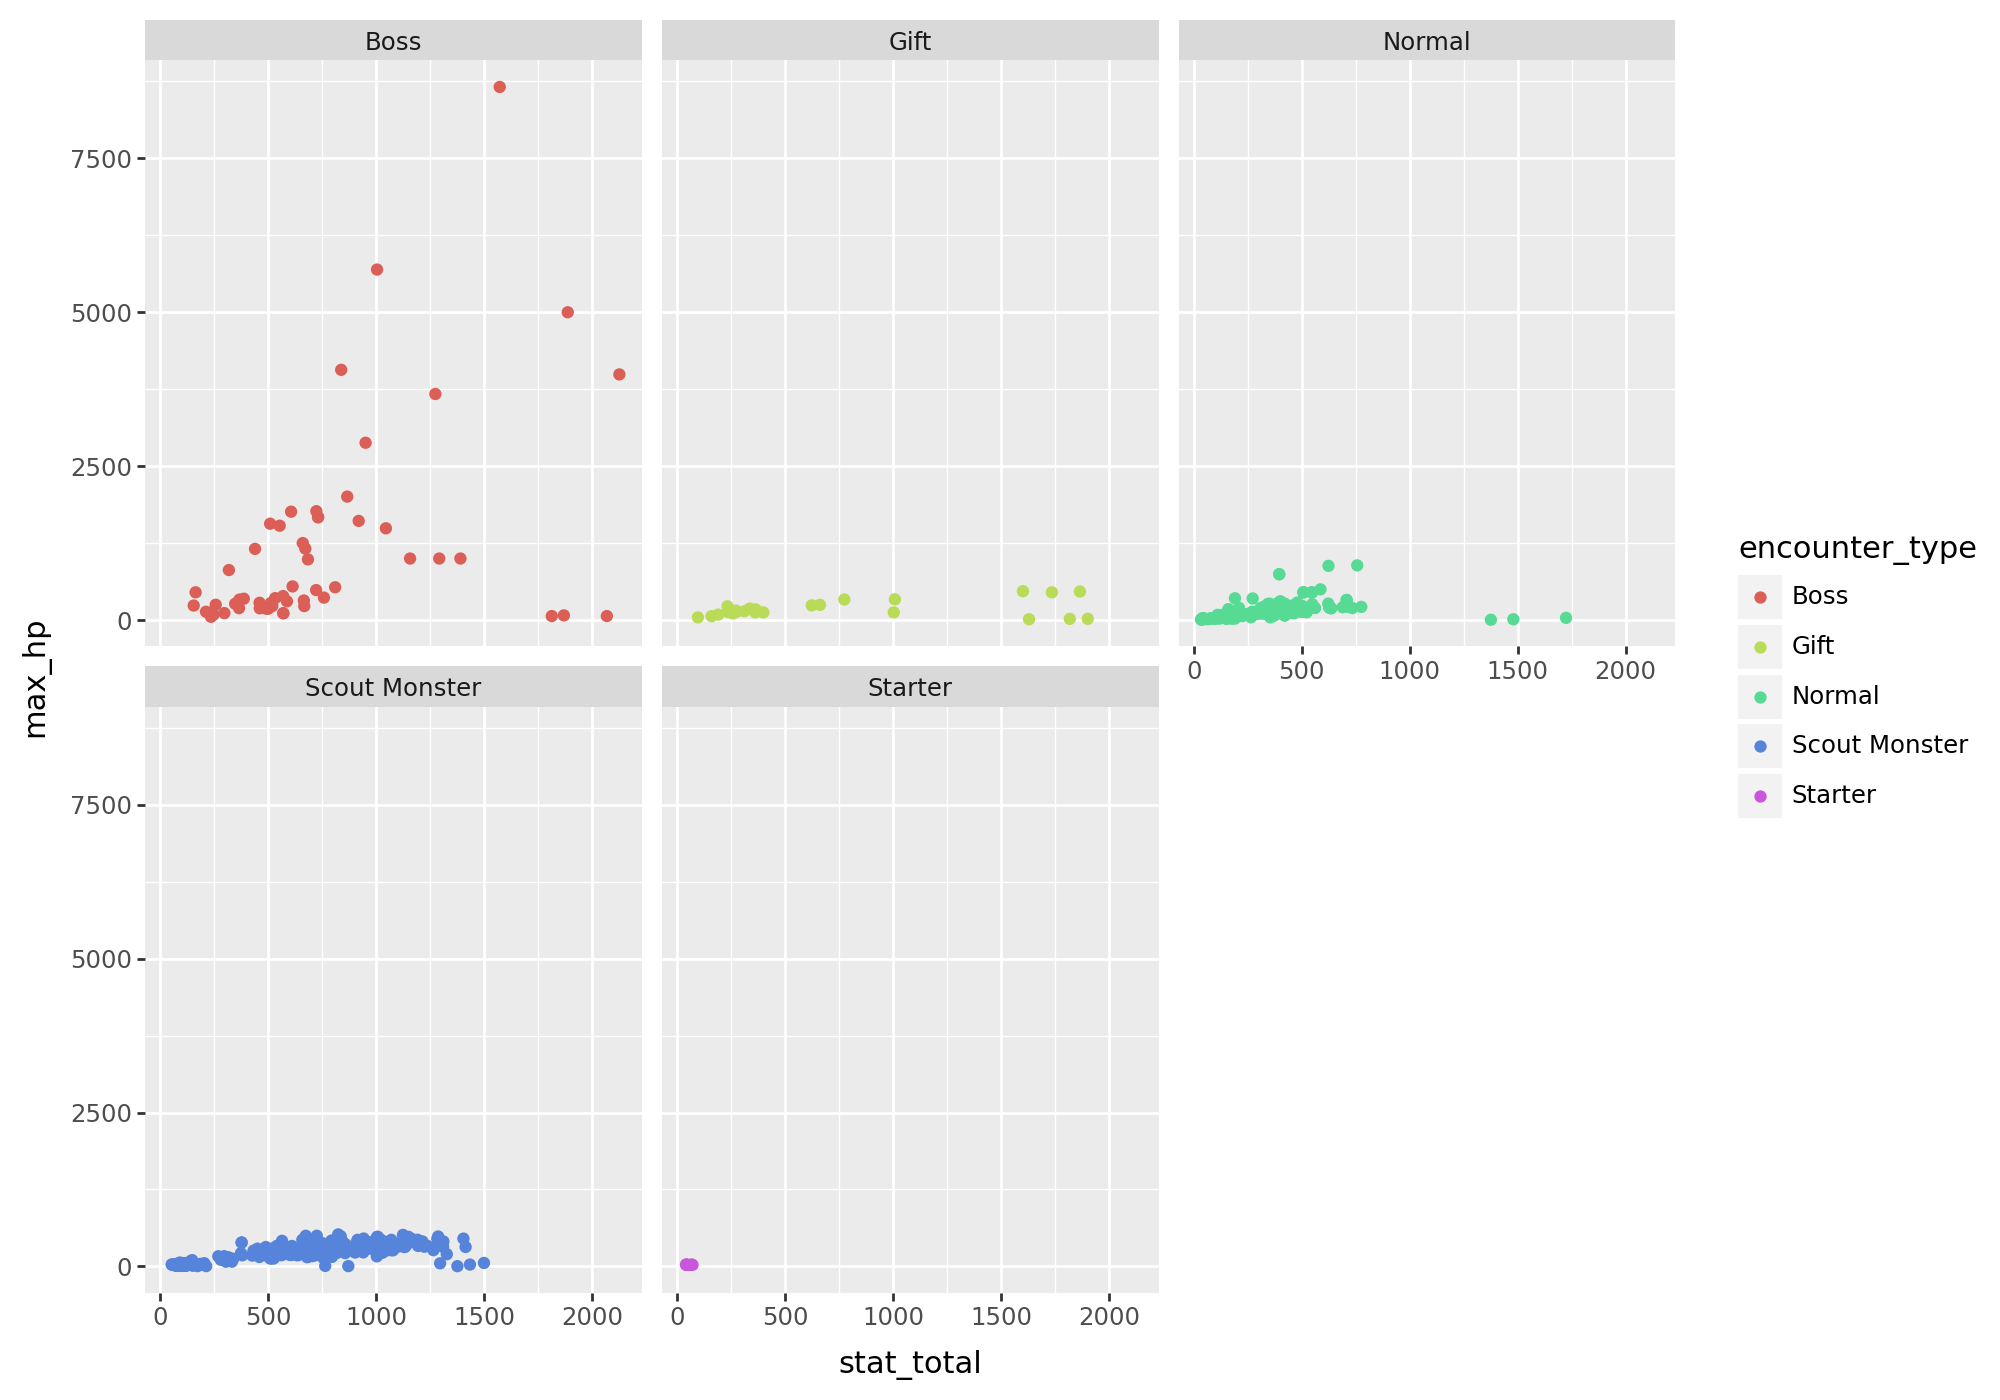

In [9]:
plt9.ggplot(encounters, plt9.aes("stat_total", "max_hp", color="encounter_type")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(10, 7))

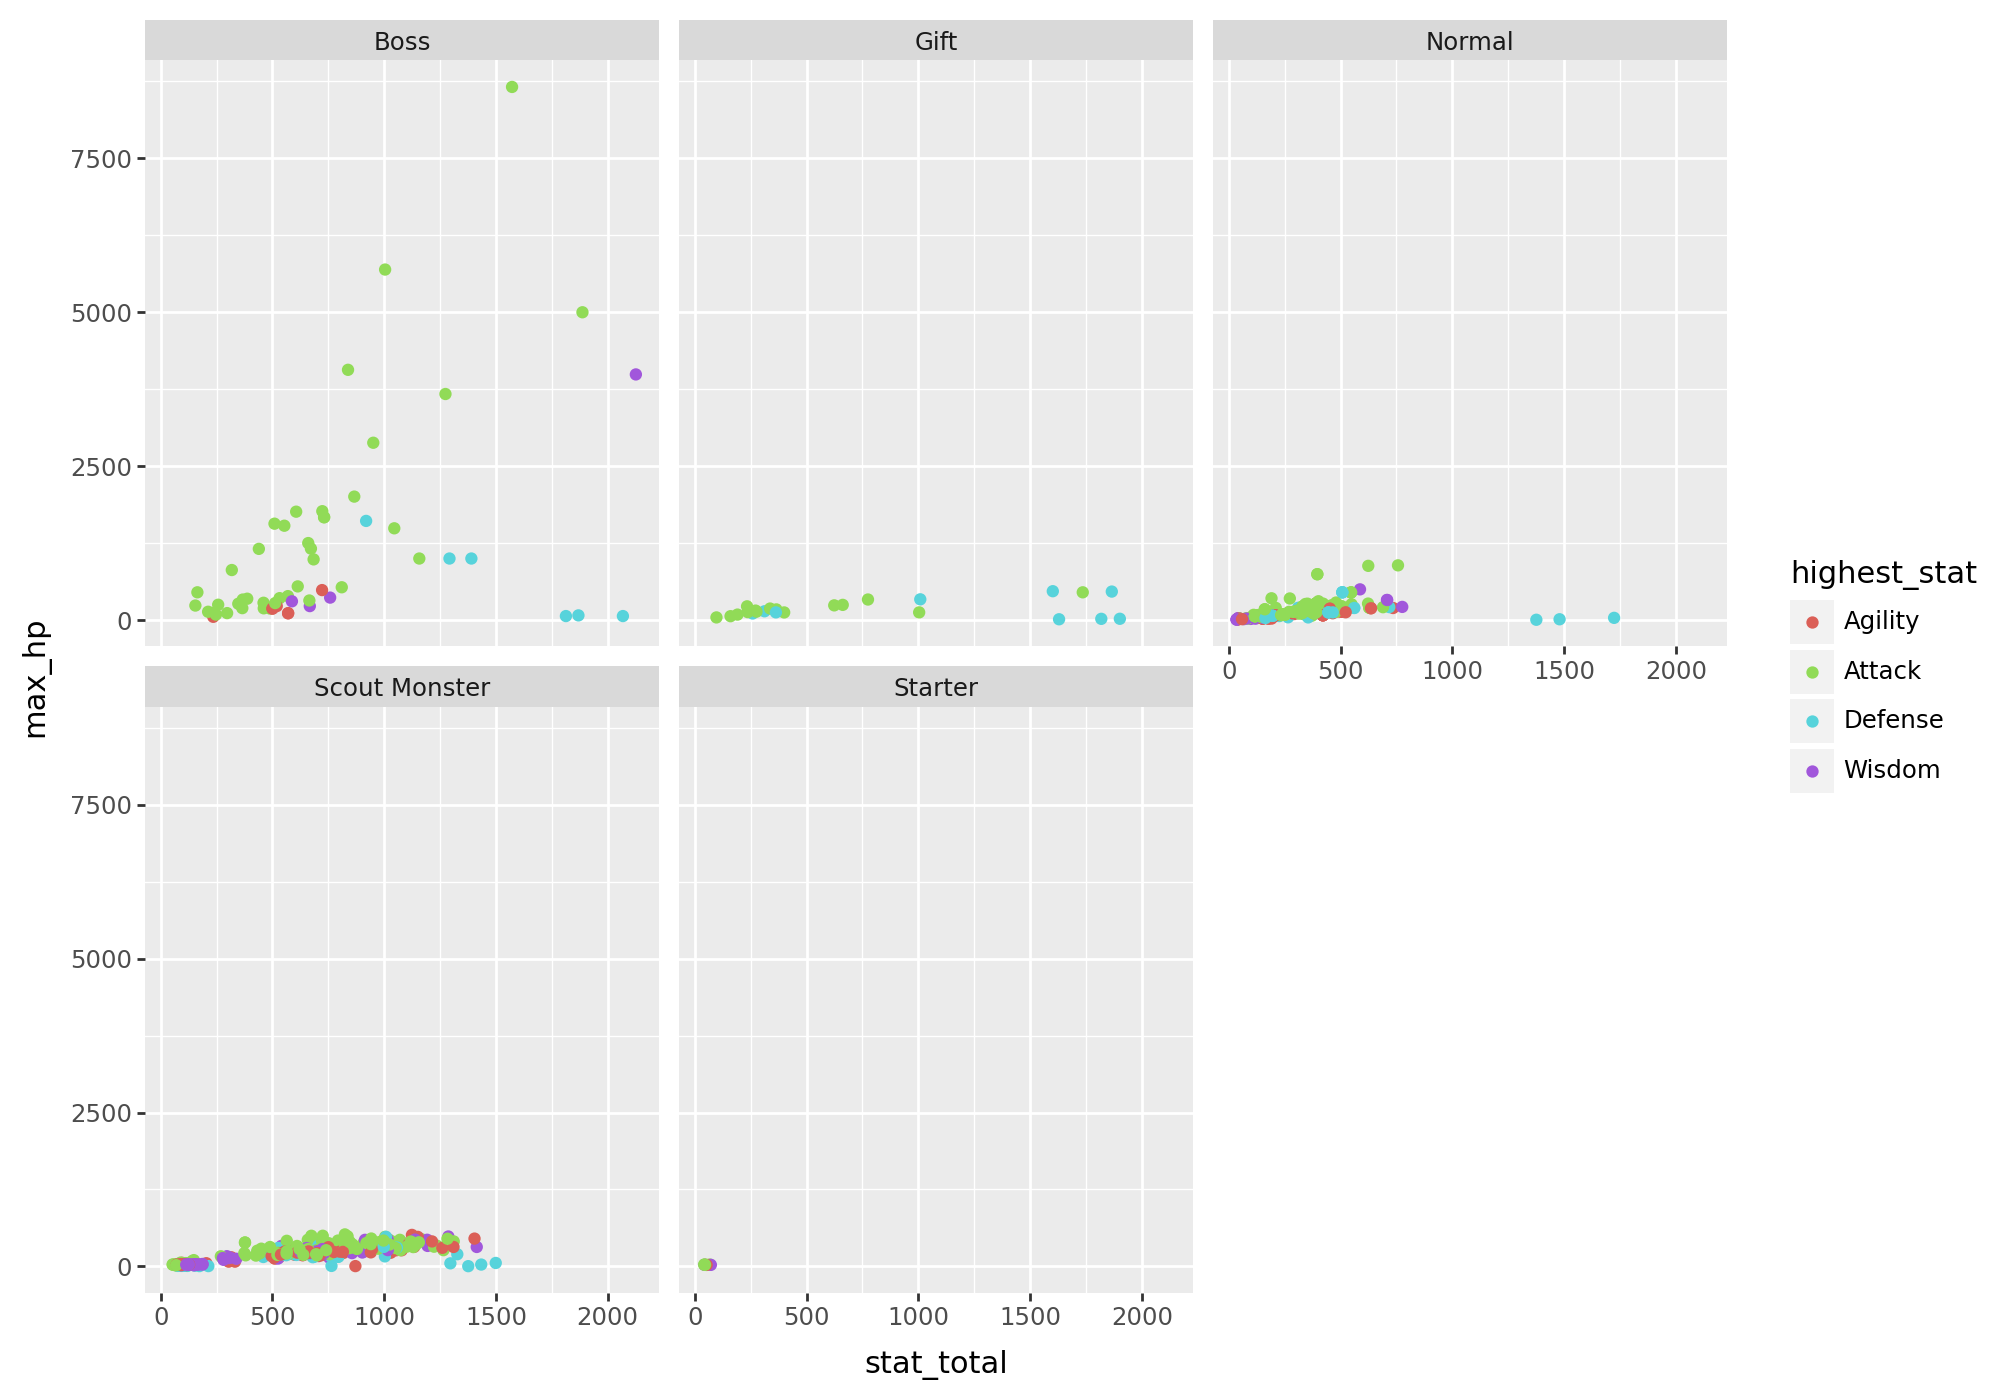

In [10]:
plt9.ggplot(encounters, plt9.aes("stat_total", "max_hp", color="highest_stat")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(10, 7))

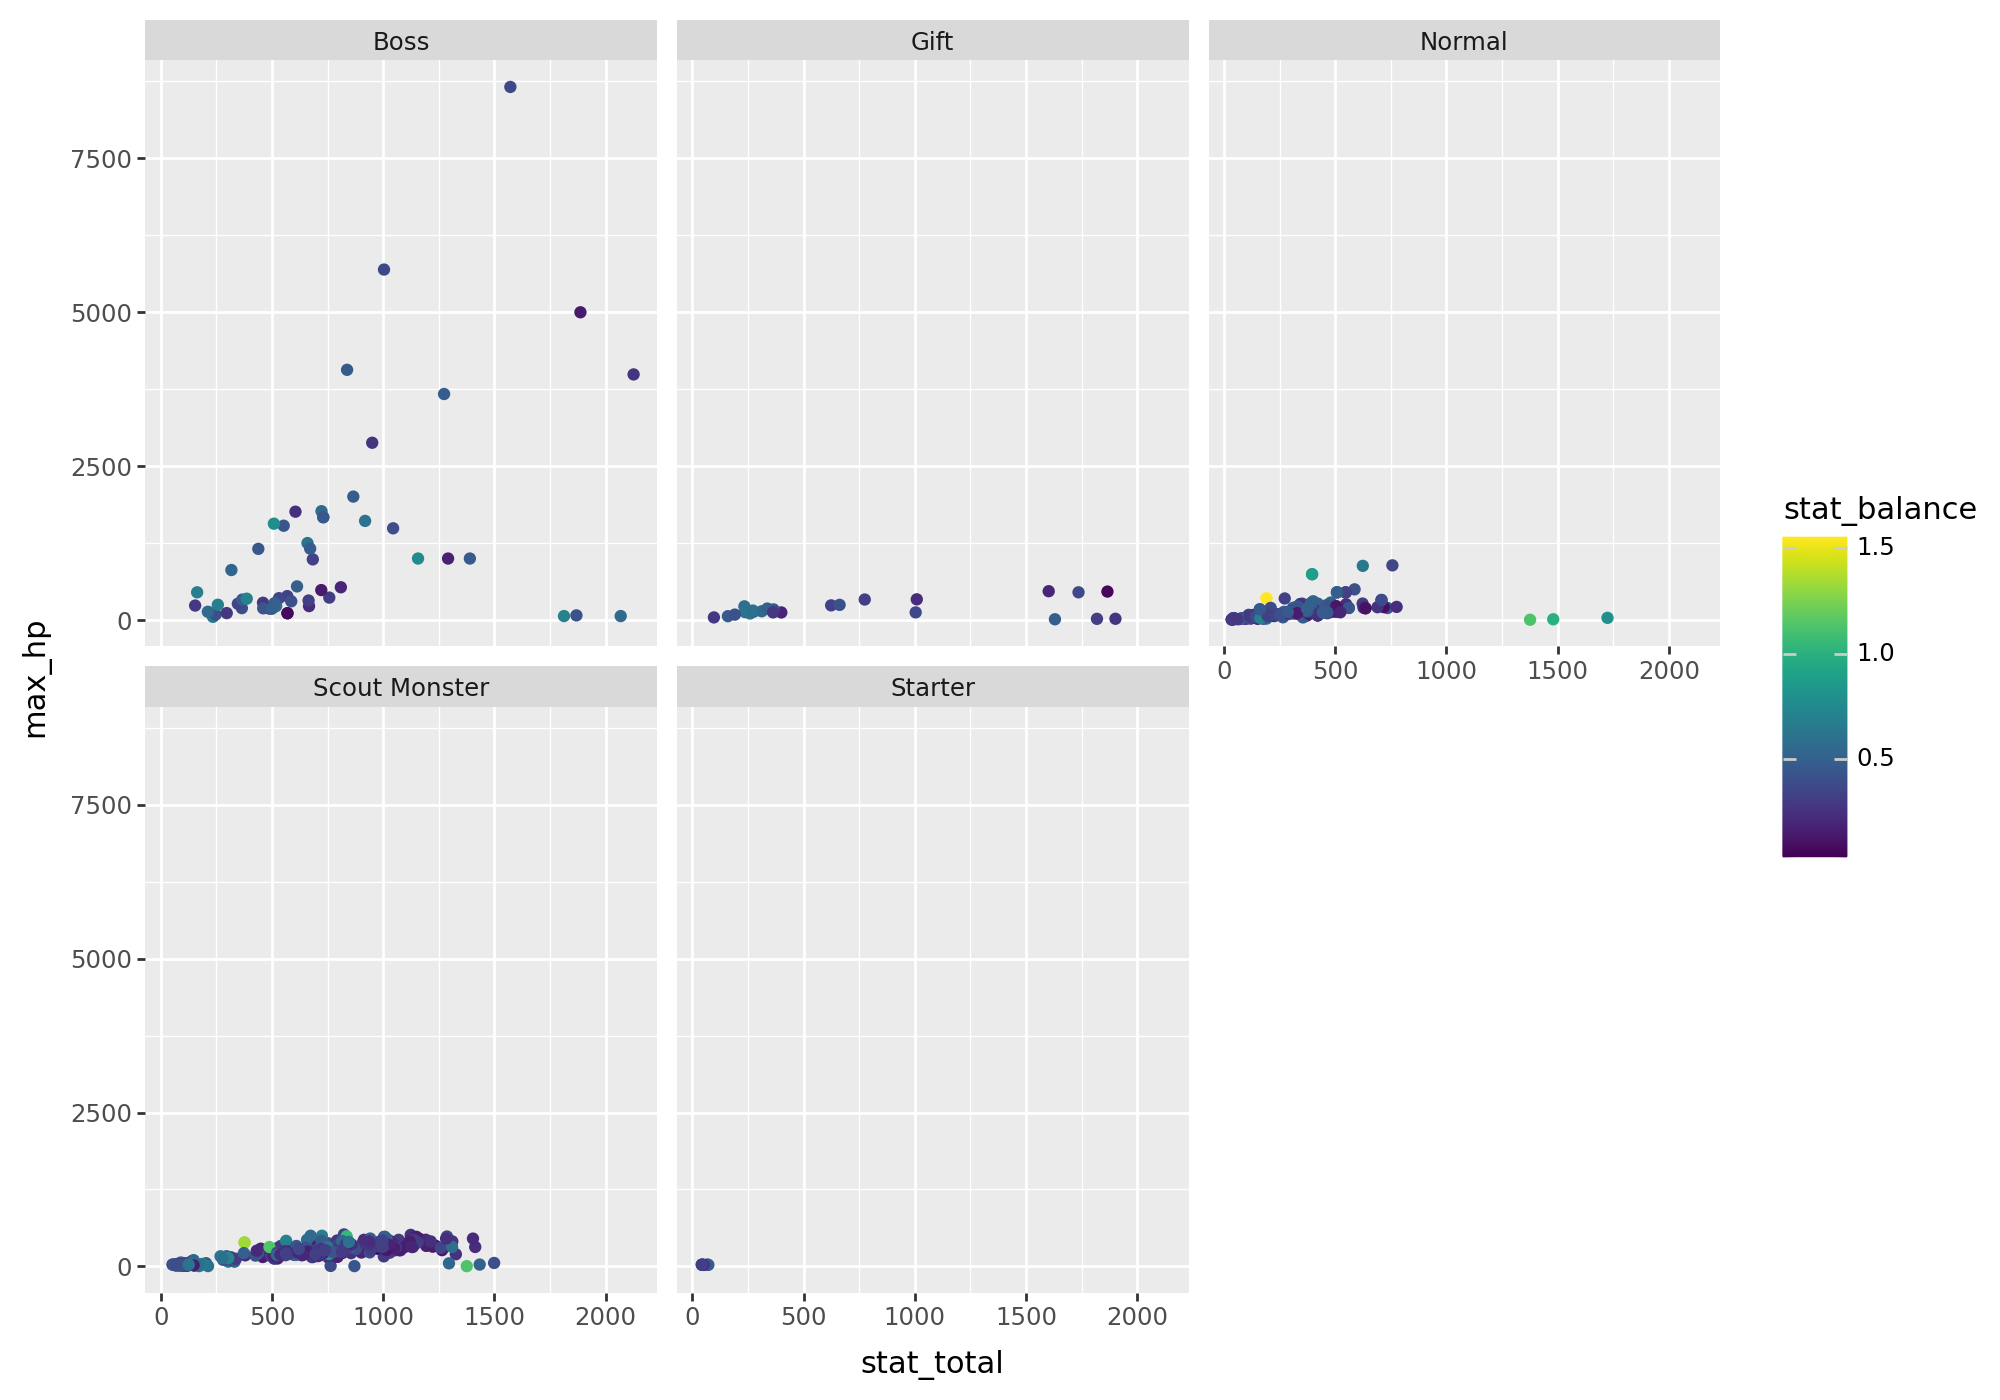

In [11]:
plt9.ggplot(encounters, plt9.aes("stat_total", "max_hp", color="stat_balance")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(10, 7))

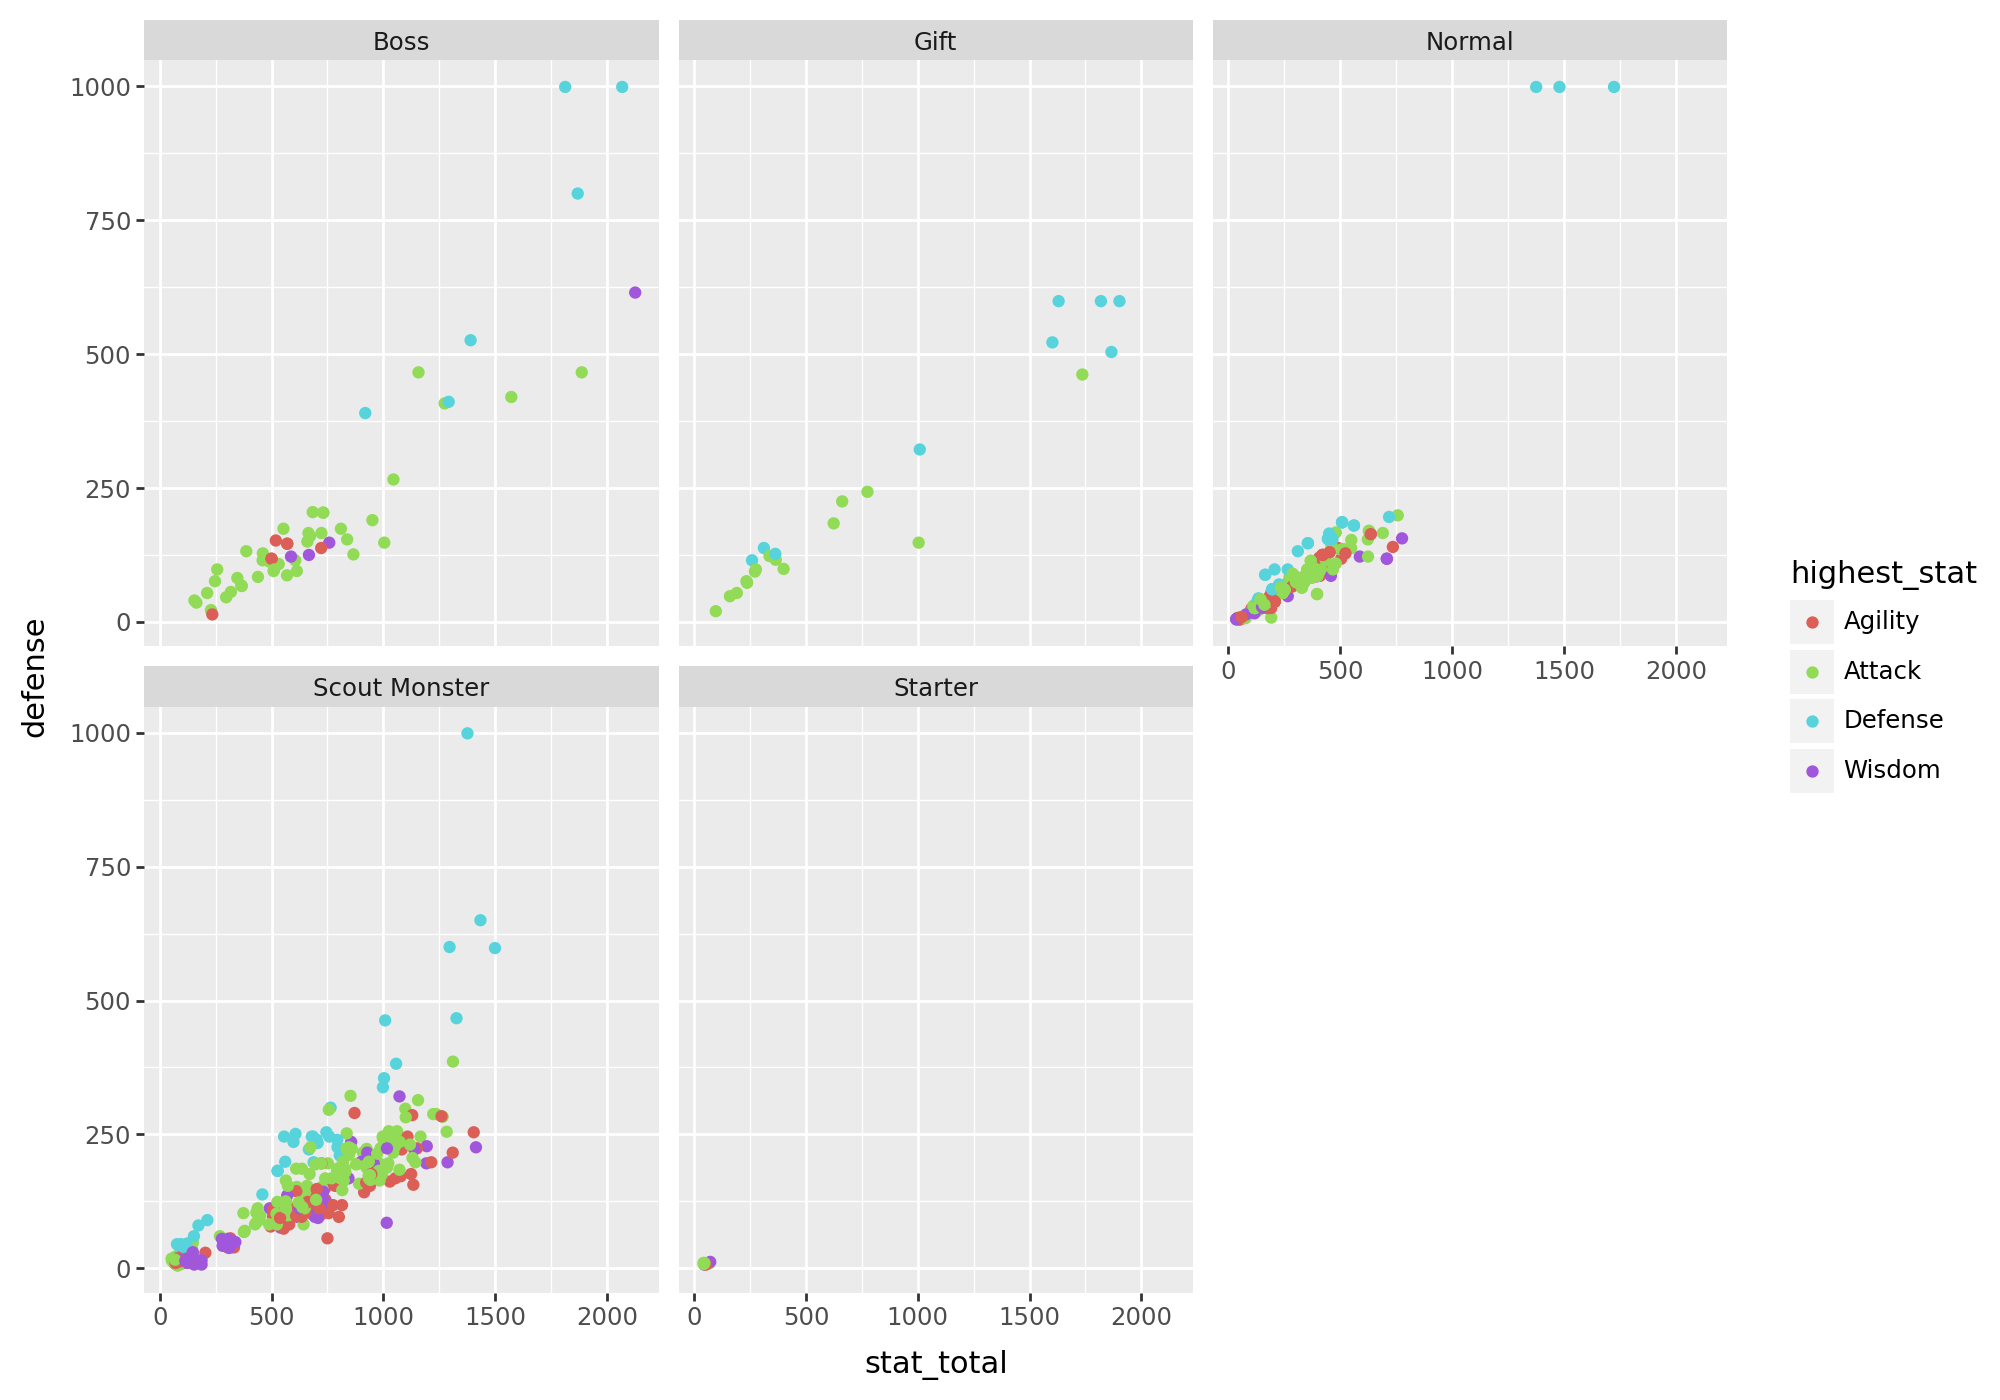

In [12]:
plt9.ggplot(encounters, plt9.aes("stat_total", "defense", color="highest_stat")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(10, 7))

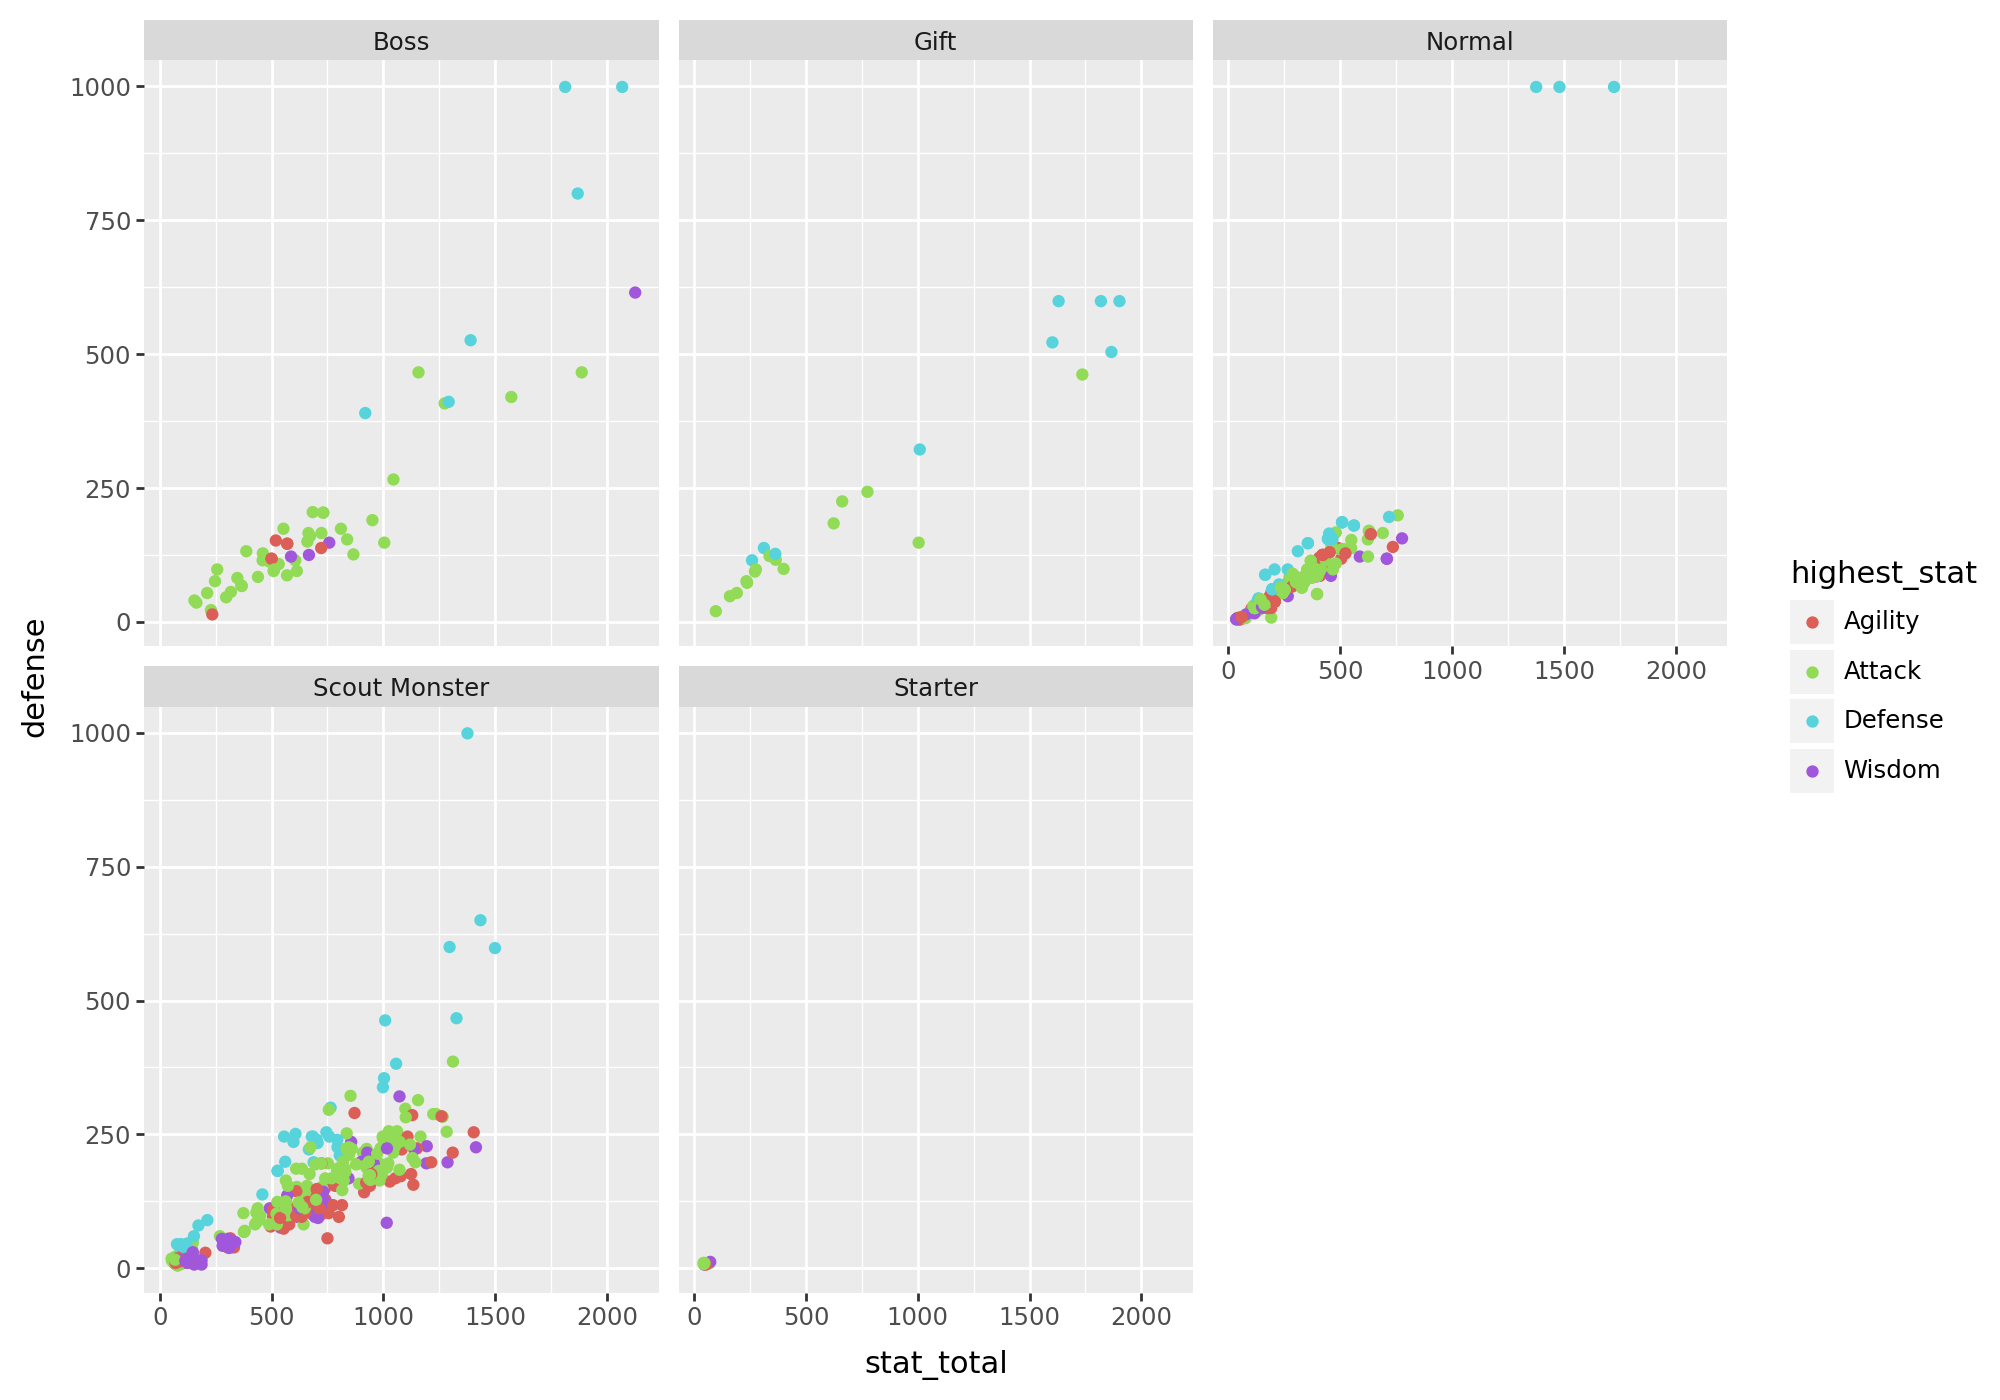

In [13]:
plt9.ggplot(encounters, plt9.aes("stat_total", "defense", color="highest_stat")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(10, 7))

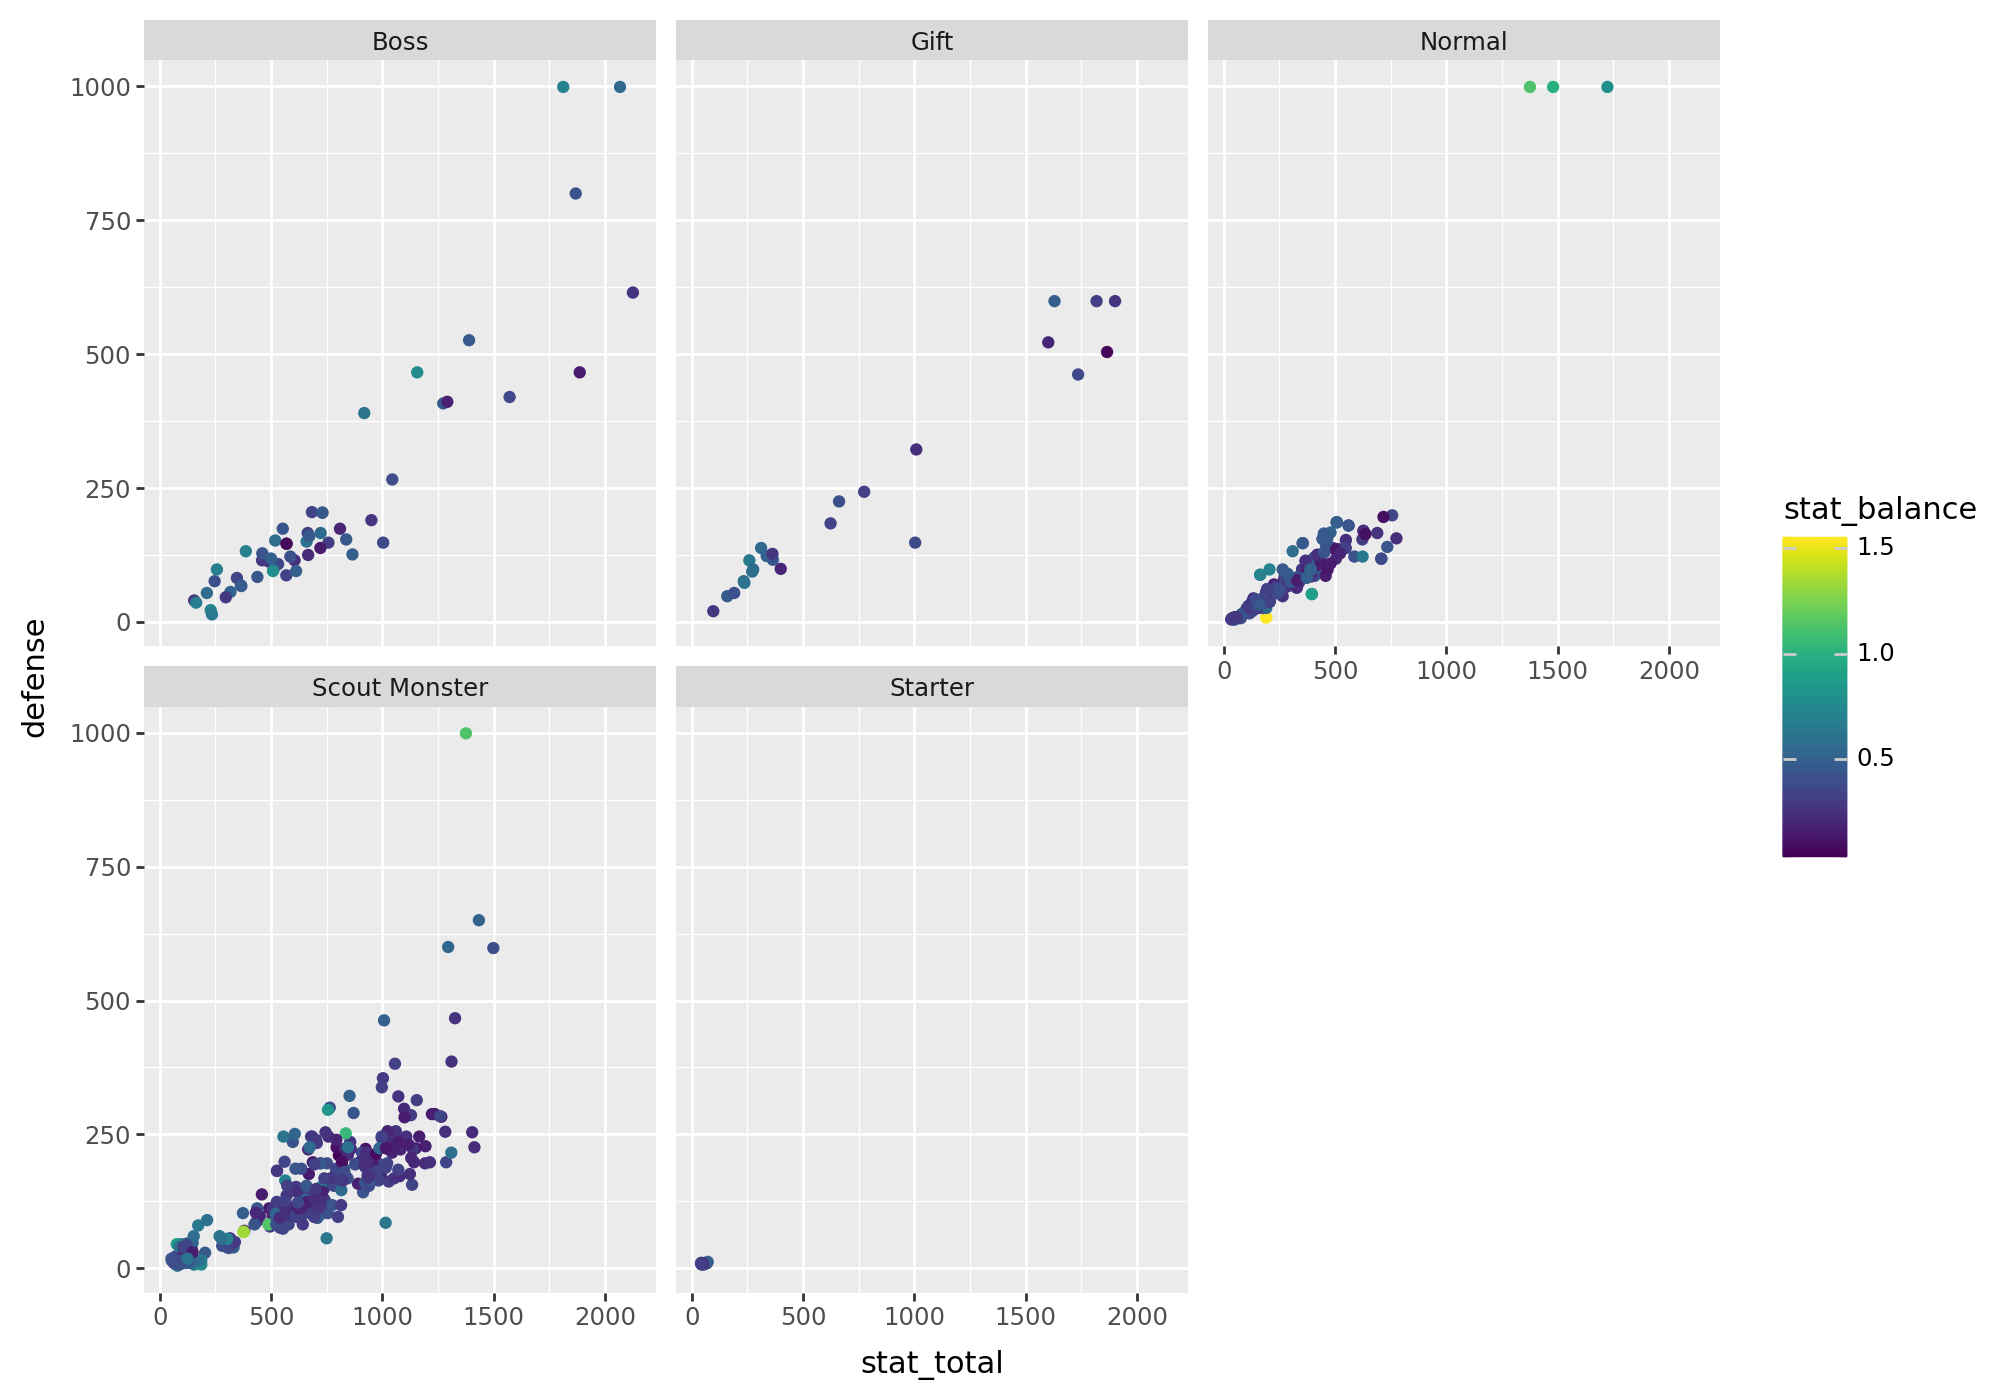

In [14]:
plt9.ggplot(encounters, plt9.aes("stat_total", "defense", color="stat_balance")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(10, 7))

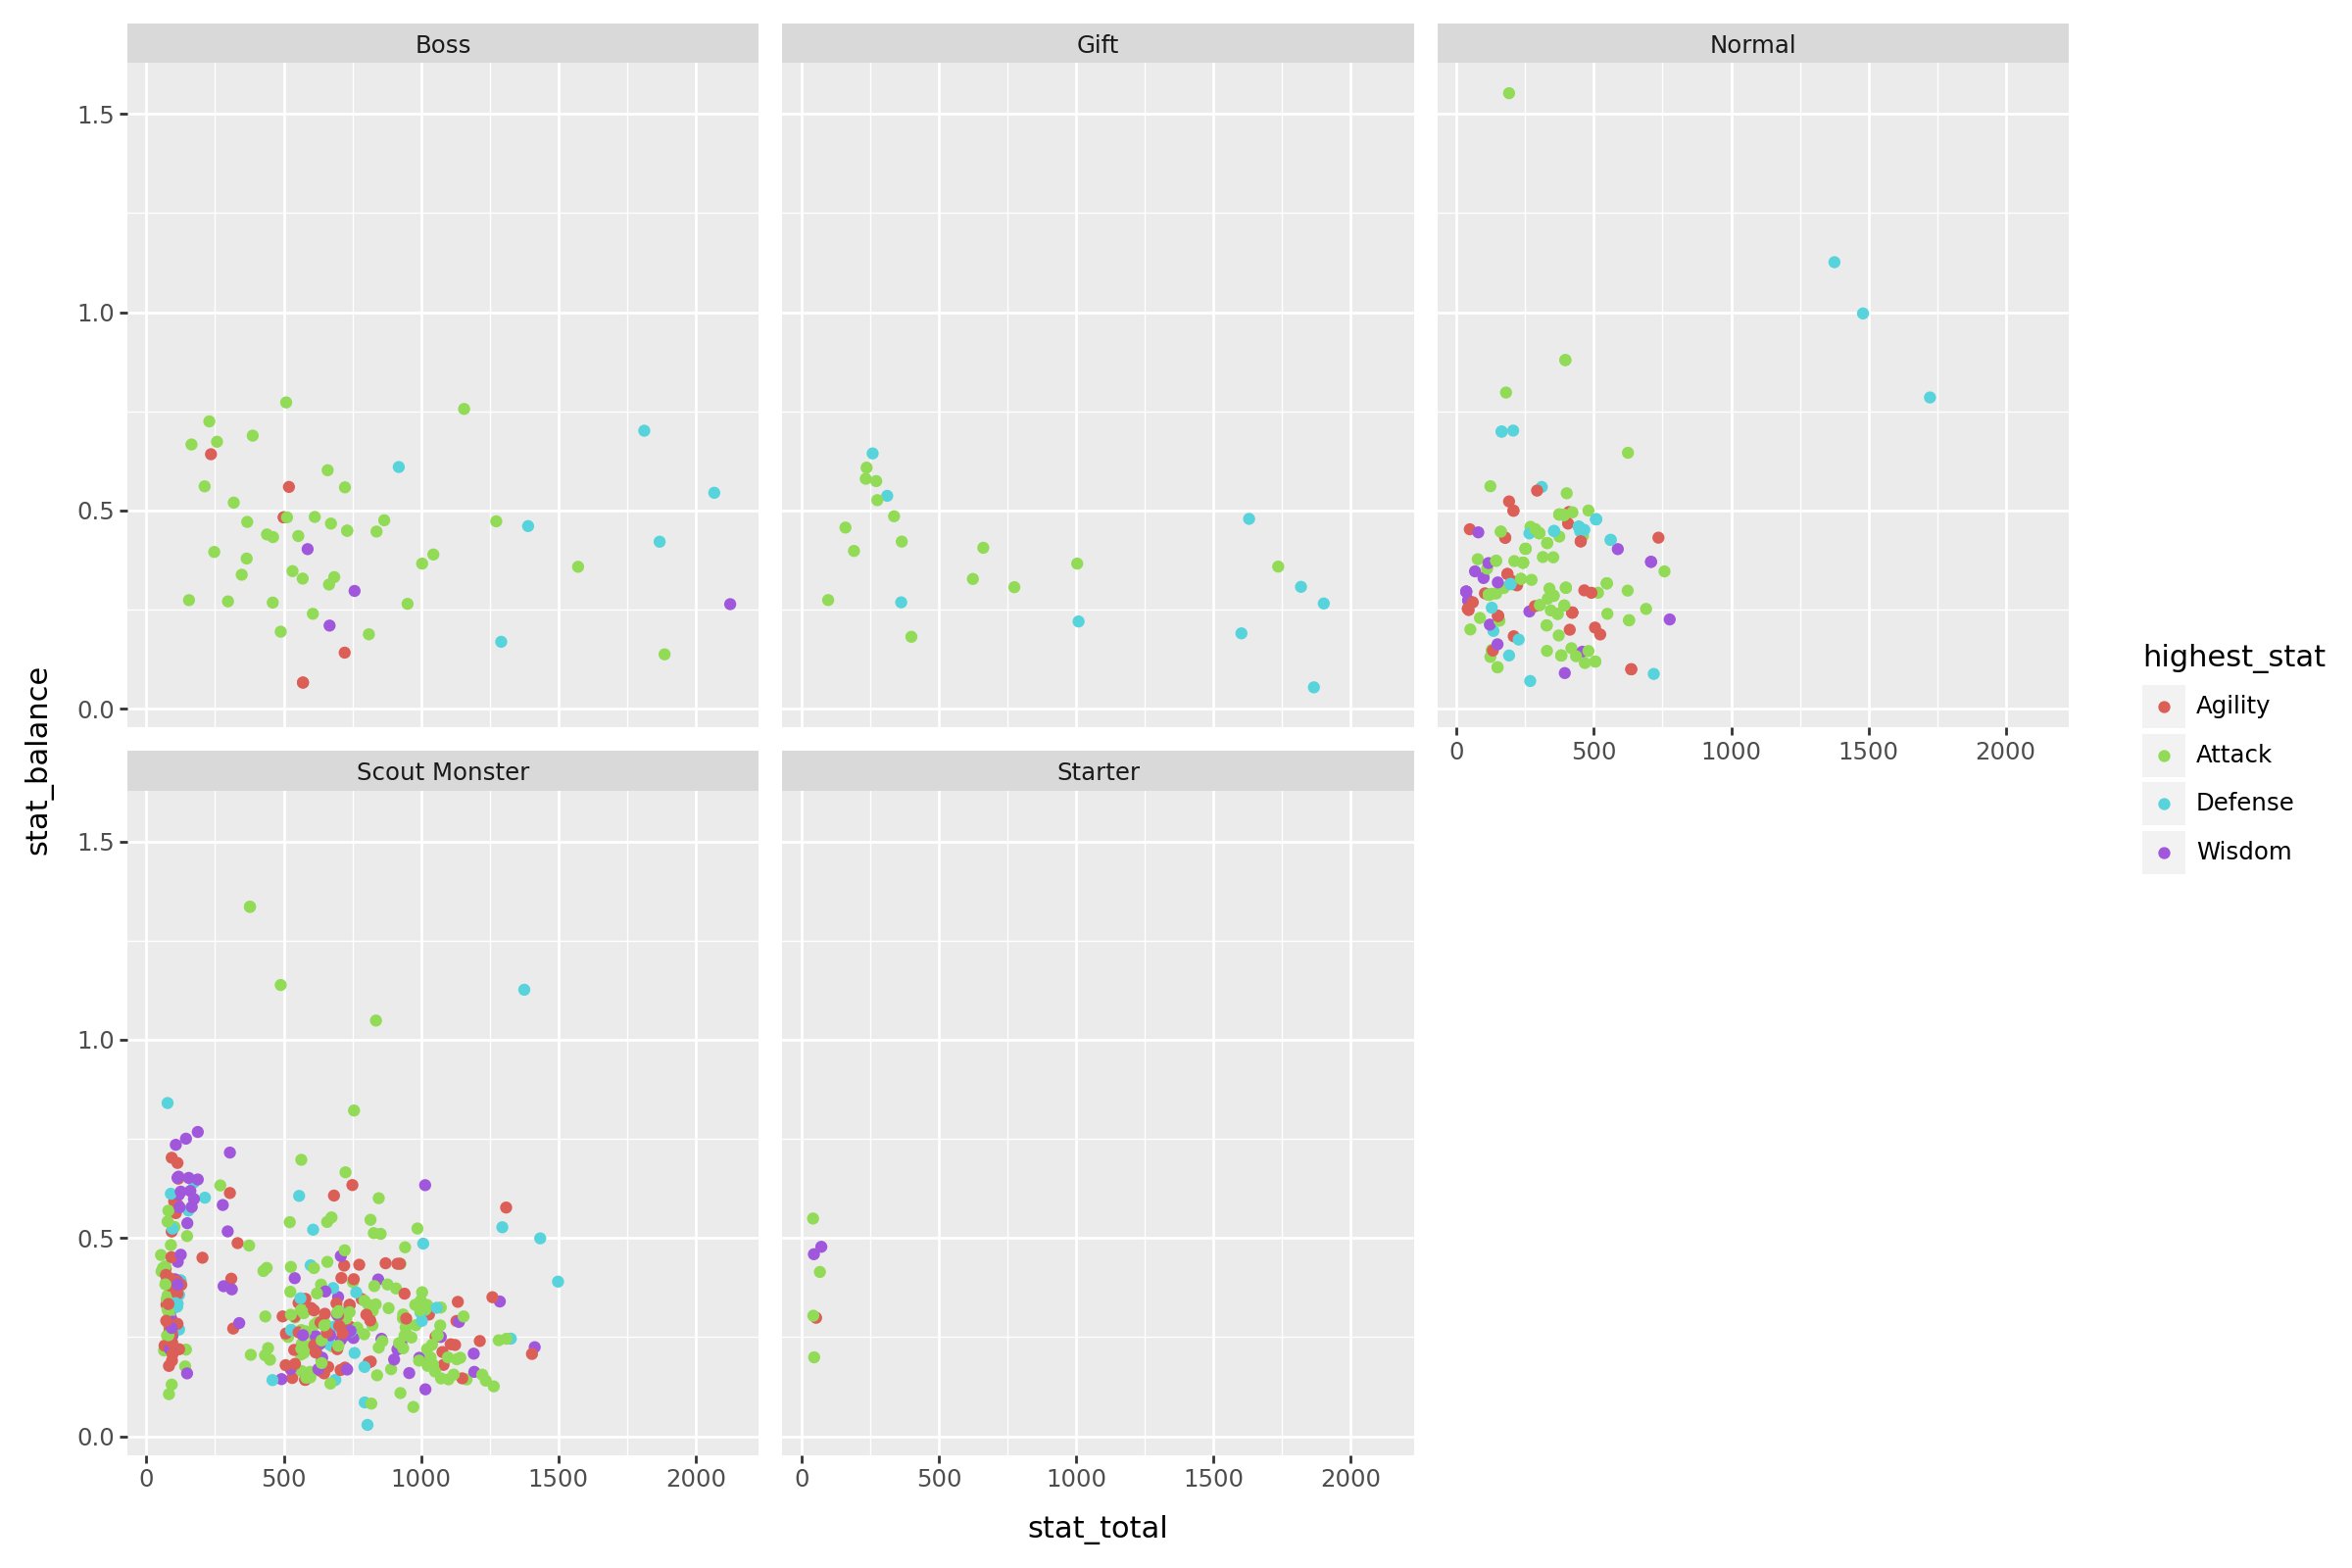

In [15]:
plt9.ggplot(encounters, plt9.aes("stat_total", "stat_balance", color="highest_stat")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(12, 8))

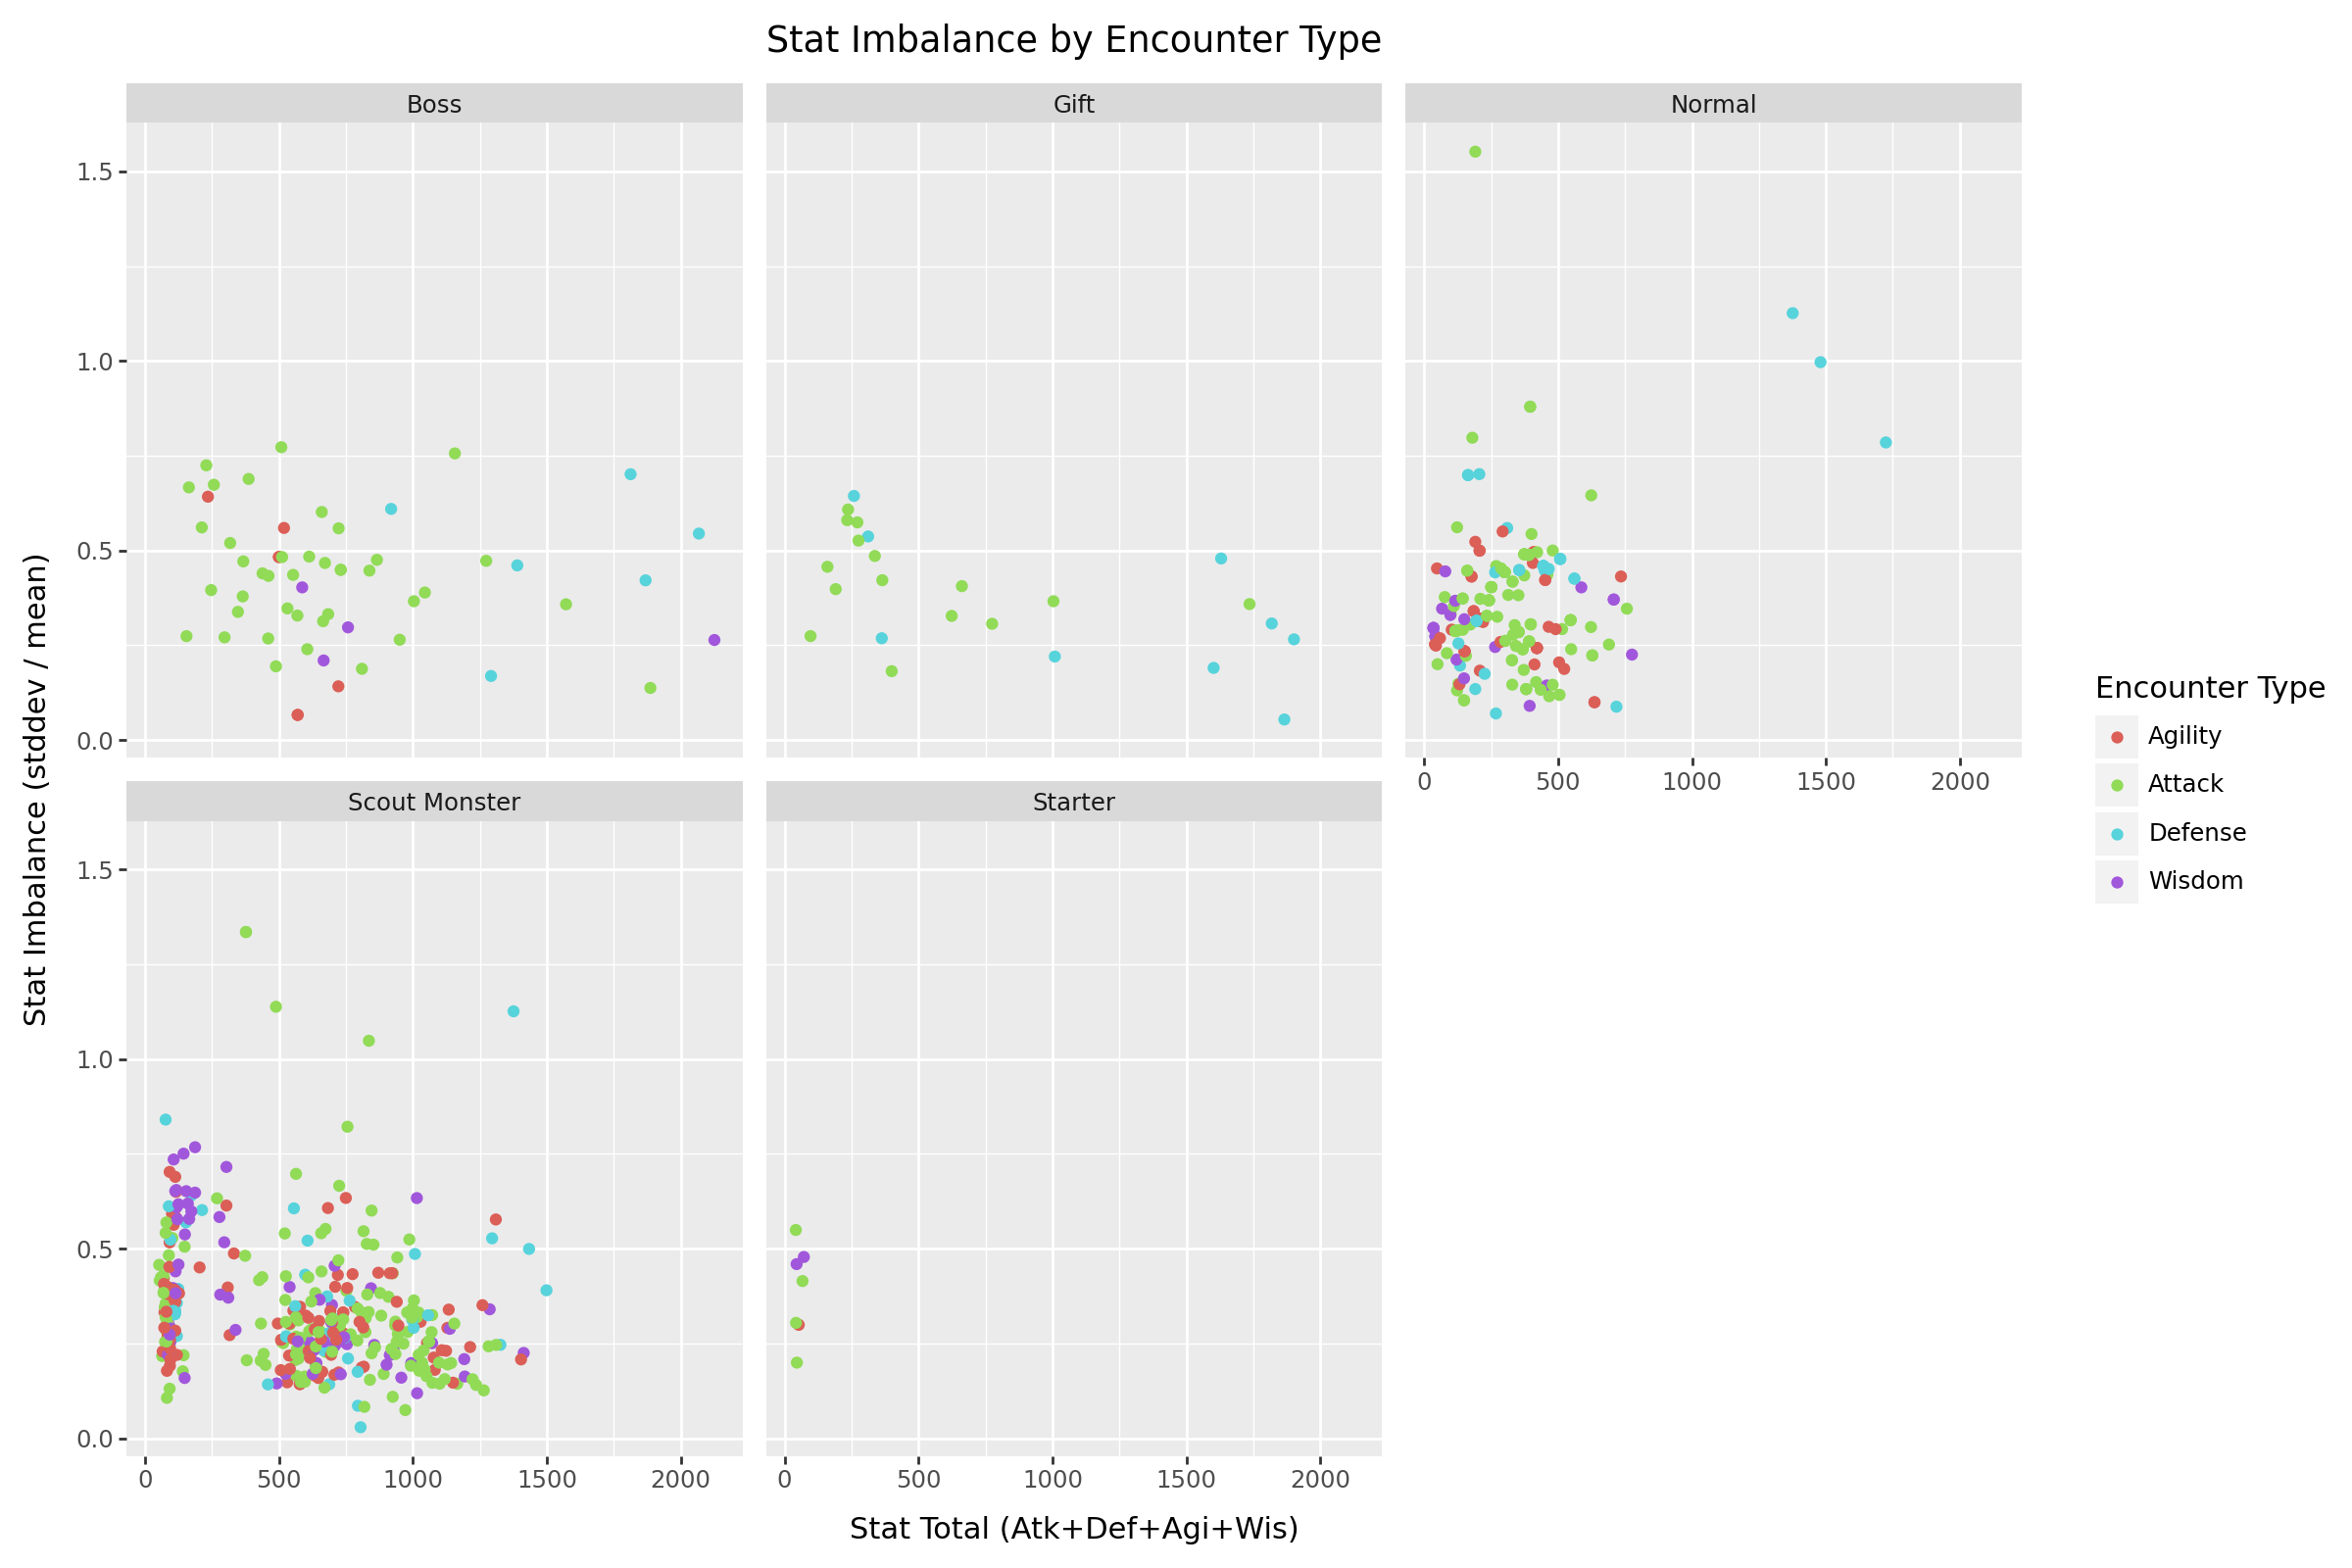

In [16]:
plt9.ggplot(encounters, plt9.aes("stat_total", "stat_balance", color="highest_stat")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.ggtitle("Stat Imbalance by Encounter Type") +\
    plt9.xlab("Stat Total (Atk+Def+Agi+Wis)") +\
    plt9.ylab("Stat Imbalance (stddev / mean)") +\
    plt9.labs(color="Encounter Type") +\
    plt9.theme(figure_size=(12, 8))

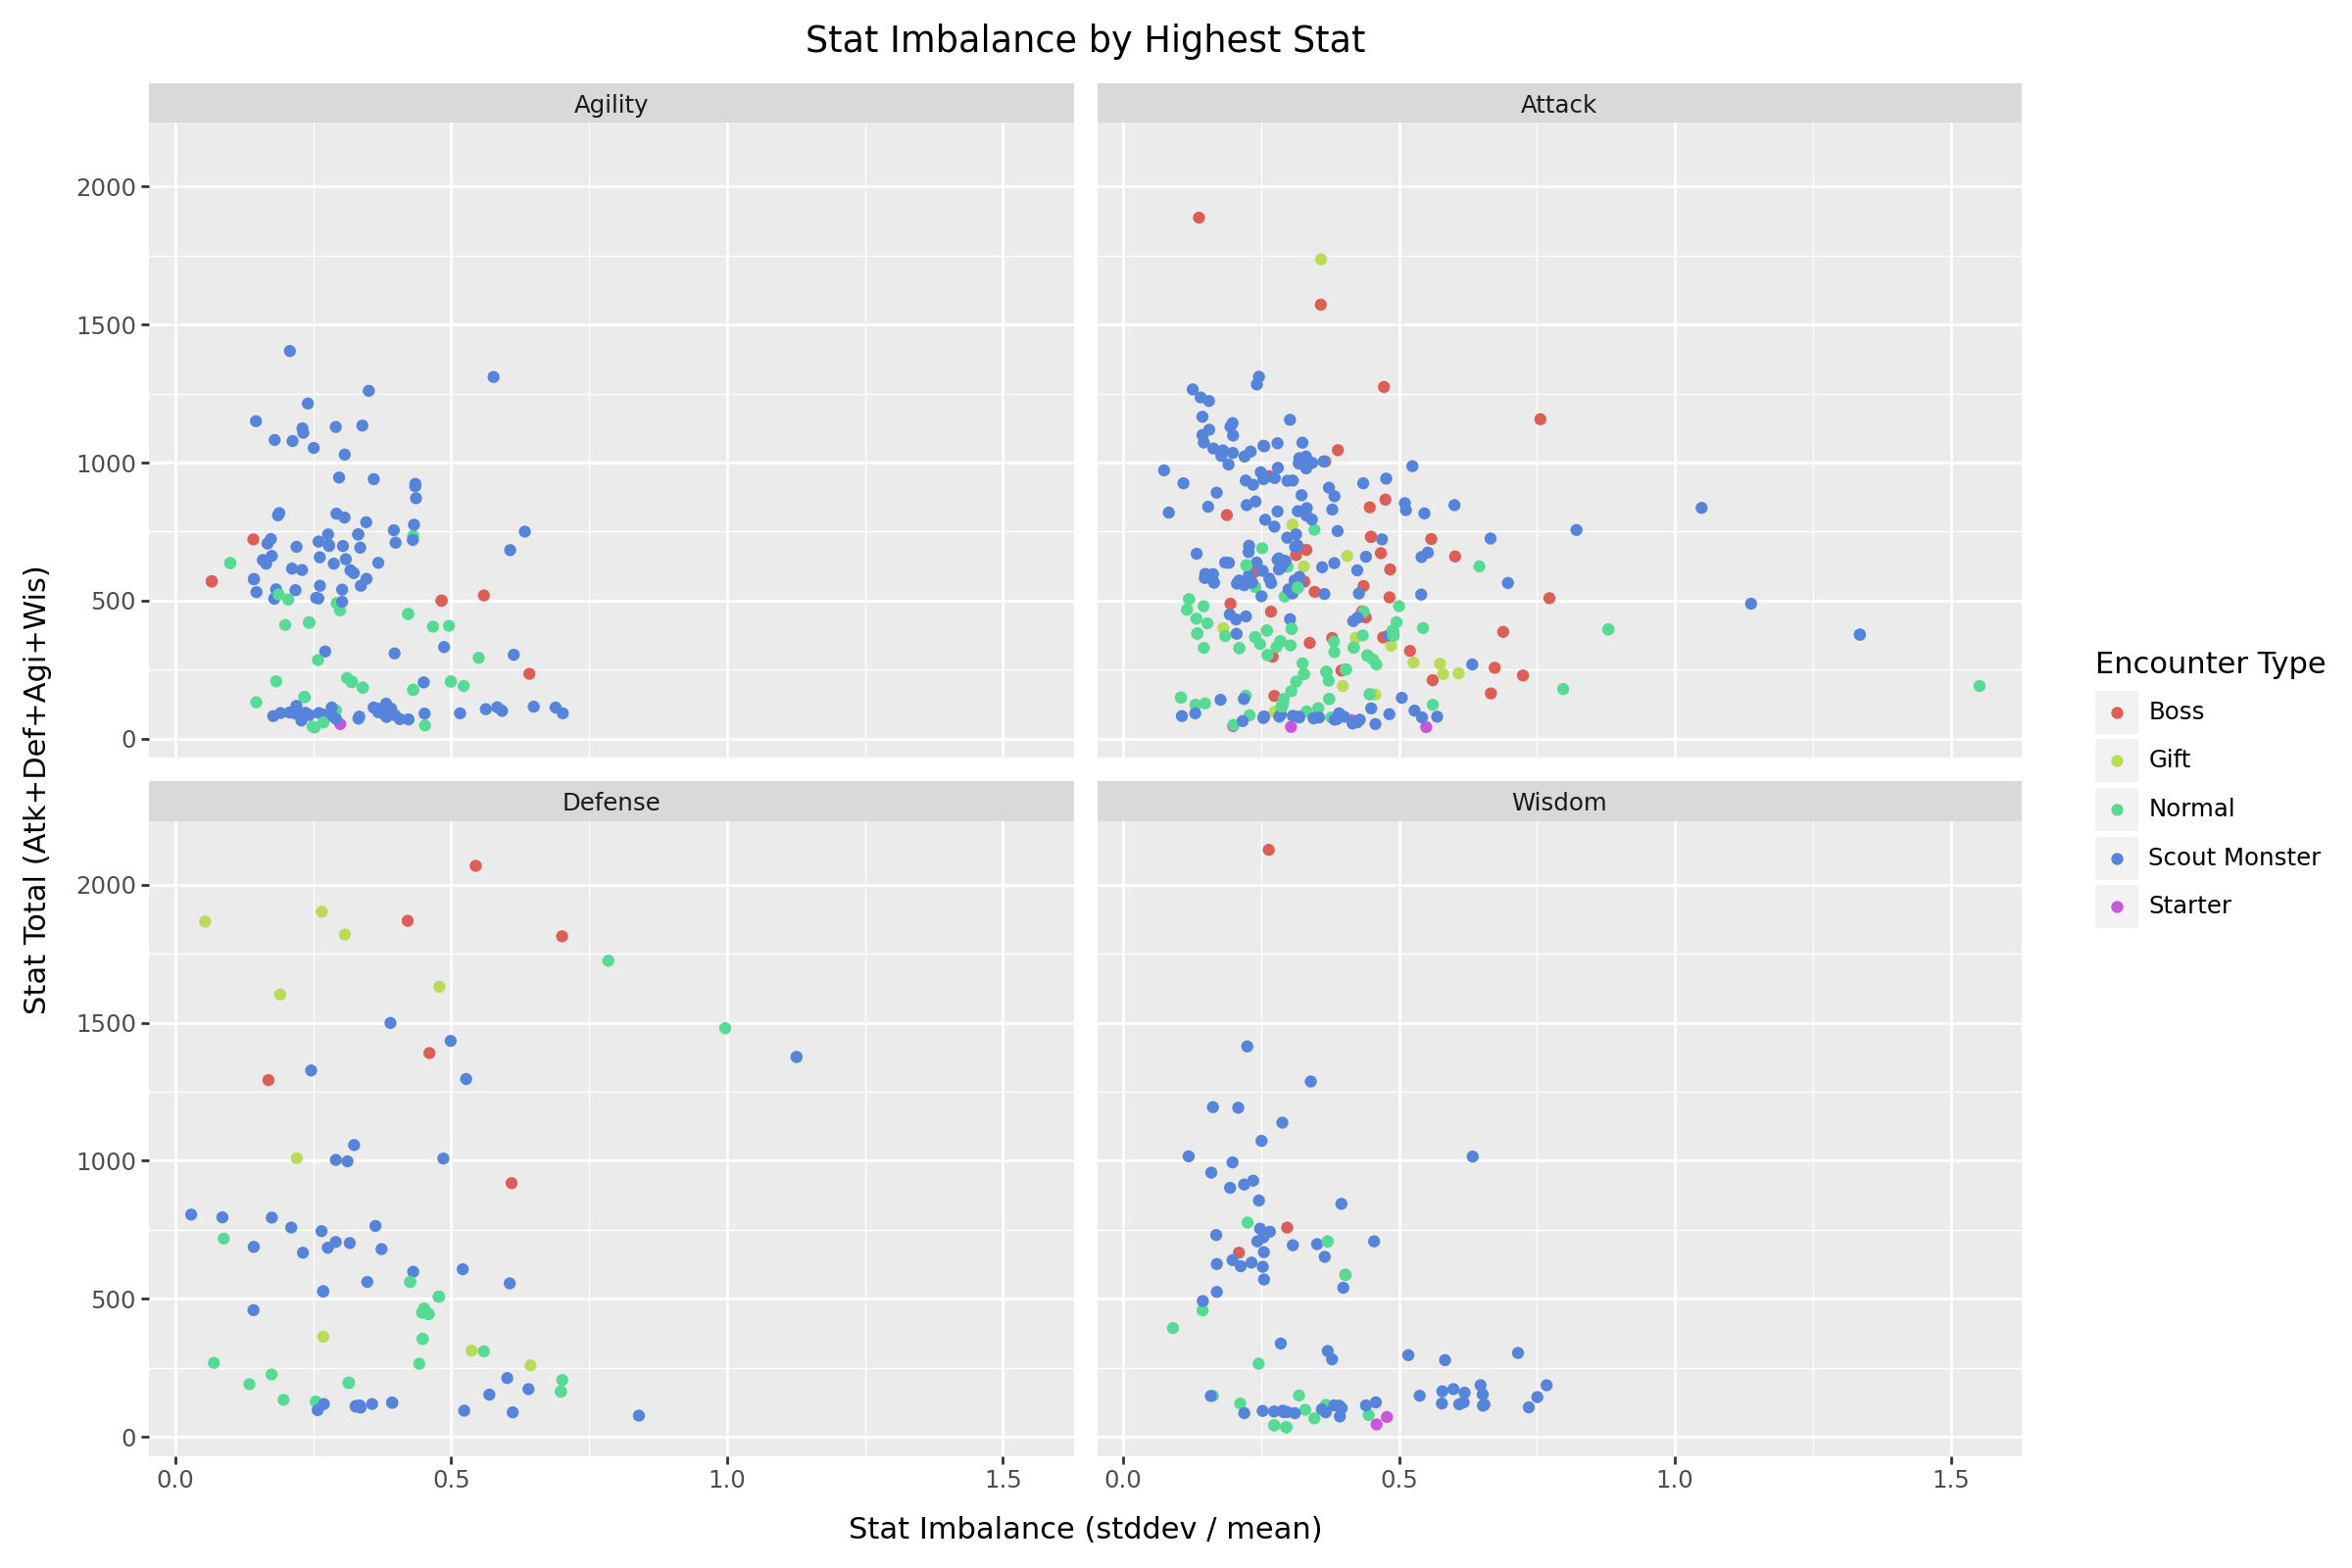

In [17]:
plt9.ggplot(encounters, plt9.aes("stat_balance", "stat_total", color="encounter_type")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("highest_stat") +\
    plt9.ggtitle("Stat Imbalance by Highest Stat") +\
    plt9.ylab("Stat Total (Atk+Def+Agi+Wis)") +\
    plt9.xlab("Stat Imbalance (stddev / mean)") +\
    plt9.labs(color="Encounter Type") +\
    plt9.theme(figure_size=(12, 8))

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 34'. Pick better value with 'binwidth'.


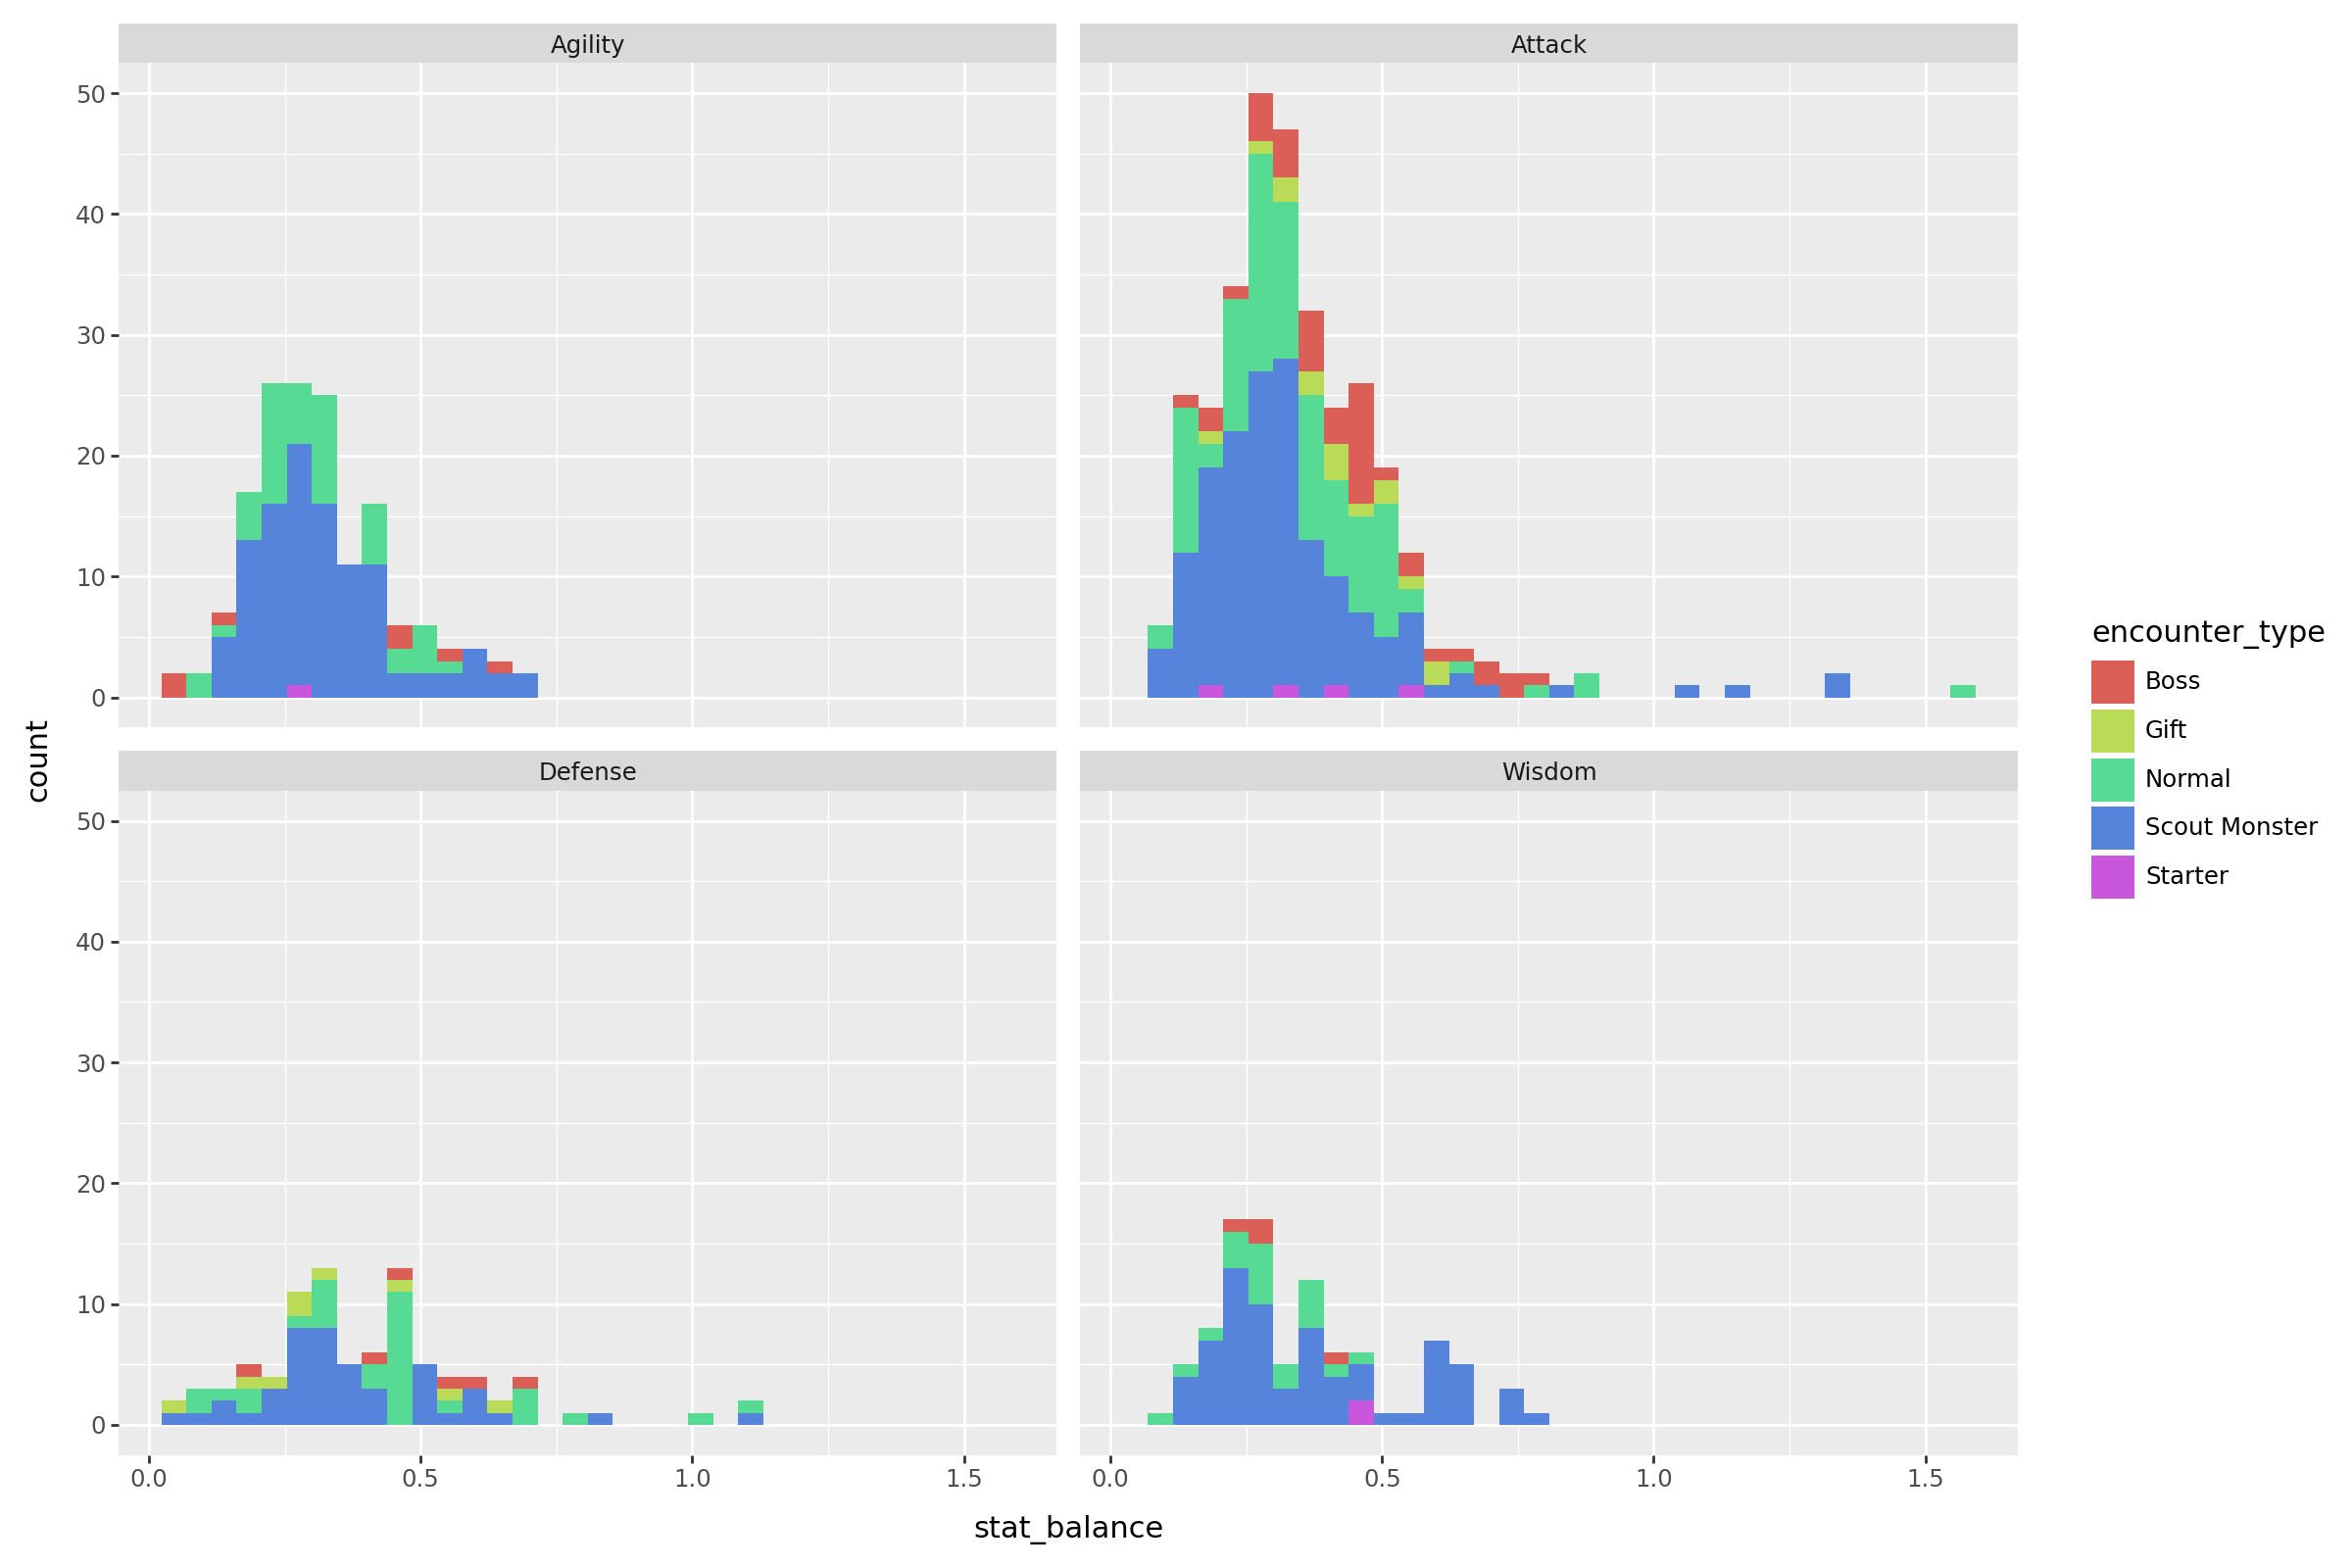

In [18]:
plt9.ggplot(encounters, plt9.aes("stat_balance", fill="encounter_type")) +\
    plt9.geom_histogram() +\
    plt9.facet_wrap("highest_stat") +\
    plt9.theme(figure_size=(12, 8))

In [19]:
encounters.sort_values(by="stat_balance", key=lambda v: -v)[["id", "stat_balance", "highest_stat"]]

,id,stat_balance,highest_stat
163,163,1.552027,Attack
484,484,1.335172,Attack
485,485,1.335172,Attack
483,483,1.137961,Attack
431,431,1.126023,Defense
...,...,...,...
89,89,0.070006,Defense
32,32,0.066110,Agility
35,35,0.066110,Agility
69,69,0.054092,Defense


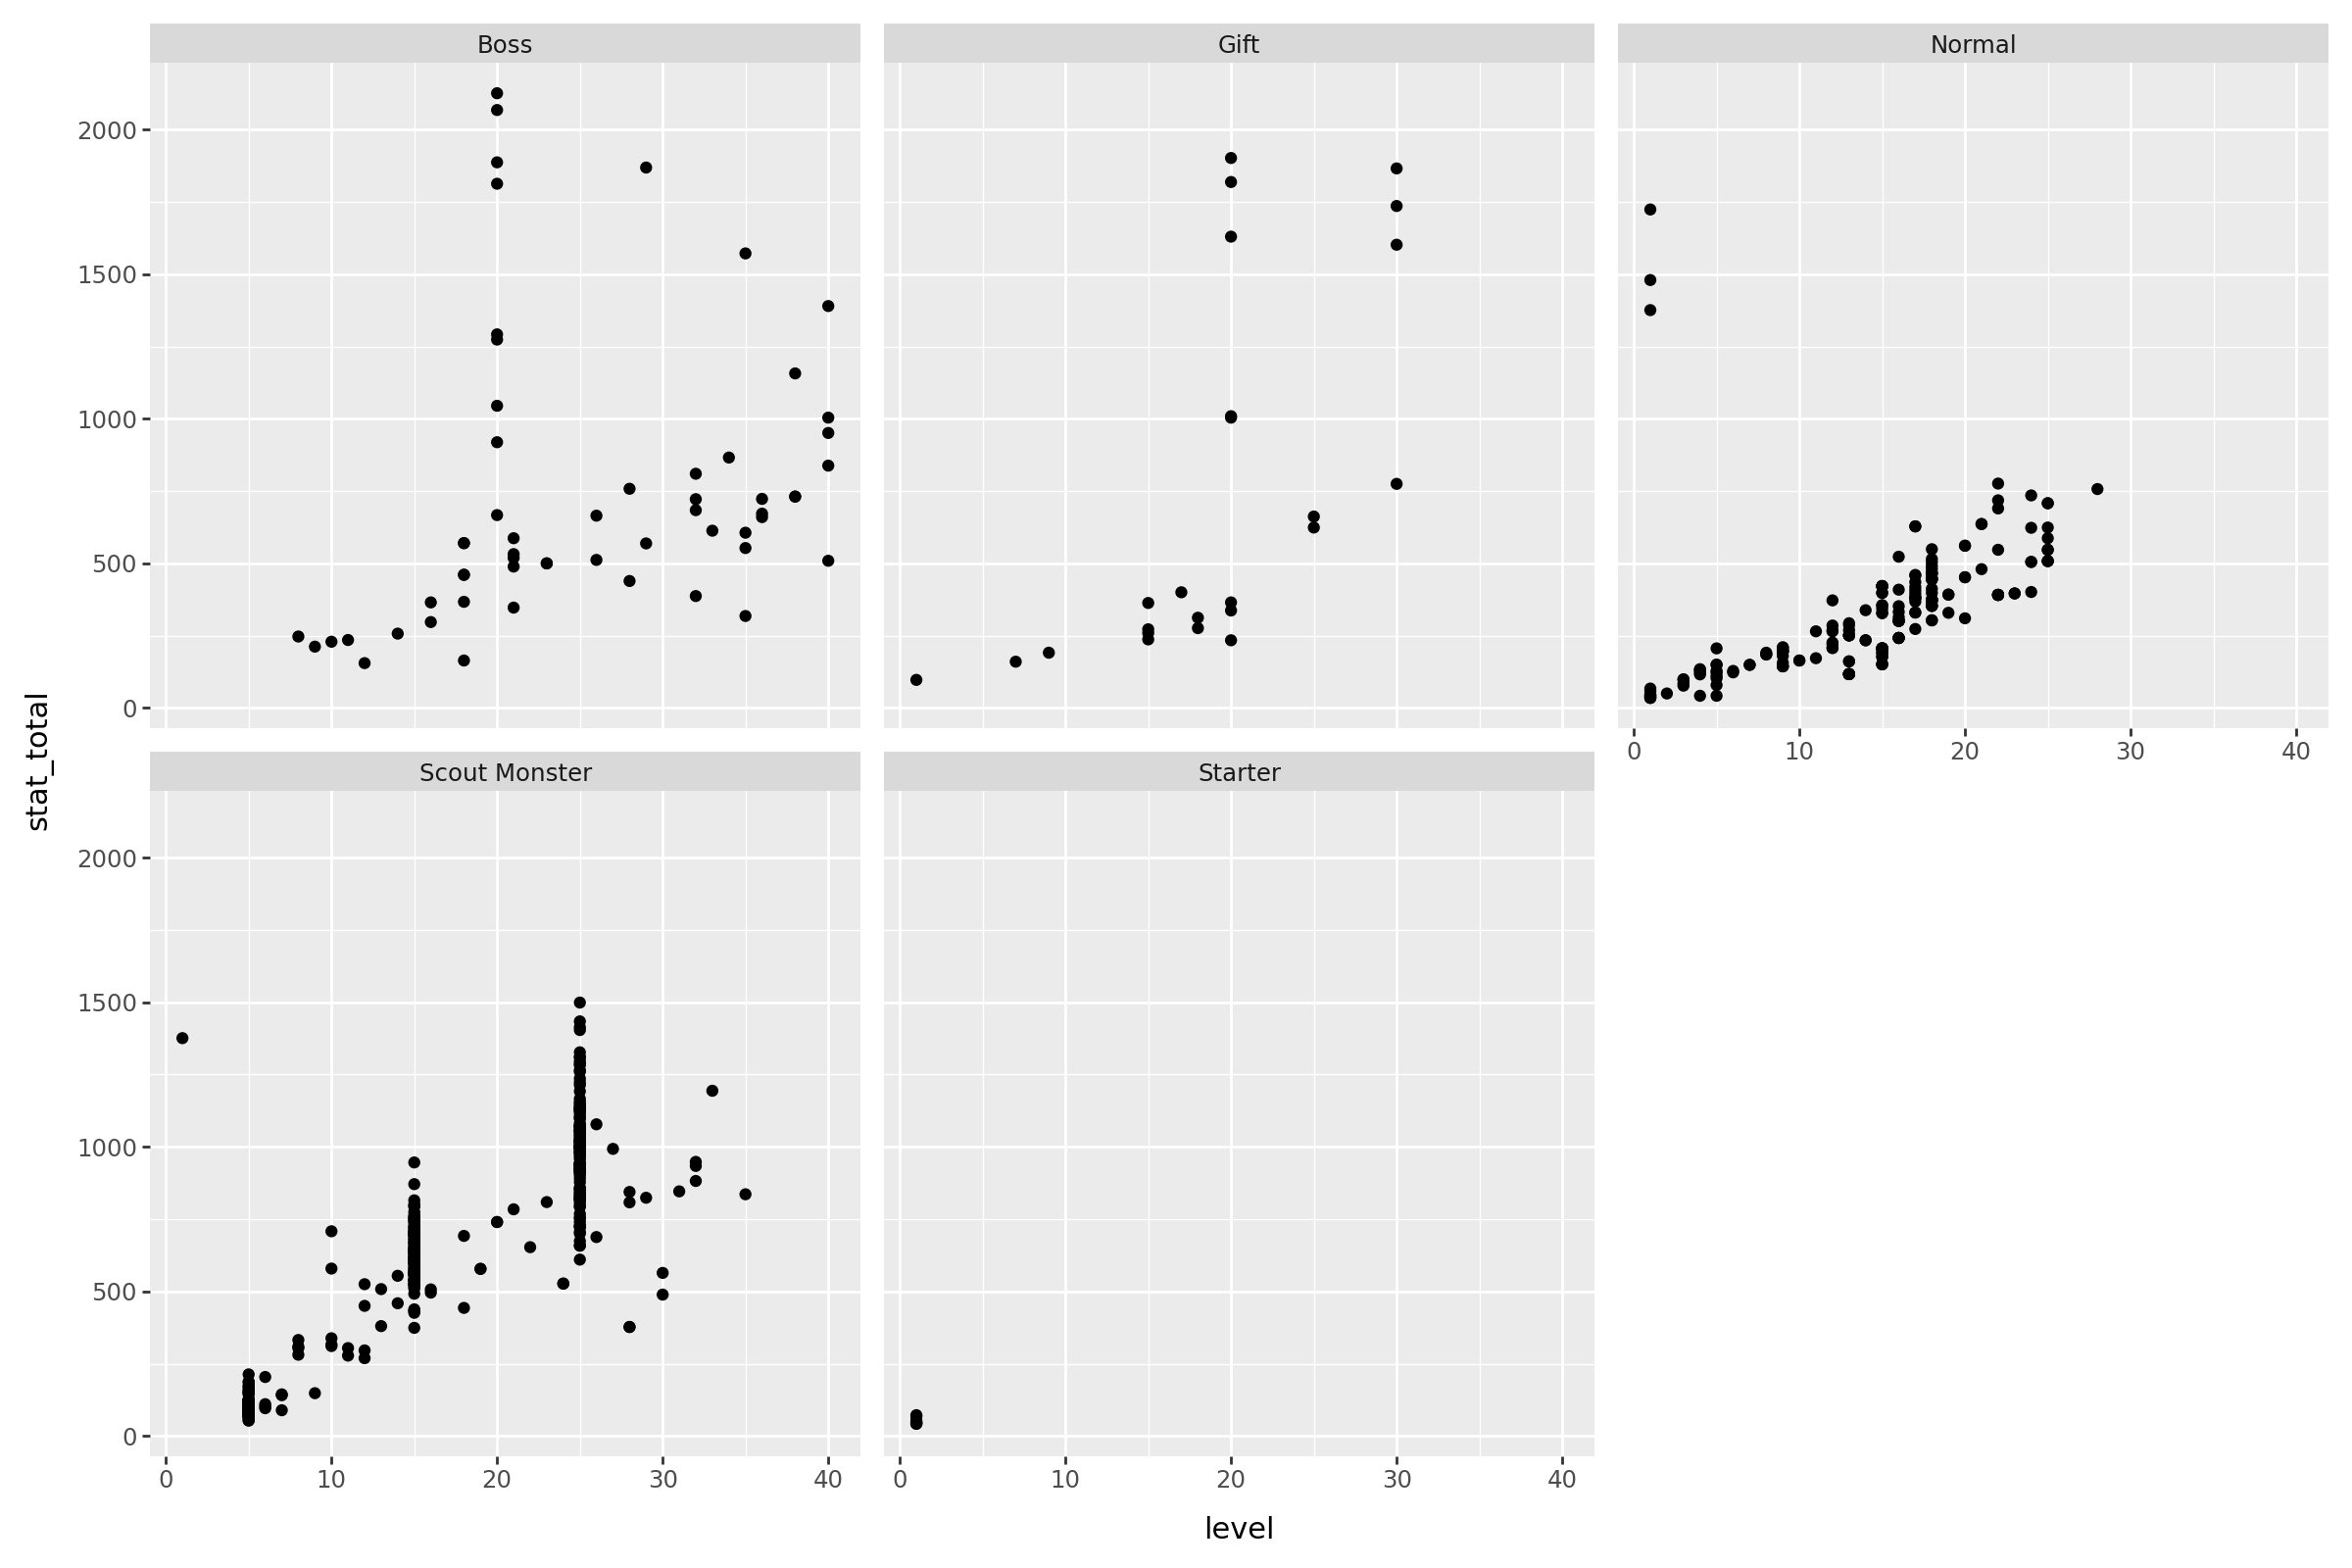

In [20]:
plt9.ggplot(encounters, plt9.aes("level", "stat_total")) +\
    plt9.geom_point() +\
    plt9.facet_wrap("encounter_type") +\
    plt9.theme(figure_size=(12, 8))

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


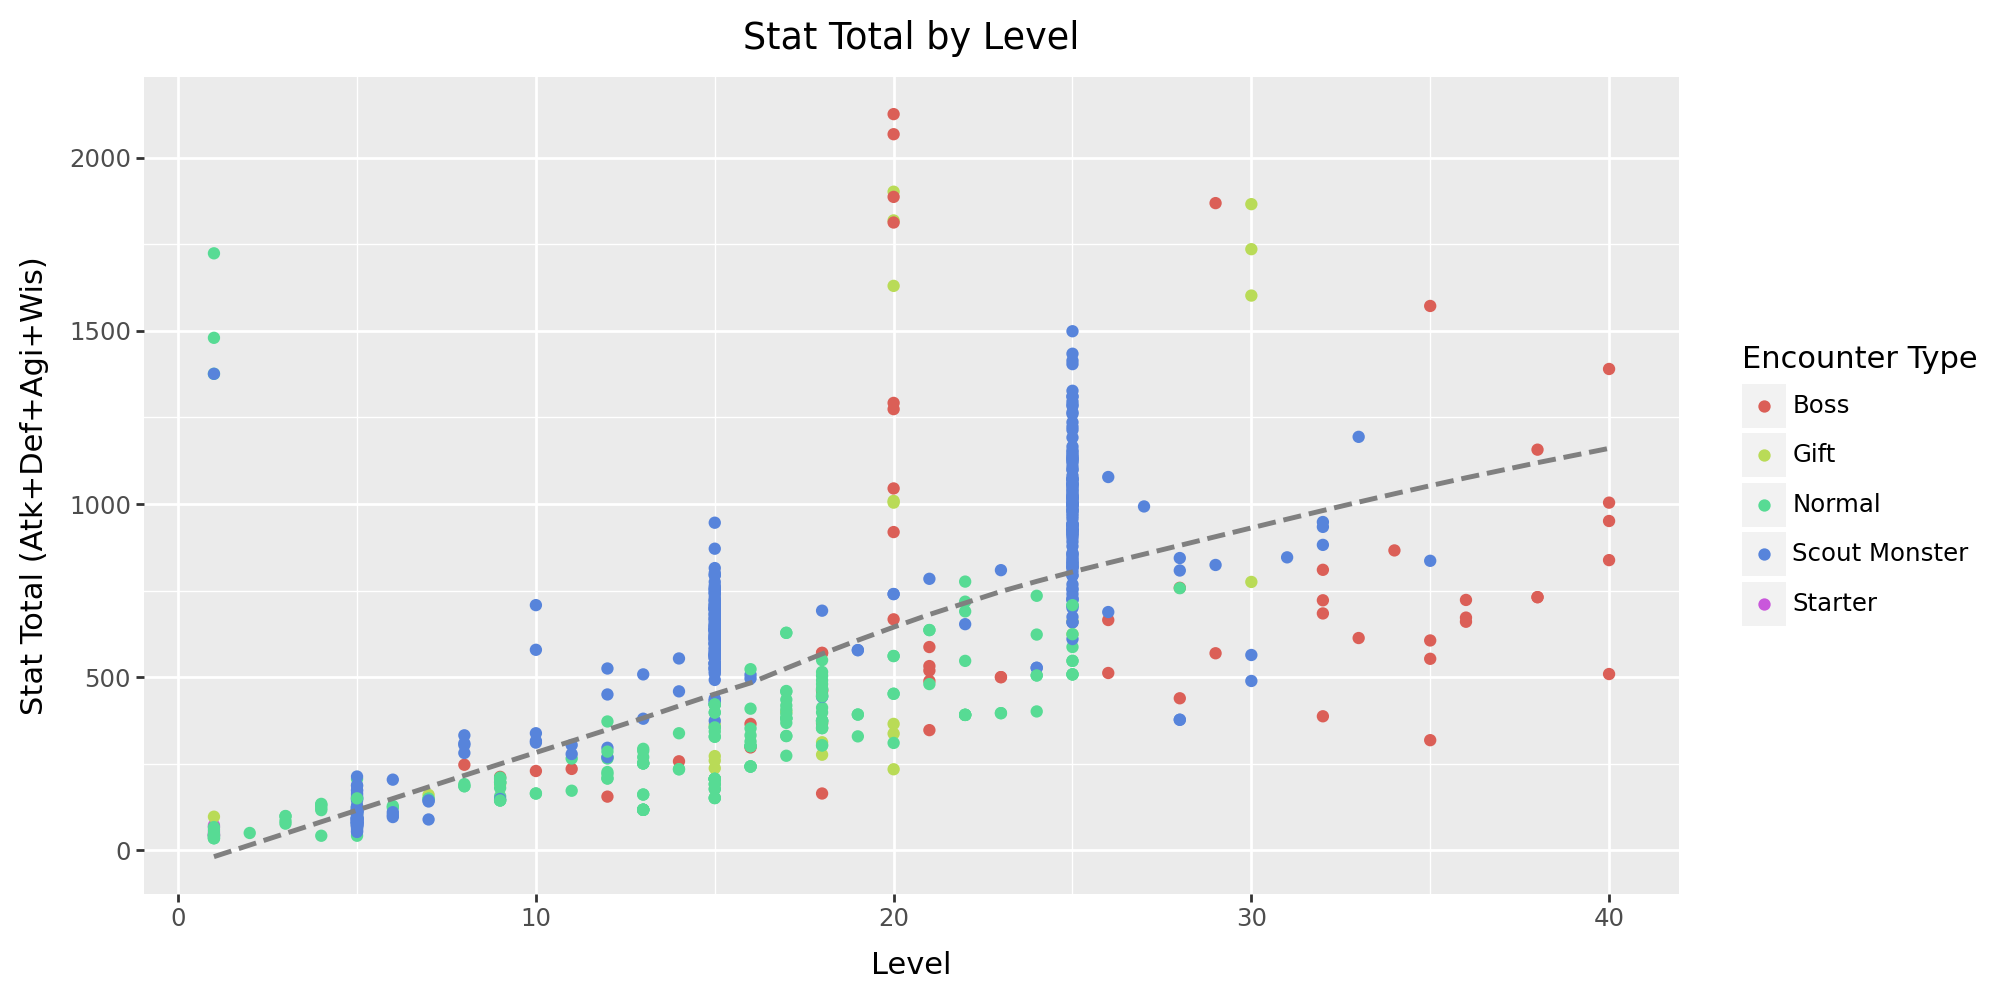

In [21]:
plt9.ggplot(encounters, plt9.aes("level", "stat_total")) +\
    plt9.geom_point(plt9.aes(color="encounter_type")) +\
    plt9.geom_smooth(linetype="dashed", color="grey") +\
    plt9.theme(figure_size=(10, 5)) +\
    plt9.ggtitle("Stat Total by Level") +\
    plt9.xlab("Level") +\
    plt9.ylab("Stat Total (Atk+Def+Agi+Wis)") +\
    plt9.labs(color="Encounter Type")

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aest

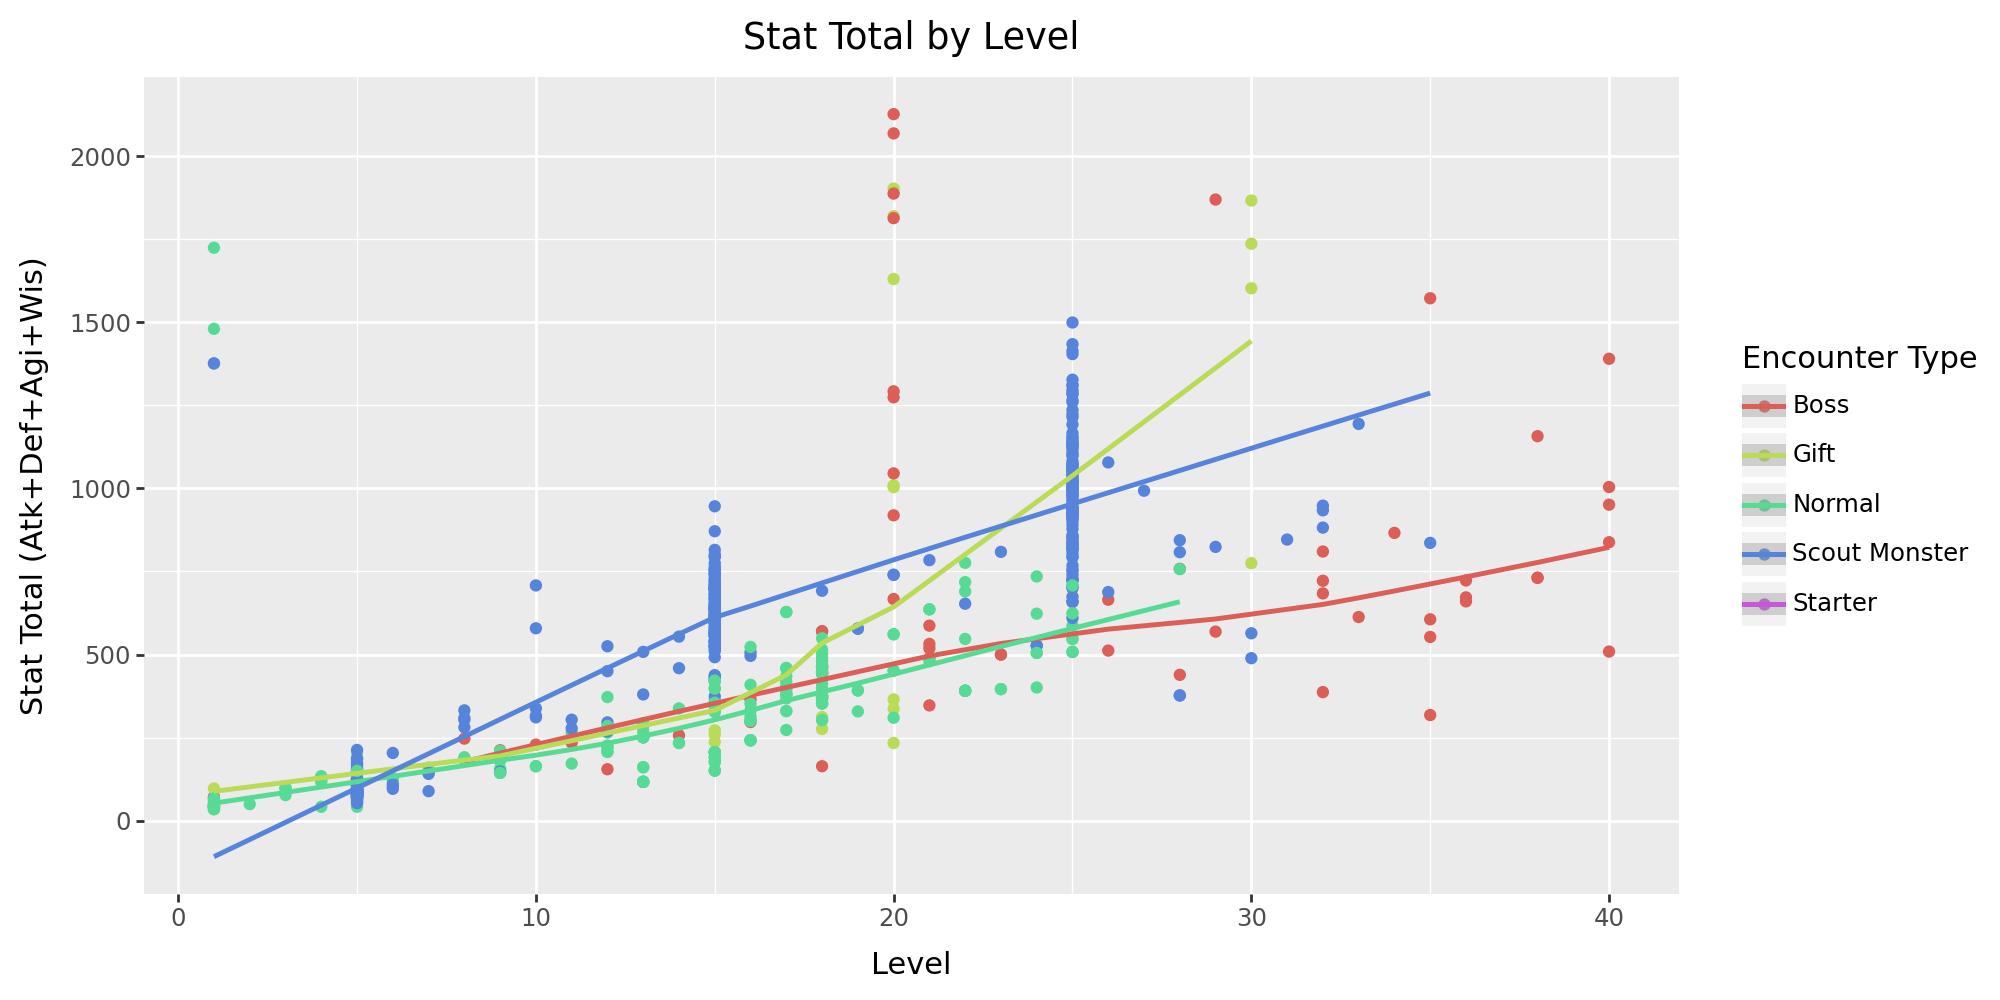

In [22]:
plt9.ggplot(encounters, plt9.aes("level", "stat_total", color="encounter_type")) +\
    plt9.geom_point() +\
    plt9.geom_smooth() +\
    plt9.theme(figure_size=(10, 5)) +\
    plt9.ggtitle("Stat Total by Level") +\
    plt9.xlab("Level") +\
    plt9.ylab("Stat Total (Atk+Def+Agi+Wis)") +\
    plt9.labs(color="Encounter Type")

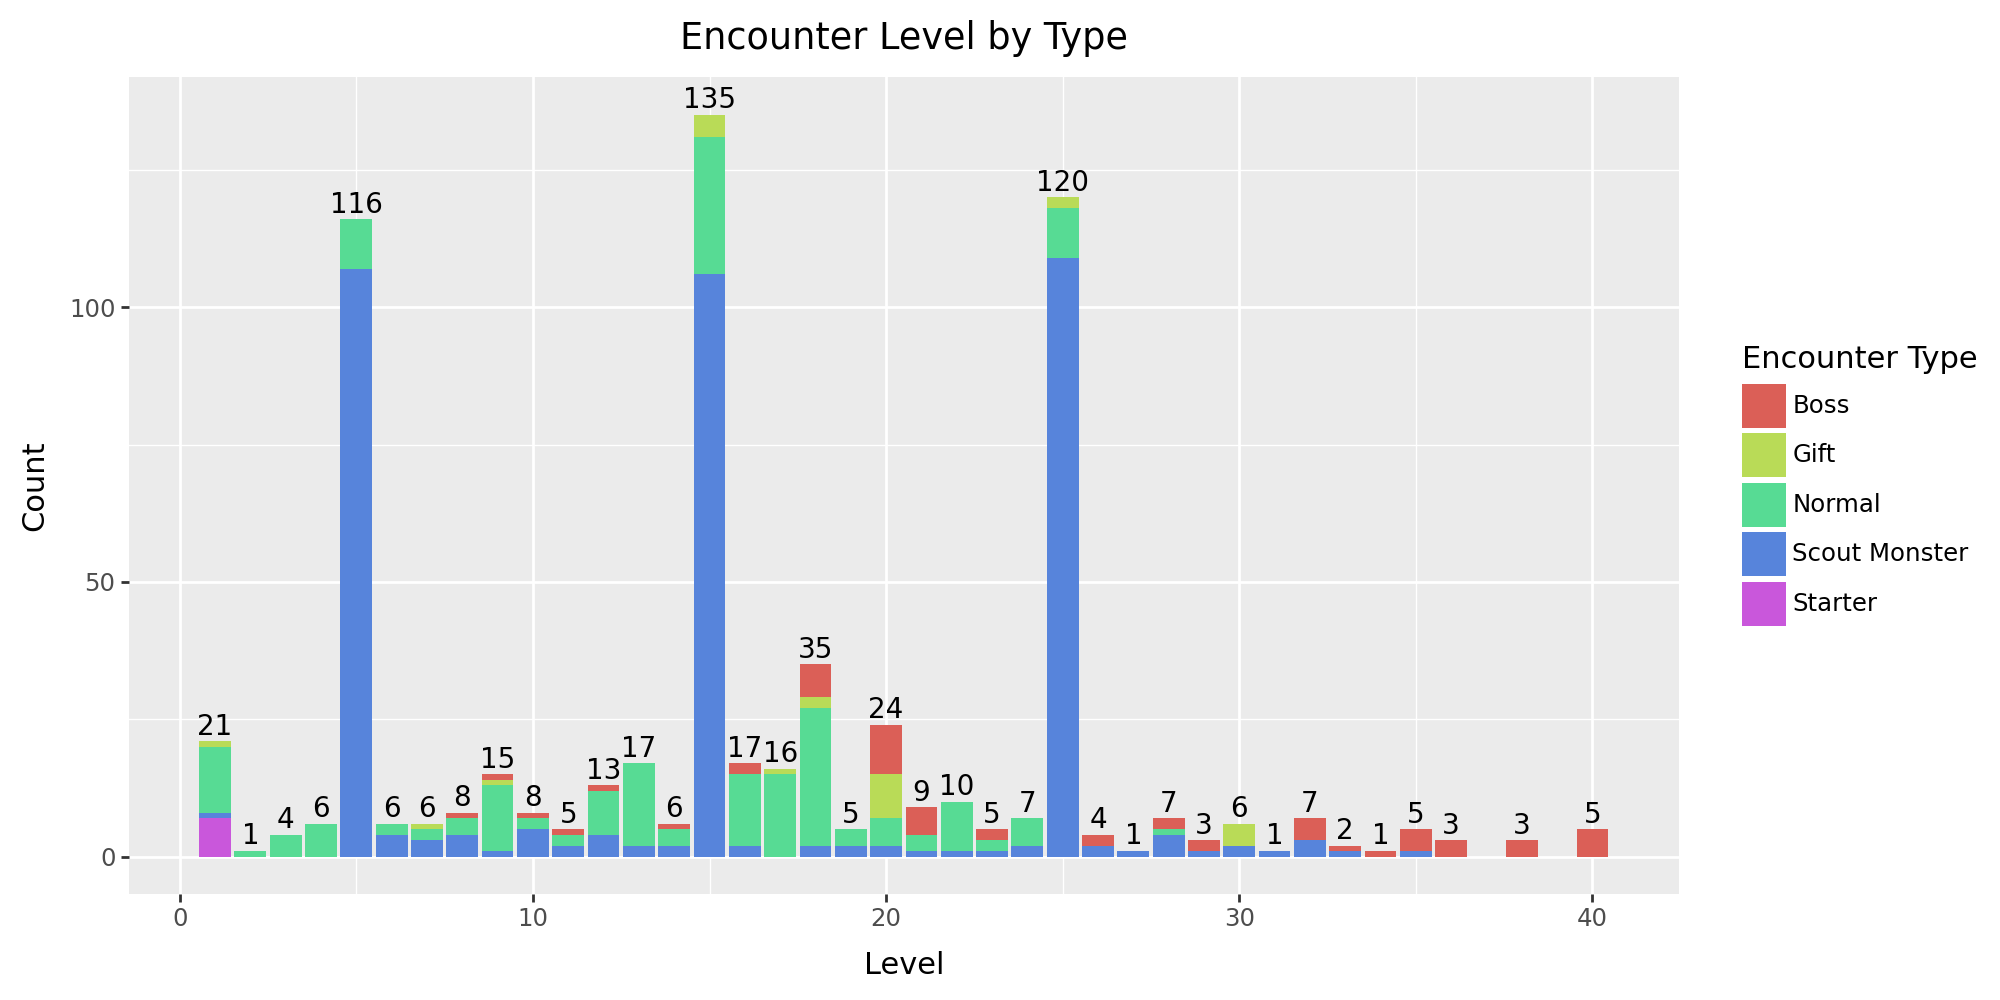

In [23]:
plt9.ggplot(encounters, plt9.aes("level")) +\
    plt9.geom_bar(plt9.aes("level", fill="encounter_type")) +\
    plt9.geom_text(
        plt9.aes(label=plt9.after_stat("count")), stat="count", nudge_y=0.125, va="bottom", size=10
    ) +\
    plt9.theme(figure_size=(10, 5)) +\
    plt9.ggtitle("Encounter Level by Type") +\
    plt9.xlab("Level") +\
    plt9.ylab("Count") +\
    plt9.labs(fill="Encounter Type")

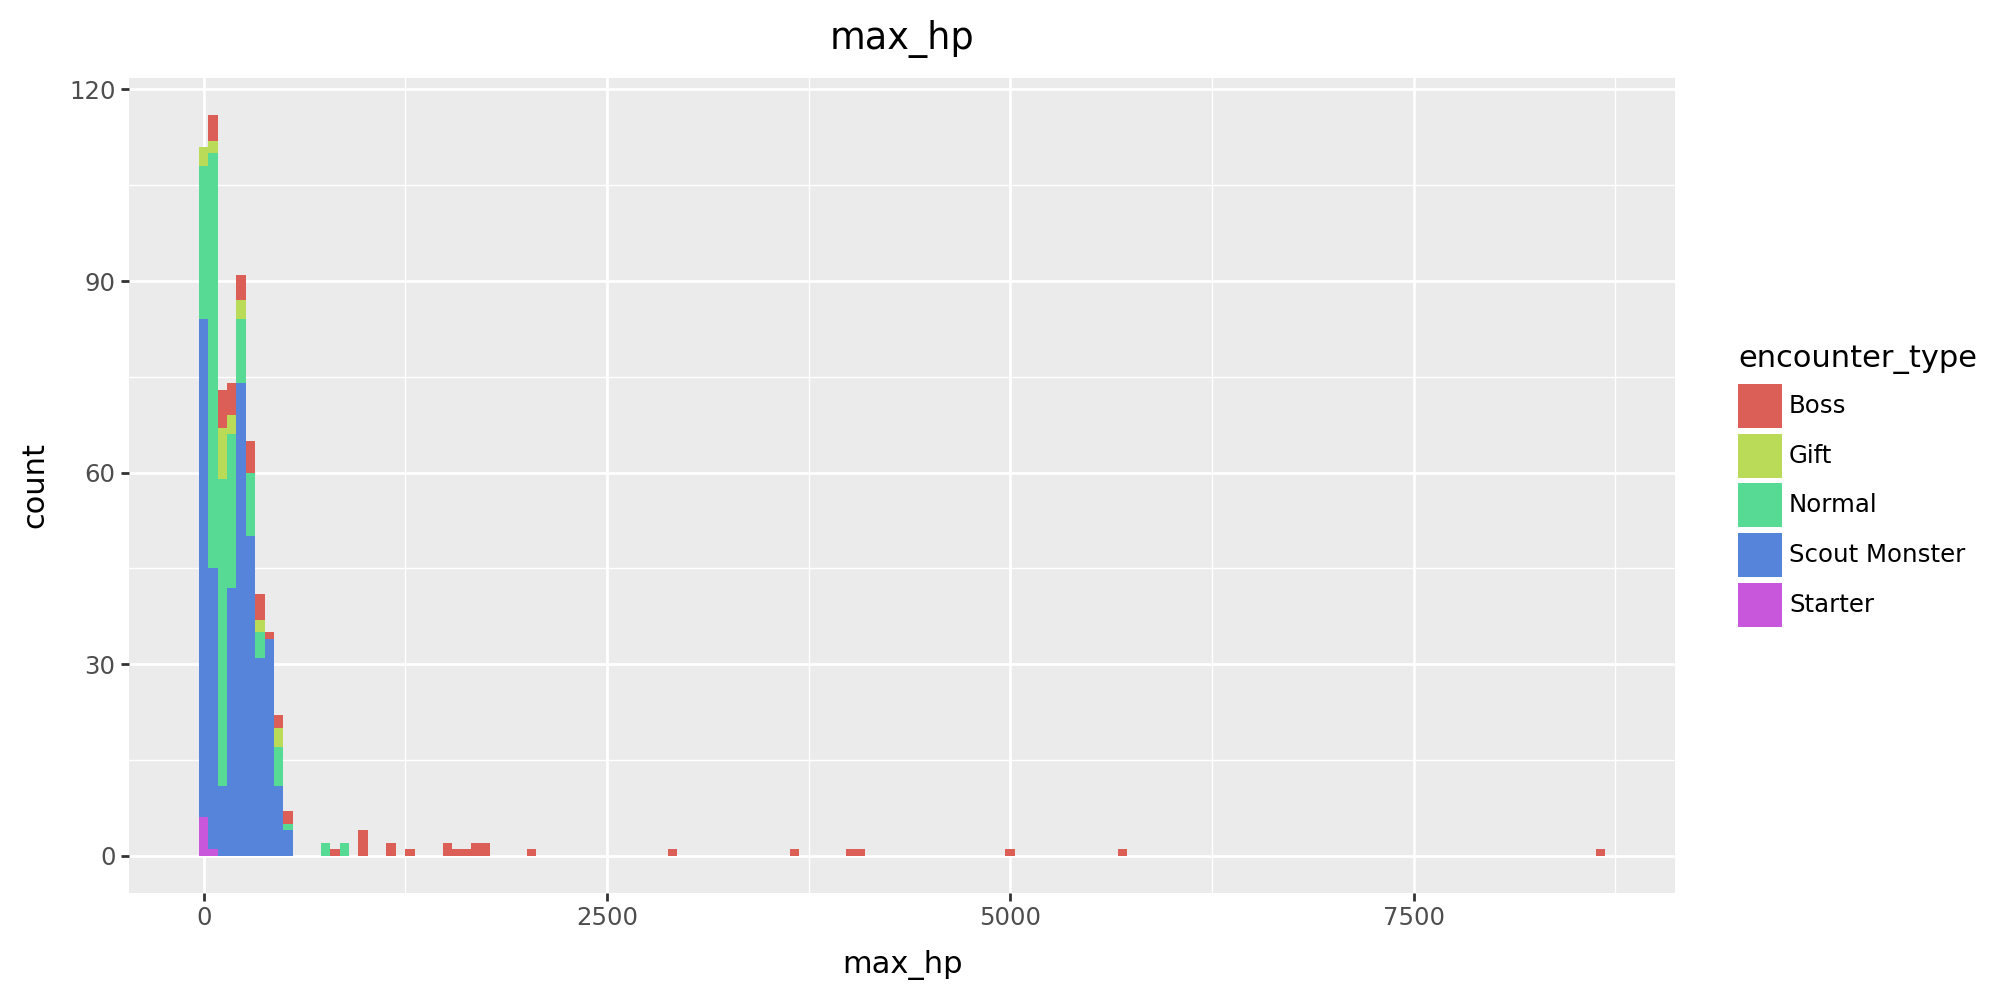

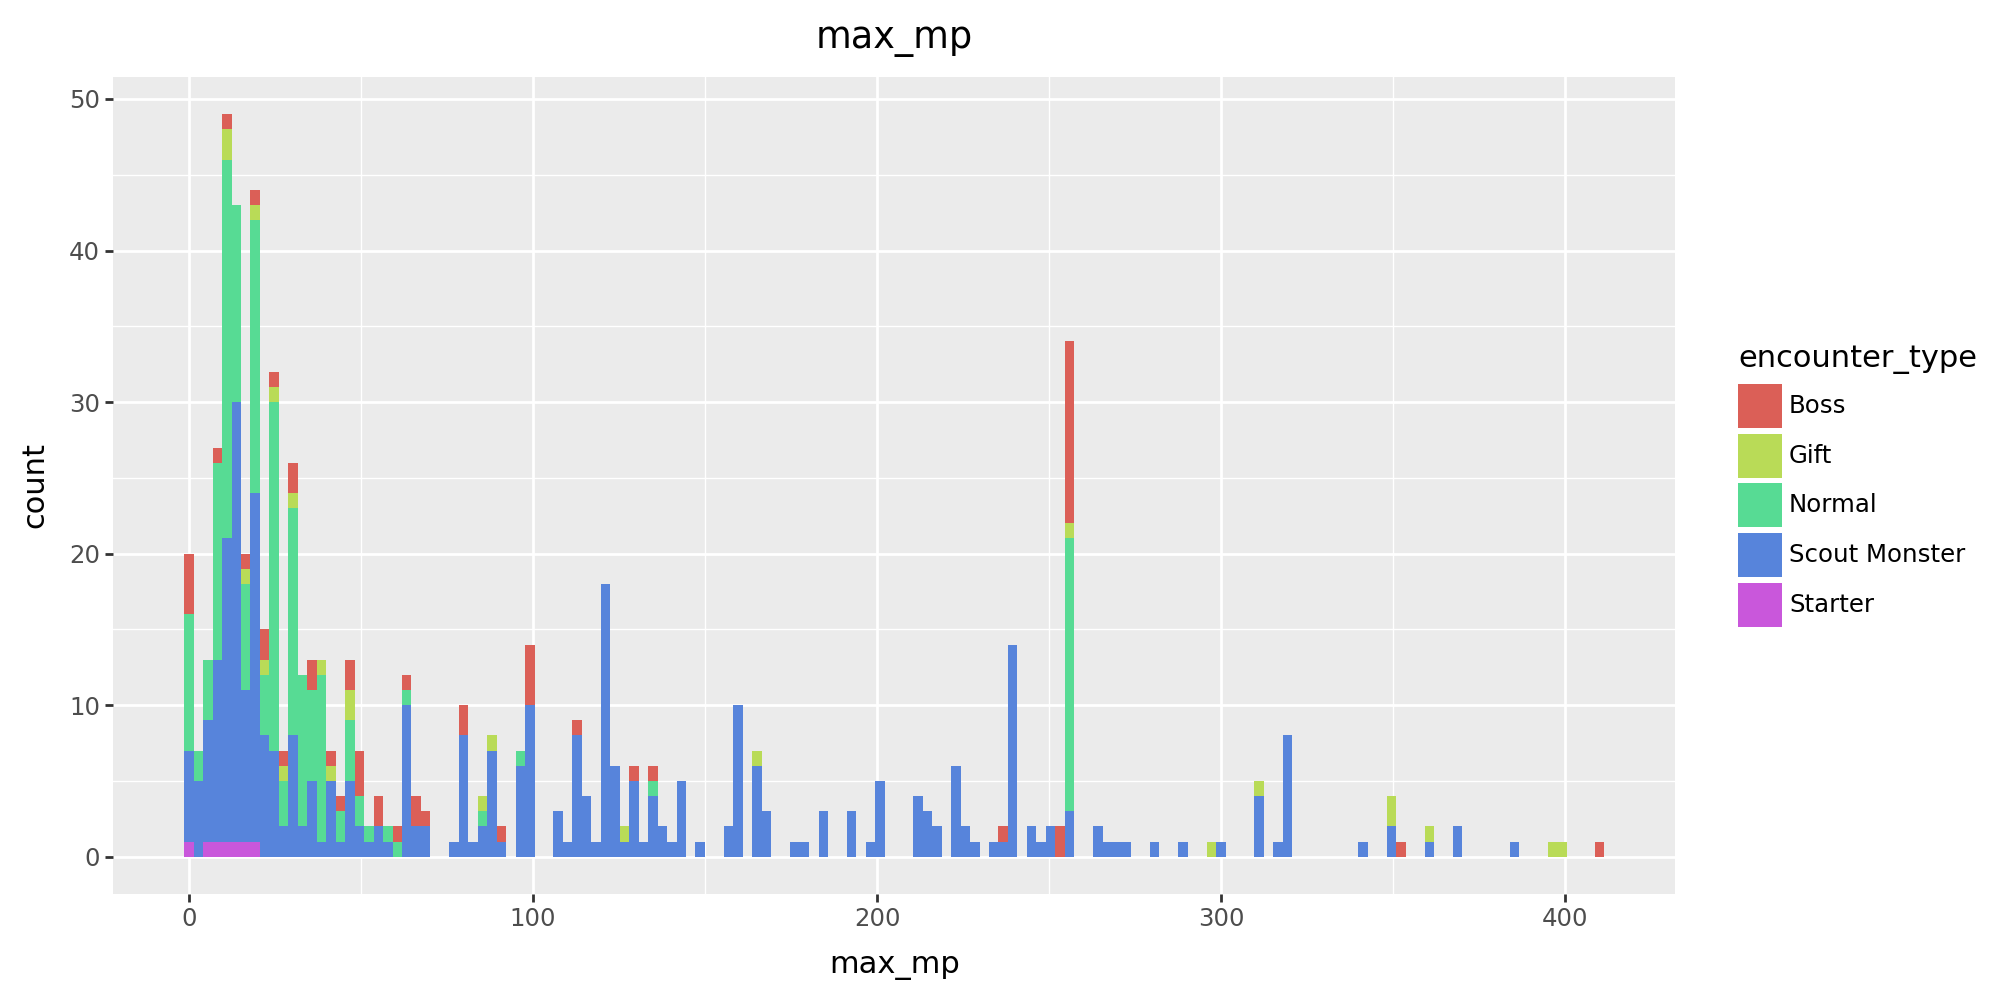

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_histogram : Removed 10 rows containing missing values.


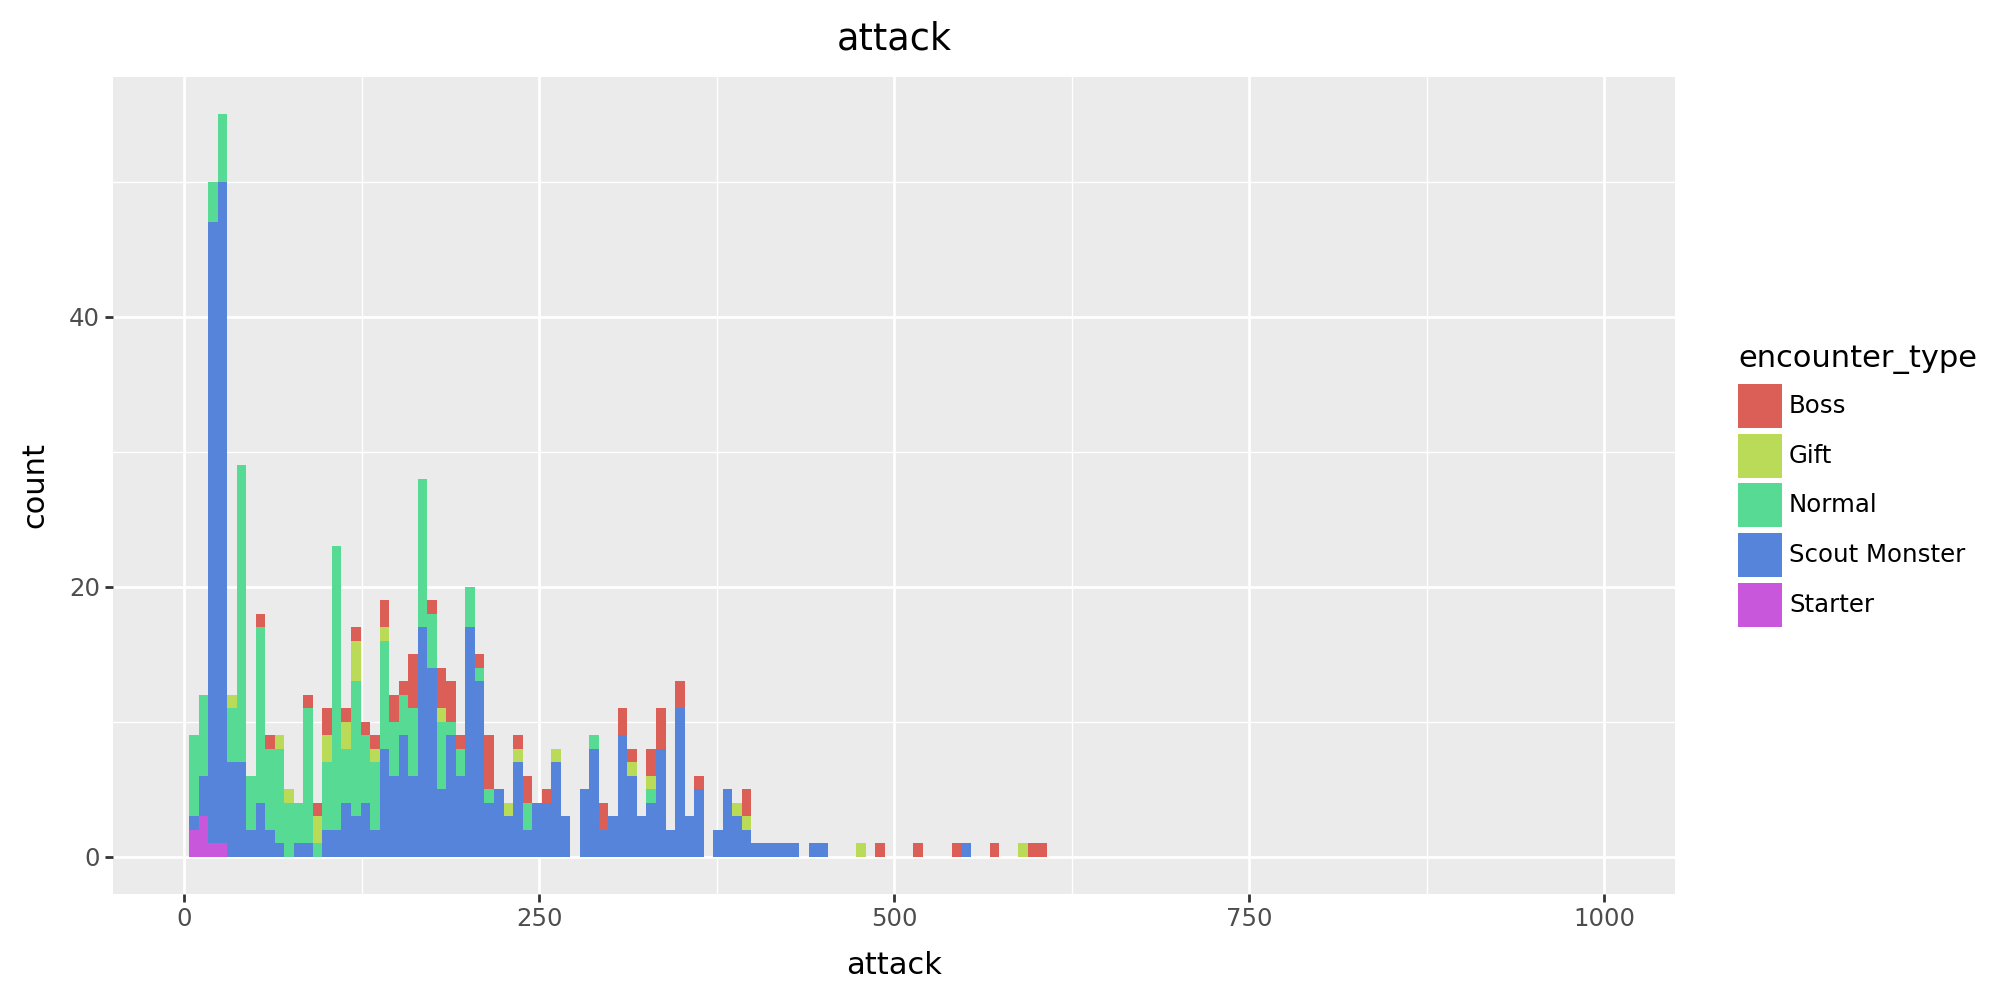

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_histogram : Removed 10 rows containing missing values.


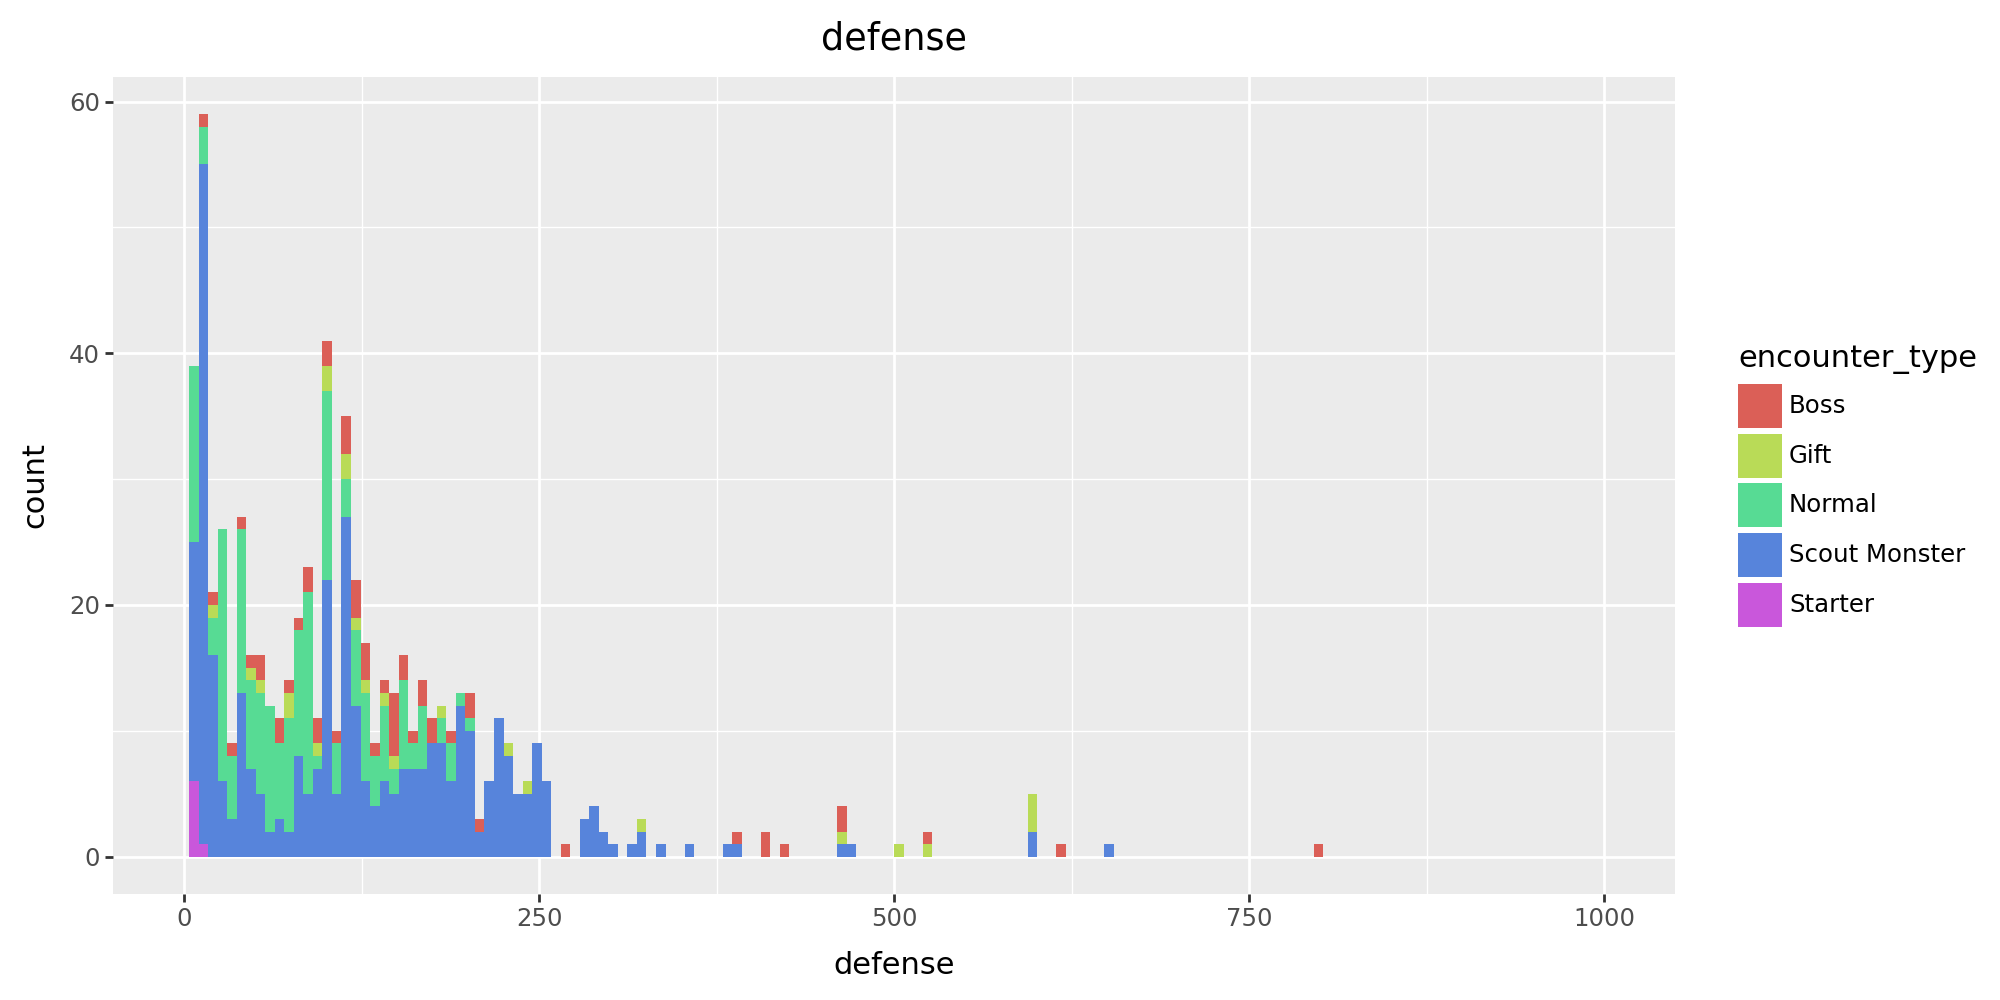

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_histogram : Removed 10 rows containing missing values.


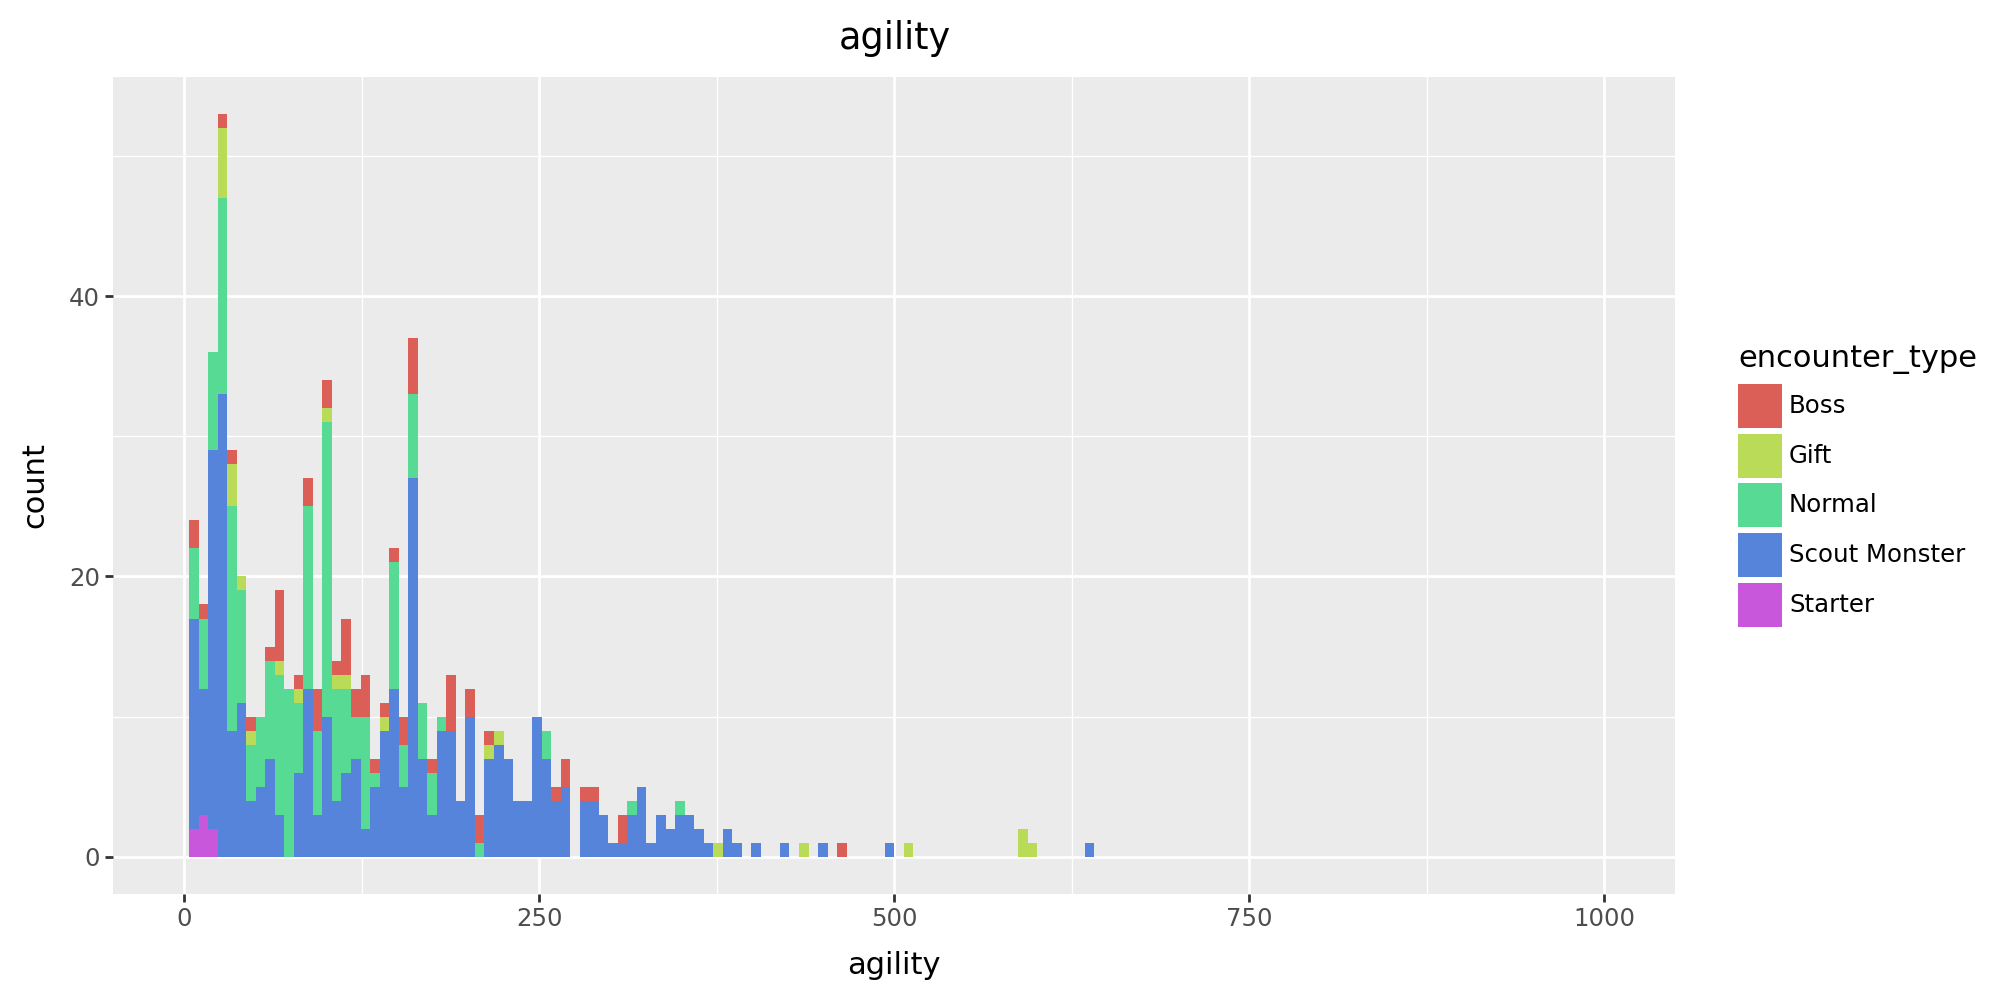

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_histogram : Removed 10 rows containing missing values.


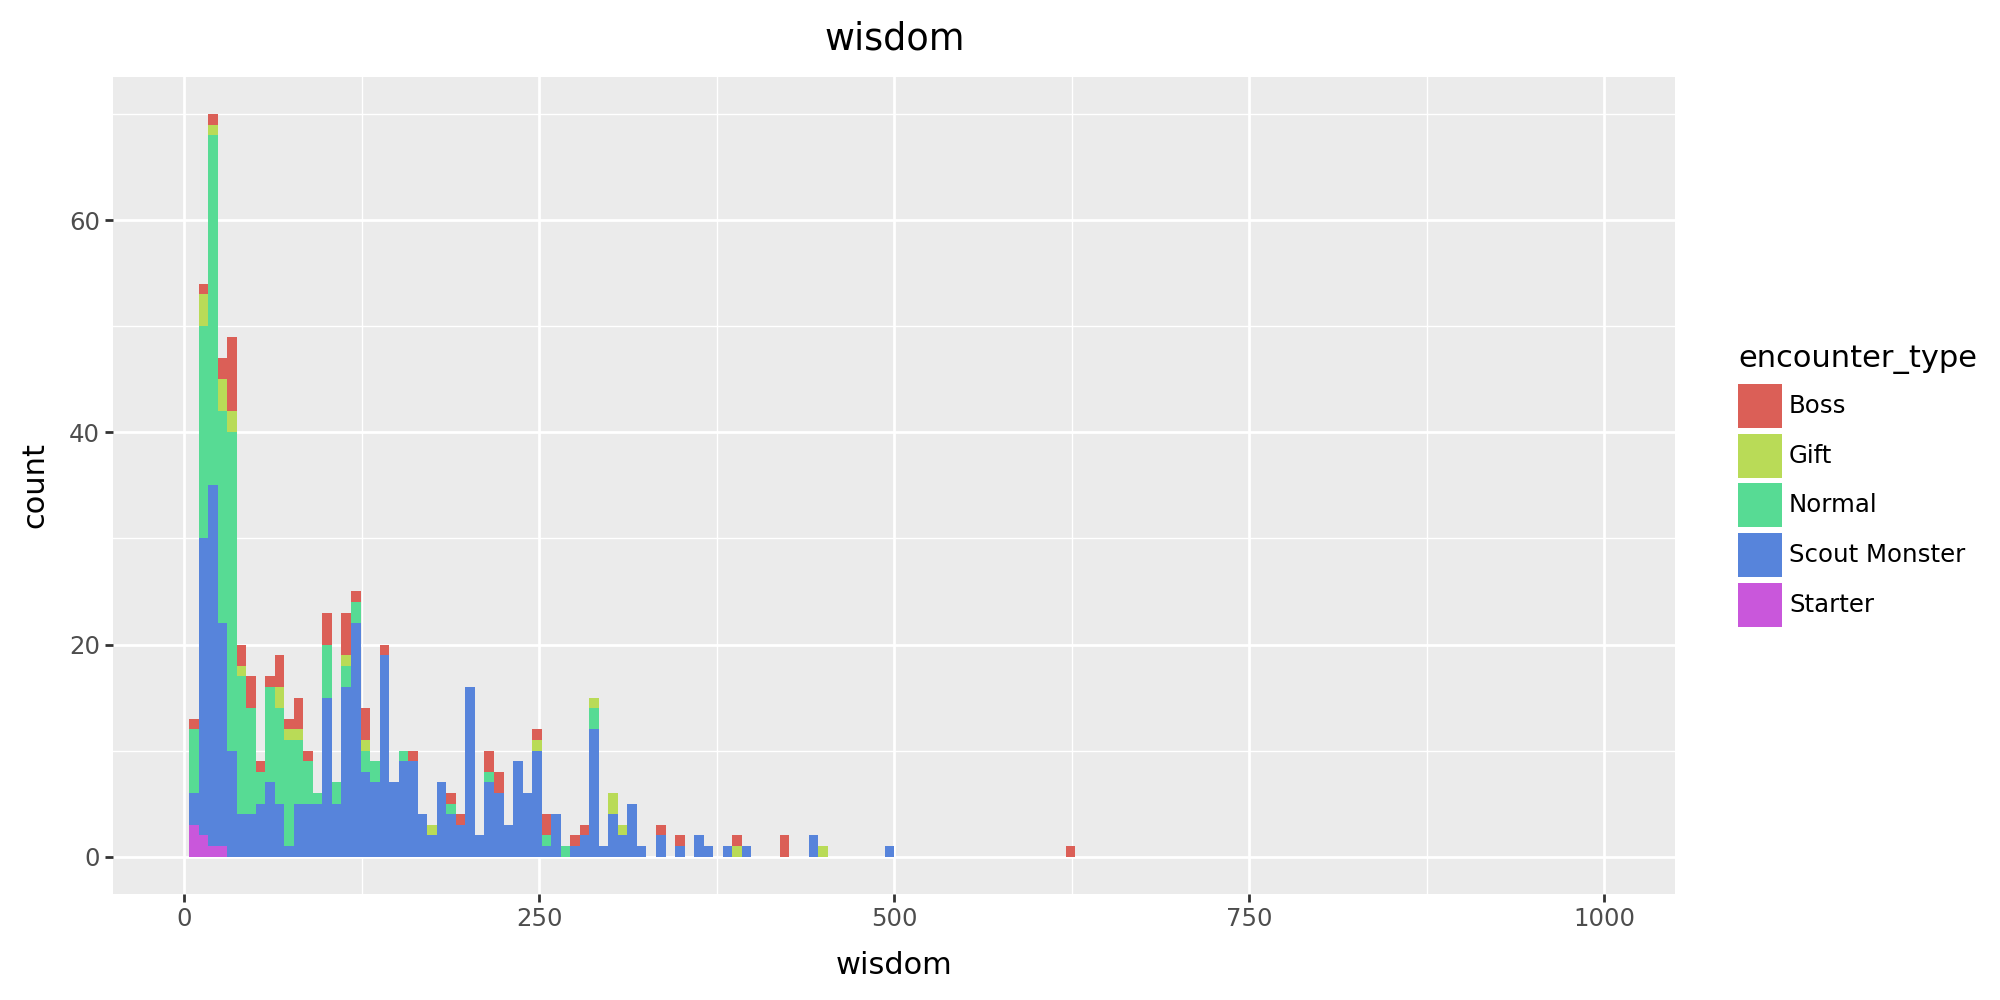

In [24]:
for stat in ["max_hp", "max_mp"]:
    plot = plt9.ggplot(encounters, plt9.aes(stat, fill="encounter_type")) +\
        plt9.geom_histogram(bins=150) +\
        plt9.ggtitle(stat) +\
        plt9.theme(figure_size=(10, 5))
    plot.show()

for stat in ["attack", "defense", "agility", "wisdom"]:
    plot = plt9.ggplot(encounters, plt9.aes(stat, fill="encounter_type")) +\
        plt9.geom_histogram(bins=150) +\
        plt9.xlim(0, 1000) +\
        plt9.ggtitle(stat) +\
        plt9.theme(figure_size=(10, 5))
    plot.show()

In [25]:
def get_outliers(encounters: pd.DataFrame) -> pd.DataFrame:
    return encounters[np.logical_or(np.logical_or(np.logical_or(np.logical_or(
        np.logical_and(encounters["level"] == 1, encounters["stat_total"] > 500),
        np.logical_and(encounters["level"] == 20, encounters["stat_total"] > 800)),
        np.logical_and(encounters["level"] == 30, encounters["stat_total"] > 1000)),
        encounters["level"] >= 37),
        encounters["stat_total"] > 1510
    )]

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\plotnine\stats\stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aest

16 [ 0.24672613 -0.41903836]
17 [0.07342348 0.8479911 ]


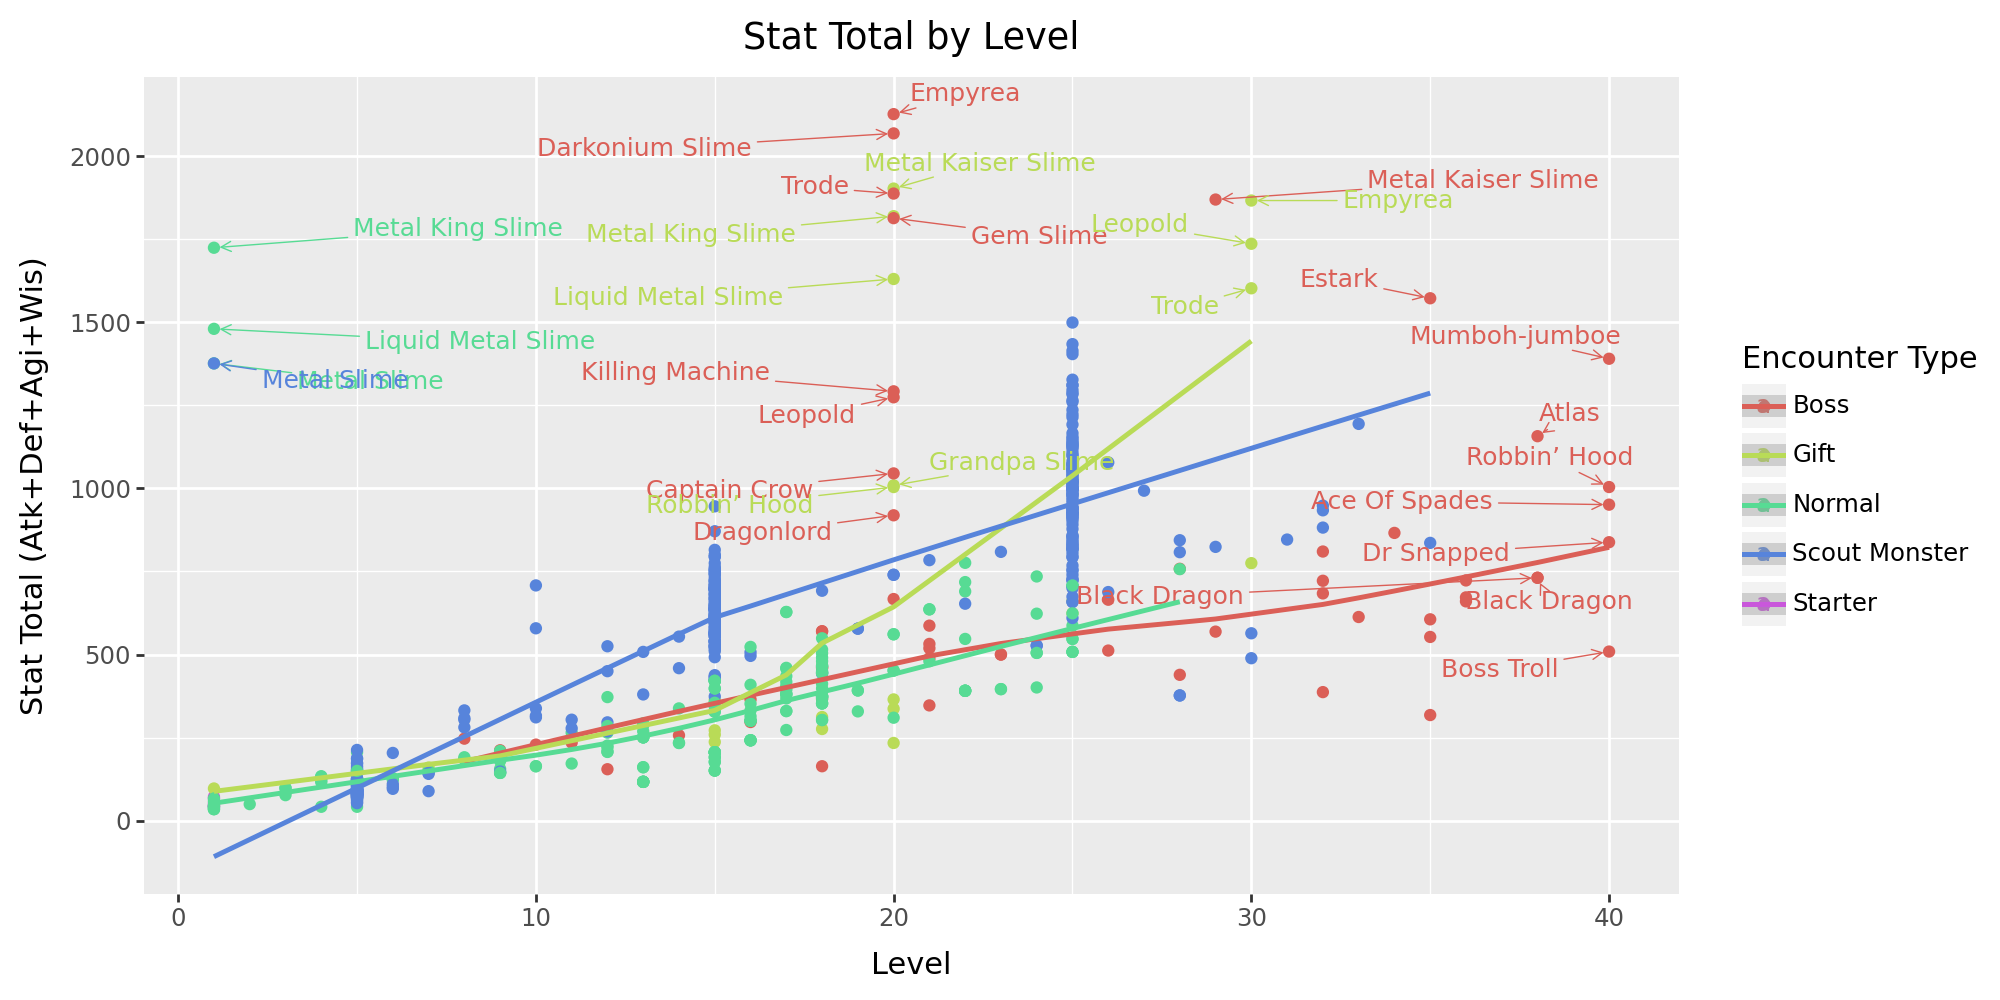

In [26]:
plt9.ggplot(encounters, plt9.aes("level", "stat_total", color="encounter_type")) +\
    plt9.geom_point() +\
    plt9.geom_text(get_outliers(encounters), plt9.aes(label="species"), size=9, adjust_text={}) +\
    plt9.geom_smooth() +\
    plt9.theme(figure_size=(10, 5)) +\
    plt9.ggtitle("Stat Total by Level") +\
    plt9.xlab("Level") +\
    plt9.ylab("Stat Total (Atk+Def+Agi+Wis)") +\
    plt9.labs(color="Encounter Type")

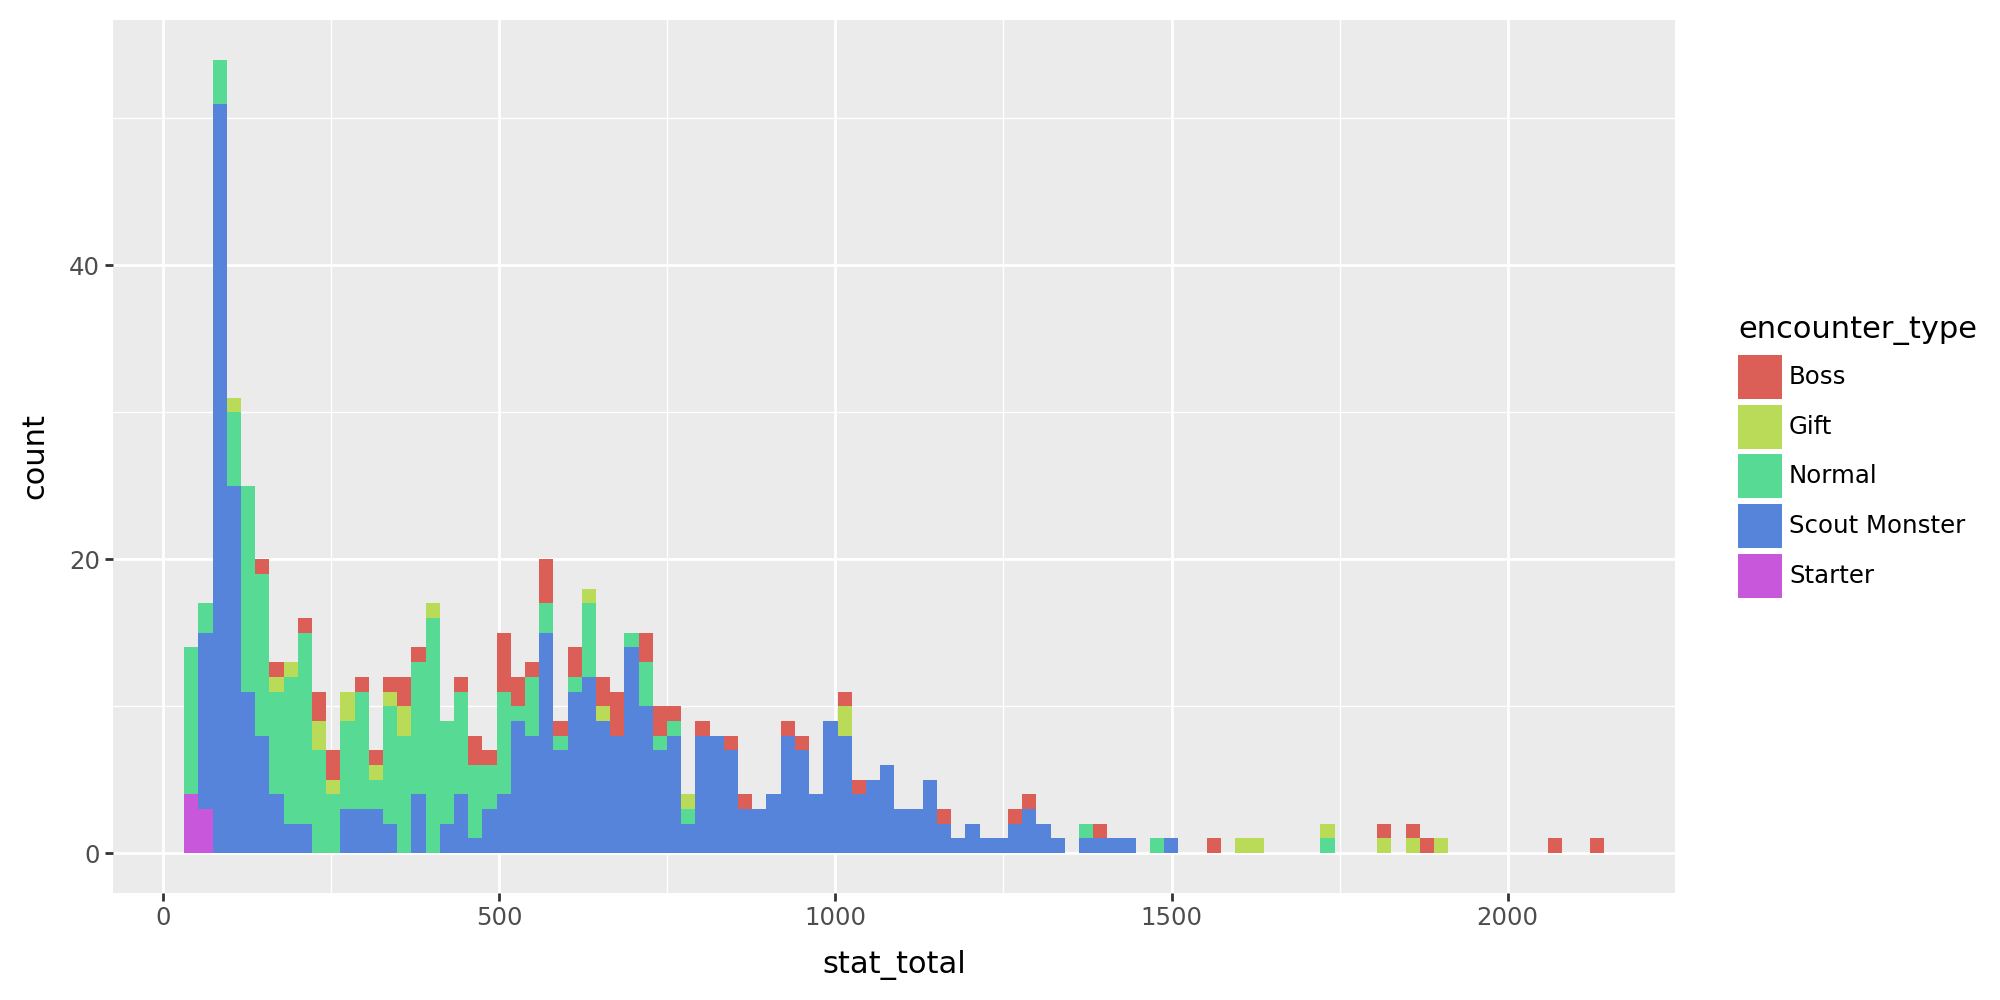

In [32]:
plt9.ggplot(encounters, plt9.aes("stat_total", fill="encounter_type")) +\
    plt9.geom_histogram(bins=100) +\
    plt9.theme(figure_size=(10, 5))

In [171]:
import random

def randomize_with_bias(encounters: pd.DataFrame, leniency: int, seed: int) -> pd.DataFrame:
    random.seed(seed)
    
    encounters = encounters.copy()
    encounters["encounter_id"] = range(0, len(encounters))
    old_indicies = encounters.sort_values("stat_total").index

    if leniency != -1:
        encounters["weight"] = [
            stat_total + random.uniform(-leniency / 2, leniency / 2)
            for stat_total in encounters["stat_total"]
        ]
        new_encounters = encounters.sort_values("weight")
    else:
        new_encounters = encounters.sample(frac=1)
    
    new_encounters.index = old_indicies
    new_encounters = new_encounters.sort_index()
    new_encounters["old_stat_total"] = list(encounters["stat_total"])
    new_encounters["old_species_id"] = list(encounters["species_id"])
    new_encounters["old_encounter_id"] = list(encounters["encounter_id"])
    new_encounters["same_species_id"] = pd.Categorical(new_encounters["old_species_id"] == new_encounters["species_id"], [True, False])
    new_encounters["same_encounter"] = pd.Categorical(new_encounters["old_encounter_id"] == new_encounters["encounter_id"], [True, False])
    new_encounters["stat_total_change"] = new_encounters["stat_total"] - new_encounters["old_stat_total"]
    new_encounters["abs_stat_total_change"] = (new_encounters["stat_total"] - new_encounters["old_stat_total"]).abs()
    
    return new_encounters

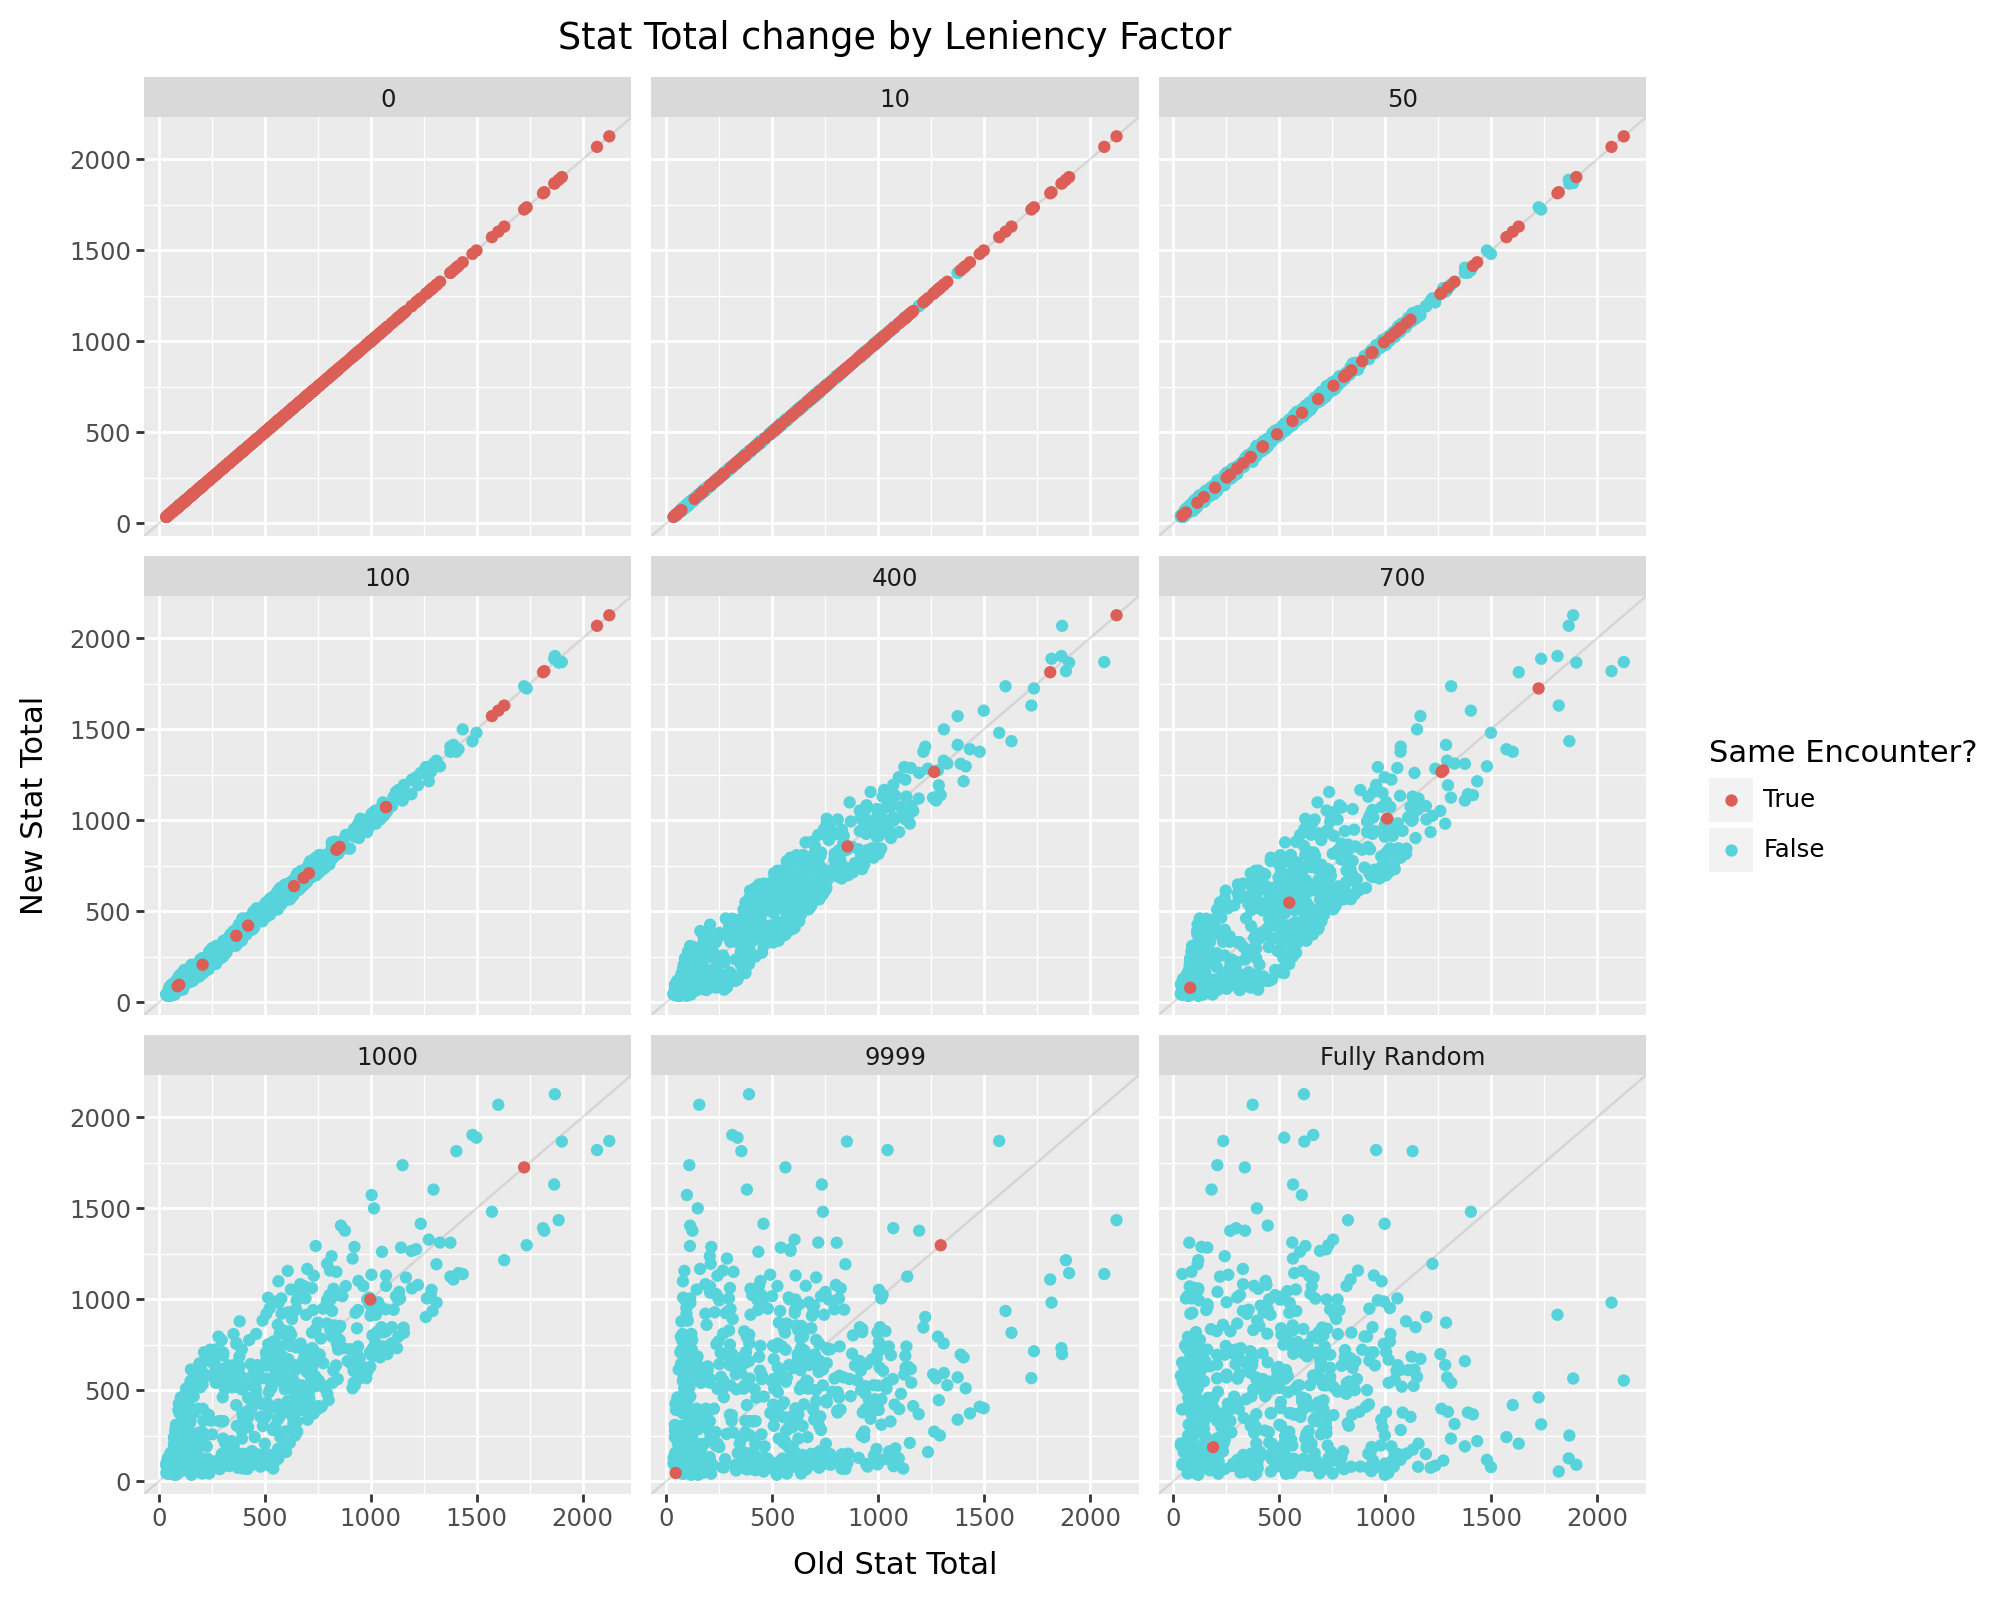

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: 

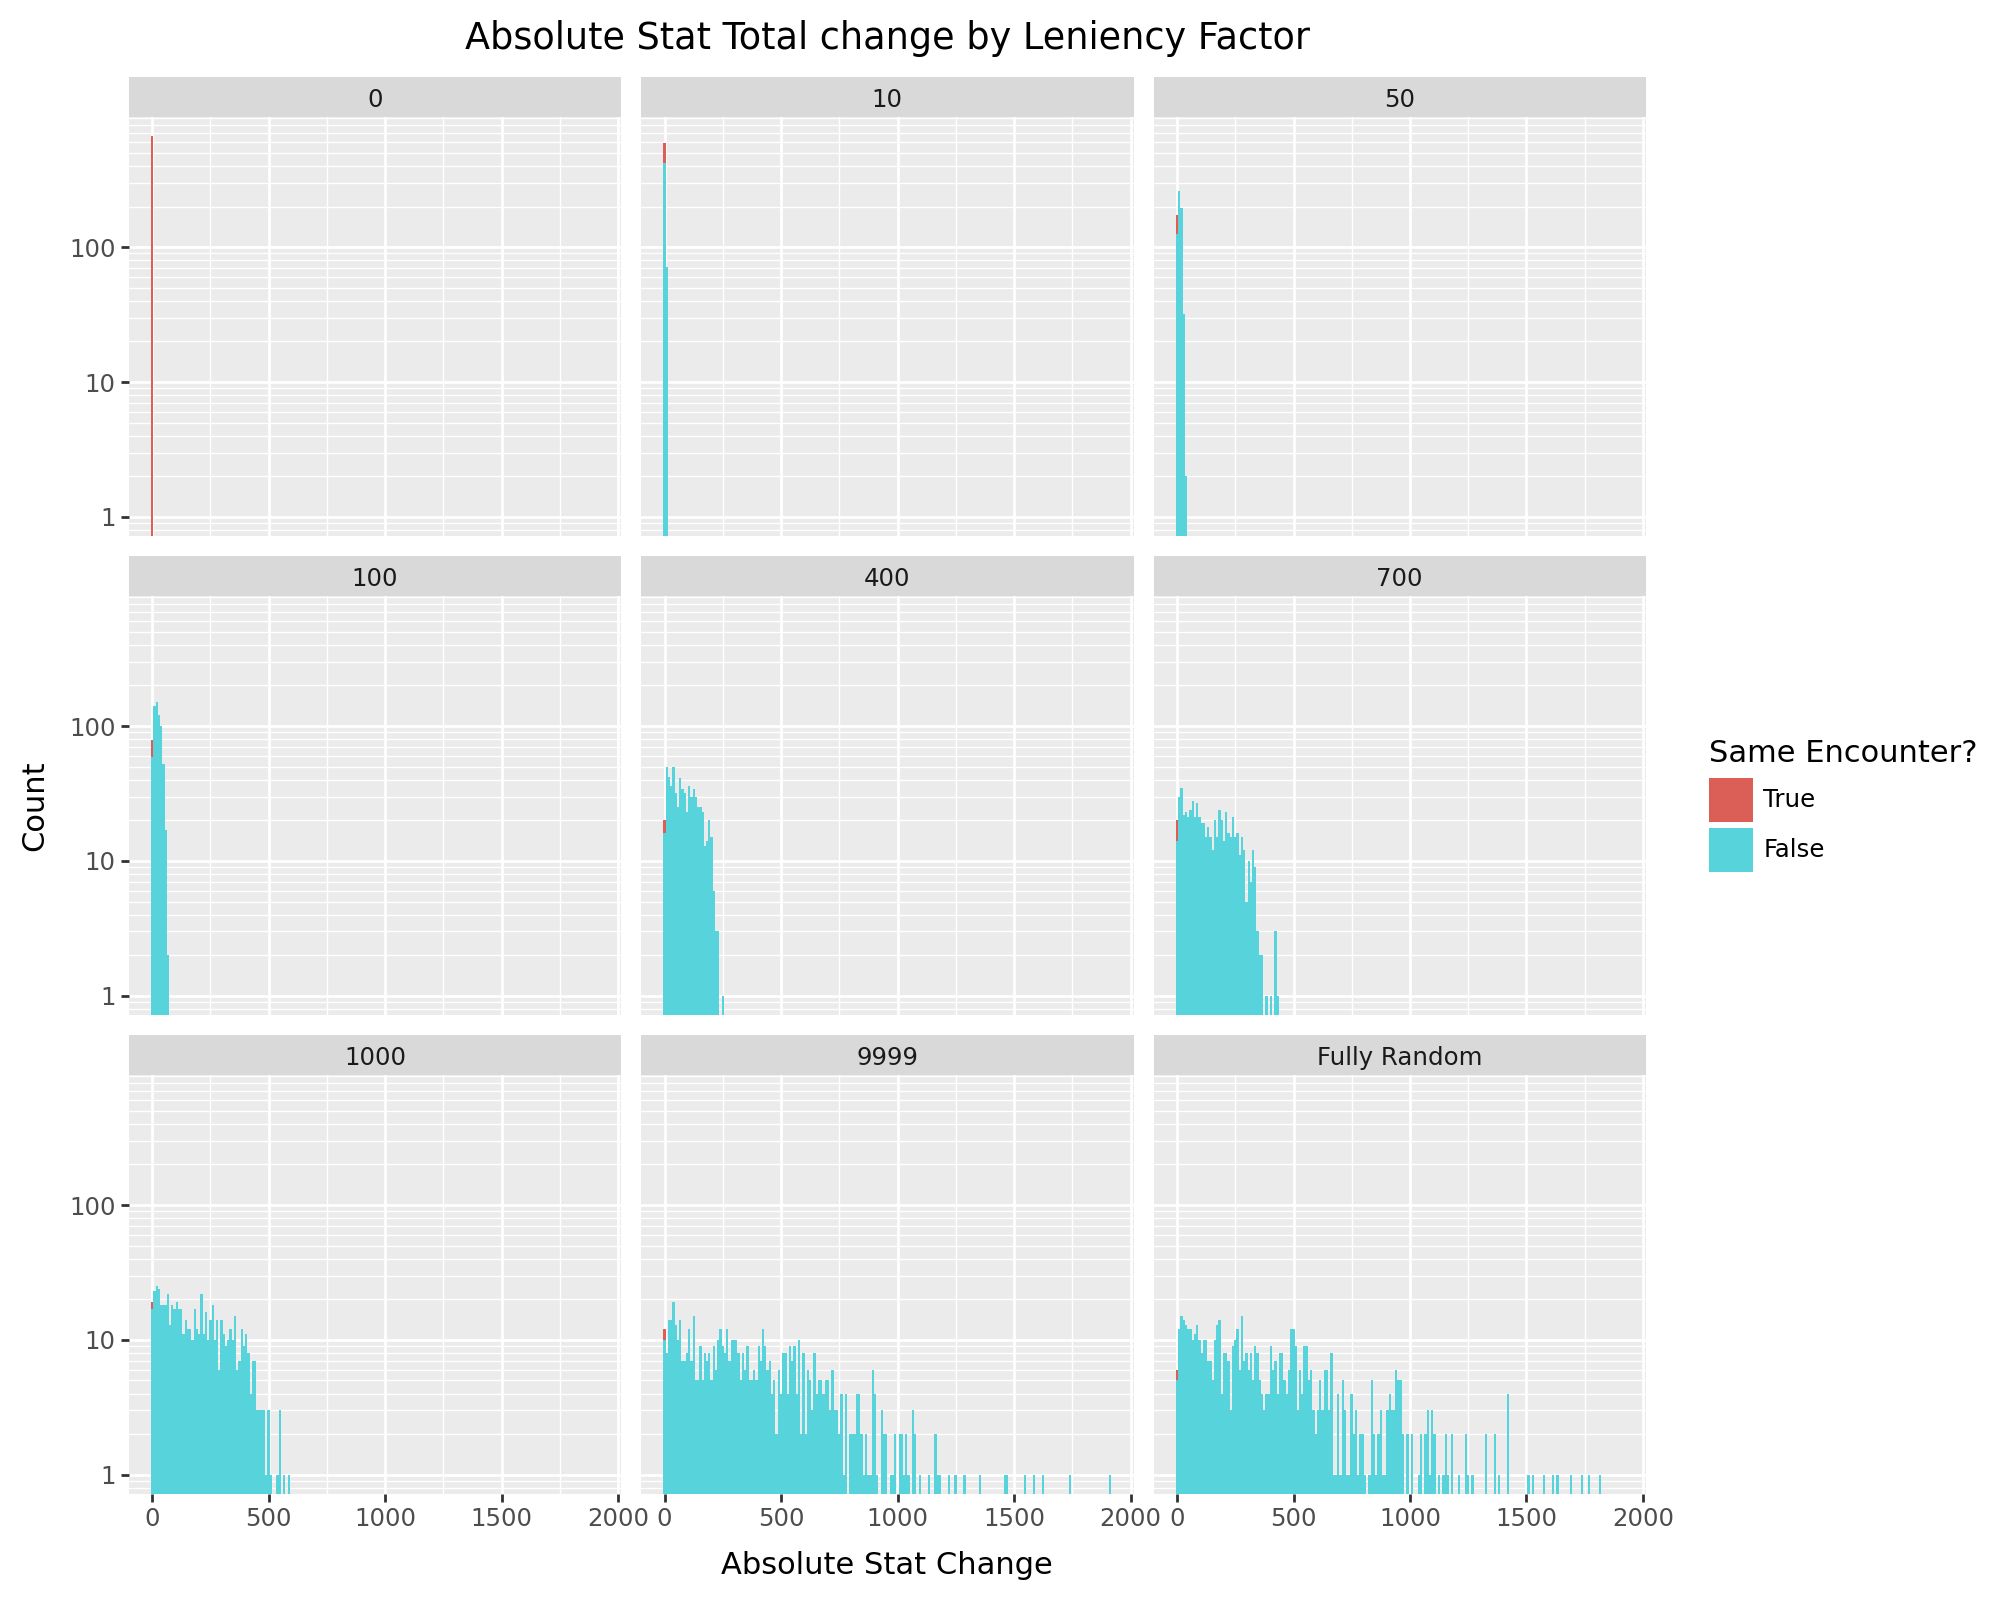

C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\cwell\miniforge3\envs\dqmj1_randomizer\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: 

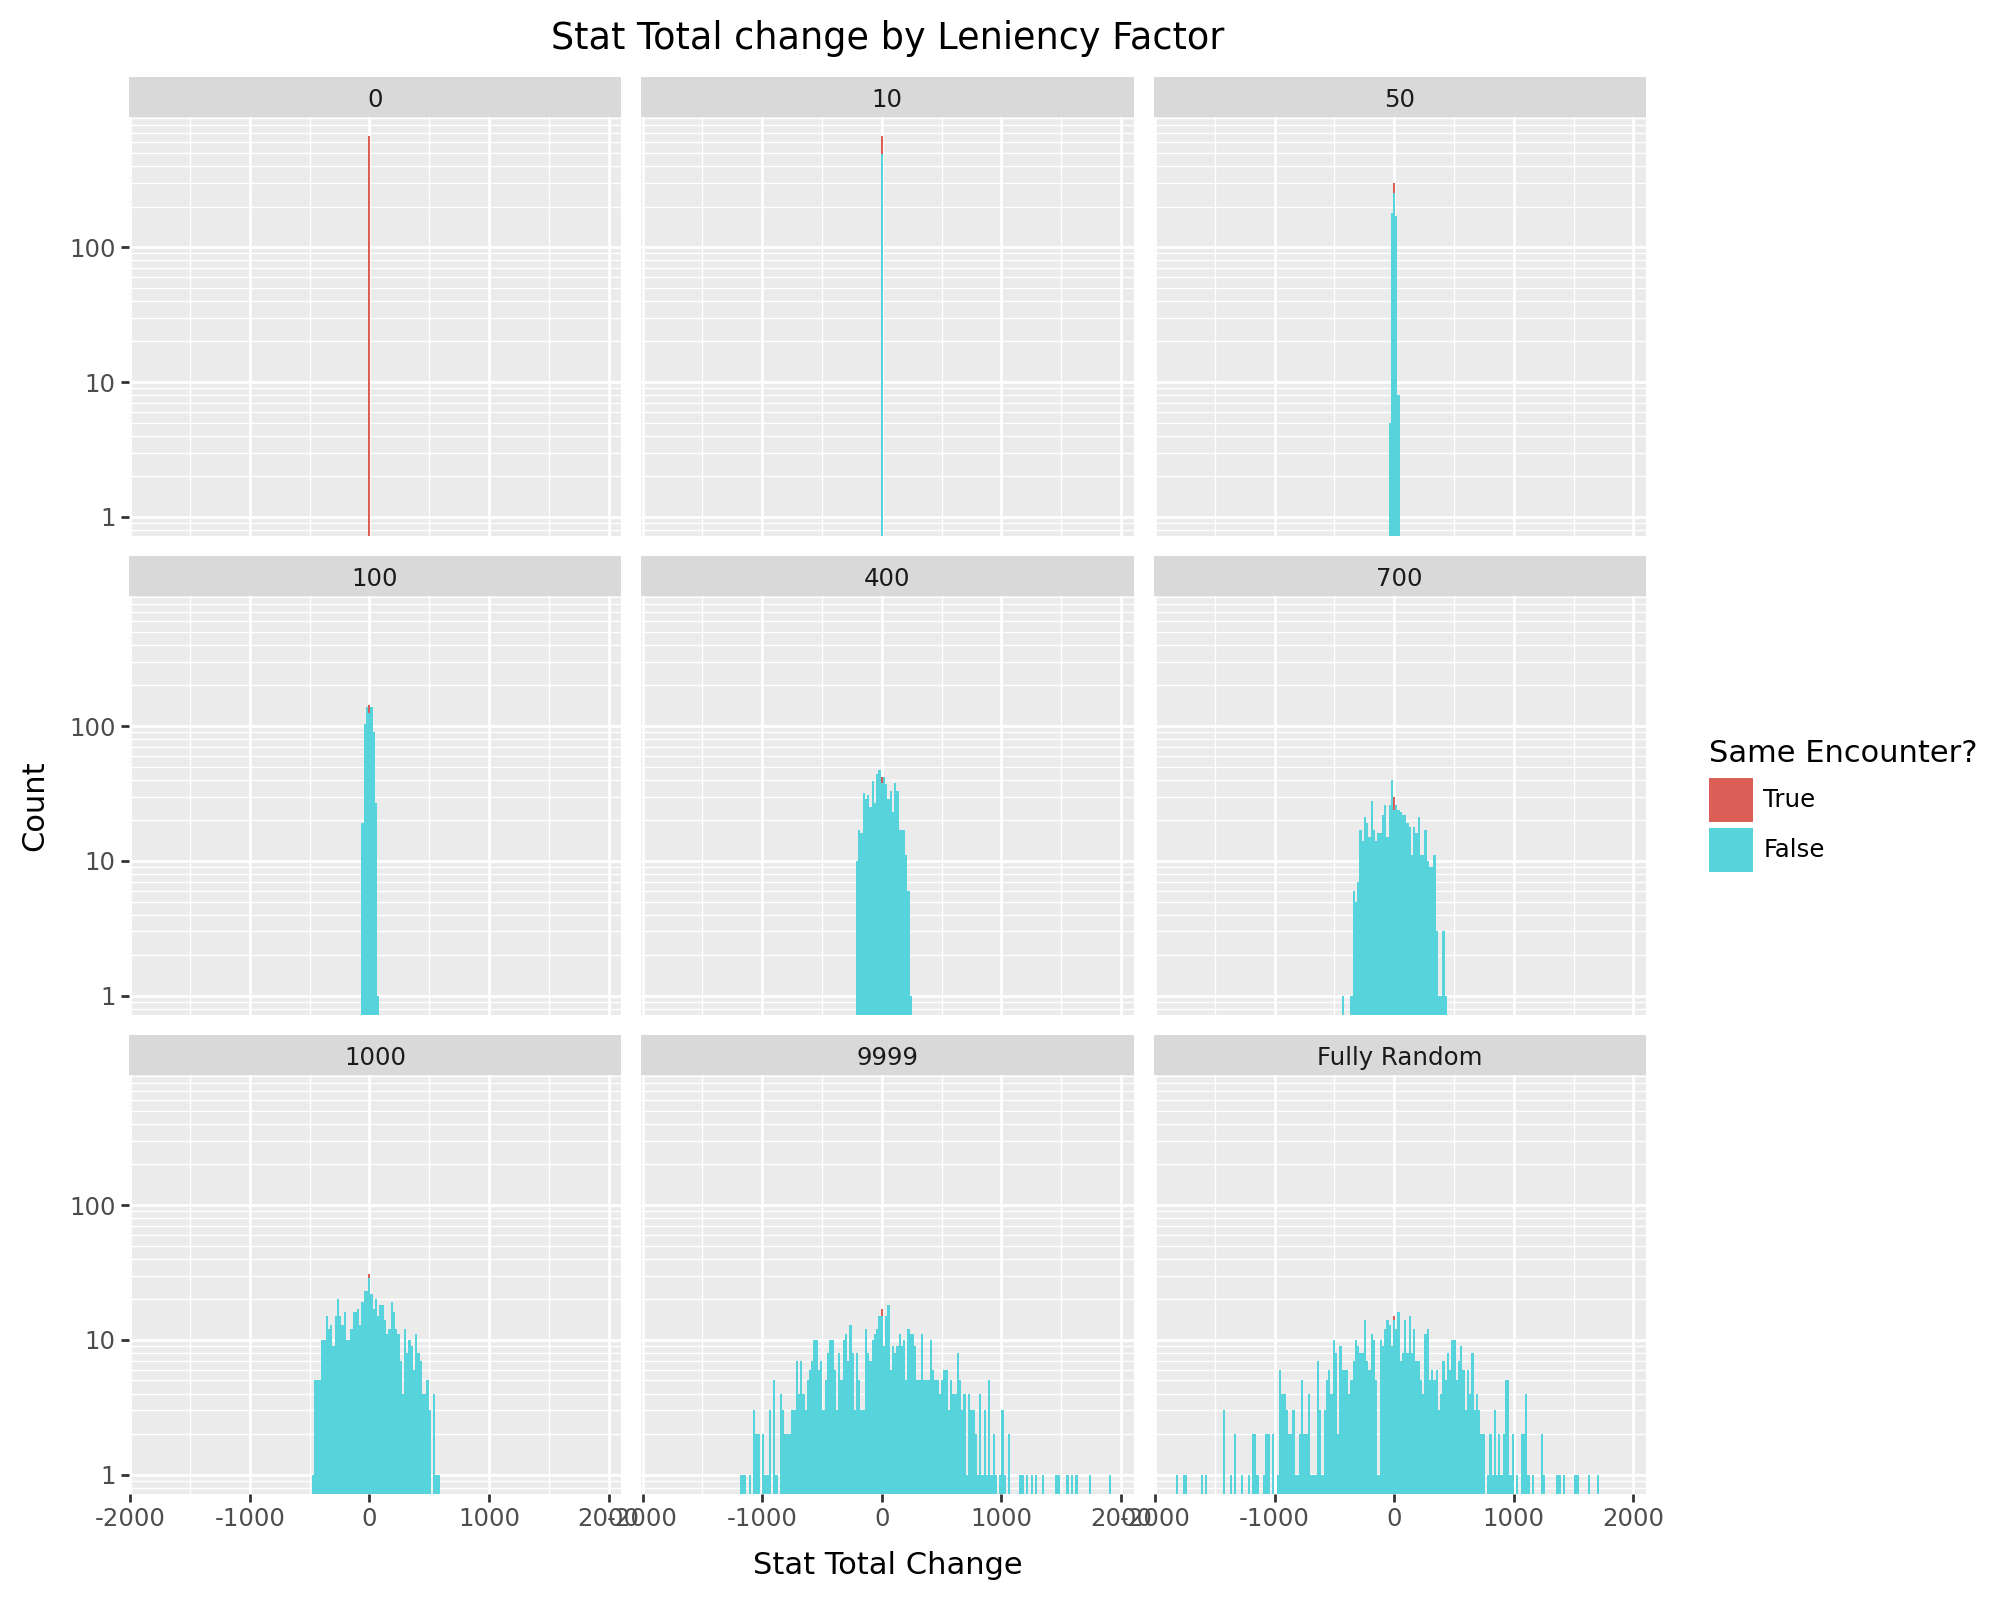

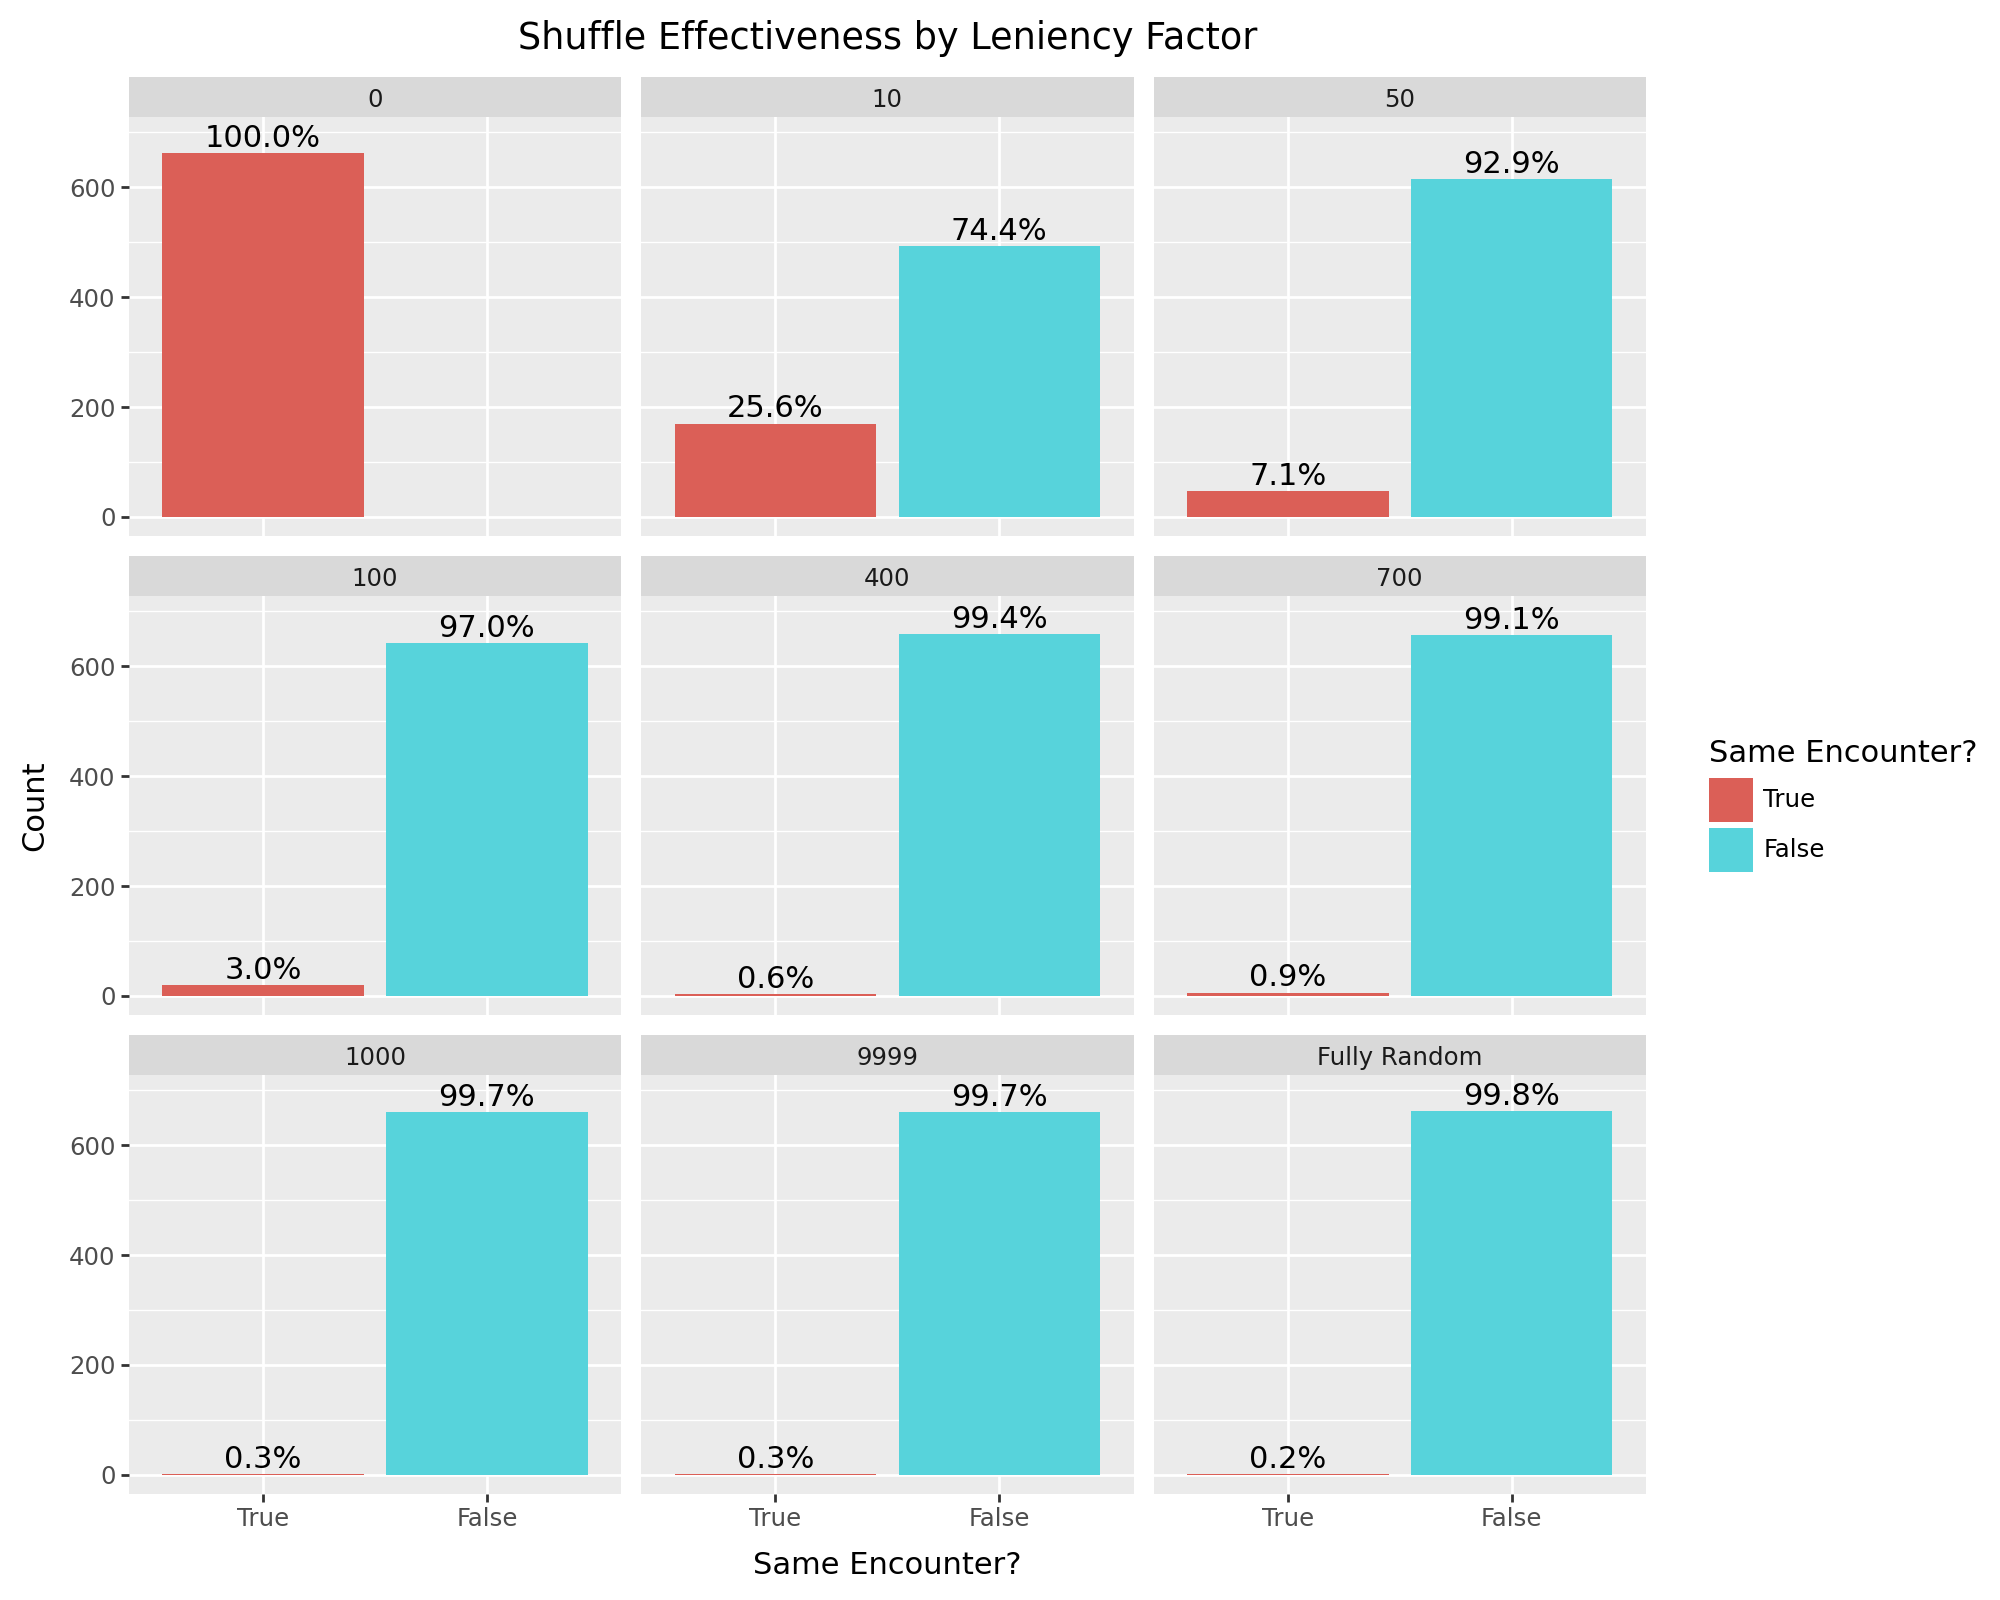

In [182]:
all_randomizations = []
leniency_factors = [0, 10, 50, 100, 400, 700, 1000, 9999, -1]
for leniency in leniency_factors:
    randomized = randomize_with_bias(encounters, leniency, 42)

    if leniency != -1:
        randomized["leniency"] = leniency
    else:
        randomized["leniency"] = "Fully Random"
        
    all_randomizations.append(randomized)

all_randomizations = pd.concat(all_randomizations)
all_randomizations["leniency_num"] = [float(l) if l != "Fully Random" else 0.0 for l in all_randomizations["leniency"]]
all_randomizations["leniency"] = pd.Categorical(all_randomizations["leniency"], [
    l if l != -1.0 else "Fully Random"
    for l in leniency_factors
])

plot = plt9.ggplot(all_randomizations.sort_values("same_encounter", ascending=False), plt9.aes("old_stat_total", "stat_total", color="same_encounter")) +\
    plt9.geom_abline(intercept=0, slope=1, color="grey", alpha=0.2) +\
    plt9.geom_point() +\
    plt9.facet_wrap("leniency") +\
    plt9.theme(figure_size=(10, 8)) +\
    plt9.ggtitle("Stat Total change by Leniency Factor") +\
    plt9.xlab("Old Stat Total") +\
    plt9.ylab("New Stat Total") +\
    plt9.labs(color="Same Encounter?")
plot.show()
plot = plt9.ggplot(all_randomizations.sort_values("same_encounter", ascending=False), plt9.aes("abs_stat_total_change", fill="same_encounter")) +\
    plt9.geom_histogram(bins=200) +\
    plt9.scale_y_log10() +\
    plt9.facet_wrap("leniency") +\
    plt9.theme(figure_size=(10, 8)) +\
    plt9.ggtitle("Absolute Stat Total change by Leniency Factor") +\
    plt9.xlab("Absolute Stat Change") +\
    plt9.ylab("Count") +\
    plt9.labs(fill="Same Encounter?")
plot.show()
plot = plt9.ggplot(all_randomizations.sort_values("same_encounter", ascending=False), plt9.aes("stat_total_change", fill="same_encounter")) +\
    plt9.geom_histogram(bins=200) +\
    plt9.scale_y_log10() +\
    plt9.facet_wrap("leniency") +\
    plt9.theme(figure_size=(10, 8)) +\
    plt9.ggtitle("Stat Total change by Leniency Factor") +\
    plt9.xlab("Stat Total Change") +\
    plt9.ylab("Count") +\
    plt9.labs(fill="Same Encounter?")
plot.show()
plot = plt9.ggplot(all_randomizations.sort_values("same_encounter", ascending=False), plt9.aes("same_encounter", fill="same_encounter")) +\
    plt9.geom_bar() +\
    plt9.geom_text(
        #plt9.aes(label=plt9.after_stat(f"count")),
        plt9.aes(label=plt9.after_stat(f"count / sum(count) * 100 * {len(leniency_factors)}")),
        stat="count",
        nudge_y=0.125,
        va="bottom",
        format_string="{:.1f}%",
    ) +\
    plt9.facet_wrap("leniency") +\
    plt9.theme(figure_size=(10, 8)) +\
    plt9.ylim(0, len(encounters) + 30) +\
    plt9.ggtitle("Shuffle Effectiveness by Leniency Factor") +\
    plt9.xlab("Same Encounter?") +\
    plt9.ylab("Count") +\
    plt9.labs(fill="Same Encounter?")
plot.show()